# Air Quality Predictions in Beijing

### Import Files & Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
lat = 'latitude'
lng = 'longitude'
sid = 'station_id'
k_nn = 3

In [2]:
# Air Quality files
air_quality_201701_201801 = pd.read_csv('D:/Akhila/Air pollution data set/beijing_17_18_aq.csv')
air_quality_201802_201803 = pd.read_csv('D:/Akhila/Air pollution data set/beijing_201802_201803_aq.csv')

In [3]:
# Grid Weather
grid_station_data = pd.read_csv('D:/Akhila/Air pollution data set/Beijing_historical_meo_grid.csv')

In [4]:
# Observed Weather
observed_station_data = pd.read_csv("D:/Akhila/Air pollution data set/beijing_17_18_meo.csv")

In [5]:
# Locations
air_quality_stations = pd.read_csv("D:/Akhila/Air pollution data set/airQuality_station.csv", index_col=sid)
grid_weather_stations = pd.read_csv('D:/Akhila/Air pollution data set/Beijing_grid_weather_station.csv', names=[sid, lat, lng], index_col=0)
observed_weather_stations = pd.read_csv("D:/Akhila/Air pollution data set/observed_weather_stations.csv", index_col=sid)

### Display tables

In [6]:
def sortAndUniqueTime(time_df):
    # sort & display time
    unique_time = time_df.unique()
    sort_time = pd.to_datetime(unique_time).sort_values()
    return sort_time

In [7]:
#Air quality tables
display(air_quality_201701_201801.head(3))
display(air_quality_201701_201801.shape)
display(sortAndUniqueTime(air_quality_201701_201801.utc_time))

display(air_quality_201802_201803.head(3))
display(air_quality_201802_201803.shape)
display(sortAndUniqueTime(air_quality_201802_201803.utc_time))

stationId             utc_time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq  2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq  2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq  2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0

(311010, 8)

DatetimeIndex(['2017-01-01 14:00:00', '2017-01-01 15:00:00',
               '2017-01-01 16:00:00', '2017-01-01 17:00:00',
               '2017-01-01 18:00:00', '2017-01-01 19:00:00',
               '2017-01-01 20:00:00', '2017-01-01 21:00:00',
               '2017-01-01 22:00:00', '2017-01-01 23:00:00',
               ...
               '2018-01-31 06:00:00', '2018-01-31 07:00:00',
               '2018-01-31 08:00:00', '2018-01-31 09:00:00',
               '2018-01-31 10:00:00', '2018-01-31 11:00:00',
               '2018-01-31 12:00:00', '2018-01-31 13:00:00',
               '2018-01-31 14:00:00', '2018-01-31 15:00:00'],
              dtype='datetime64[ns]', length=8701, freq=None)

stationId             utc_time  PM2.5  PM10   NO2   CO   O3   SO2
0  aotizhongxin_aq  2018-01-31 16:00:00   49.0  82.0  90.0  0.9  6.0  10.0
1  aotizhongxin_aq  2018-01-31 17:00:00   47.0  80.0  90.0  0.9  5.0  10.0
2  aotizhongxin_aq  2018-01-31 18:00:00   46.0  91.0  91.0  1.3  5.0  28.0

(49420, 8)

DatetimeIndex(['2018-01-31 16:00:00', '2018-01-31 17:00:00',
               '2018-01-31 18:00:00', '2018-01-31 19:00:00',
               '2018-01-31 20:00:00', '2018-01-31 21:00:00',
               '2018-01-31 22:00:00', '2018-01-31 23:00:00',
               '2018-02-01 00:00:00', '2018-02-01 01:00:00',
               ...
               '2018-03-31 06:00:00', '2018-03-31 07:00:00',
               '2018-03-31 08:00:00', '2018-03-31 09:00:00',
               '2018-03-31 10:00:00', '2018-03-31 11:00:00',
               '2018-03-31 12:00:00', '2018-03-31 13:00:00',
               '2018-03-31 14:00:00', '2018-03-31 15:00:00'],
              dtype='datetime64[ns]', length=1412, freq=None)

In [8]:
#Grid Weather table
display(grid_station_data.head(3))
display(grid_station_data.shape)
display(sortAndUniqueTime(grid_station_data.utc_time))




stationName  longitude  latitude             utc_time  temperature  \
0  beijing_grid_000      115.0      39.0  2017-01-01 00:00:00        -5.47   
1  beijing_grid_001      115.0      39.1  2017-01-01 00:00:00        -5.53   
2  beijing_grid_002      115.0      39.2  2017-01-01 00:00:00        -5.70   

   pressure  humidity  wind_direction  wind_speed/kph  
0    984.73      76.6           53.71            3.53  
1    979.33      75.4           43.59            3.11  
2    963.14      71.8            0.97            2.75

(7034706, 9)

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2018-03-26 20:00:00', '2018-03-26 21:00:00',
               '2018-03-26 22:00:00', '2018-03-26 23:00:00',
               '2018-03-27 00:00:00', '2018-03-27 01:00:00',
               '2018-03-27 02:00:00', '2018-03-27 03:00:00',
               '2018-03-27 04:00:00', '2018-03-27 05:00:00'],
              dtype='datetime64[ns]', length=10806, freq=None)

In [9]:
#observed weather table
display(observed_station_data.head(3))
display(observed_station_data.shape)
# sort & display time
ob_station_data = observed_station_data.utc_time.unique()
ob_station_data = pd.to_datetime(ob_station_data).sort_values()
display(ob_station_data)




station_id   longitude   latitude             utc_time  temperature  \
0  shunyi_meo  116.615278  40.126667  2017-01-30 16:00:00         -1.7   
1  shunyi_meo  116.615278  40.126667  2017-01-30 17:00:00         -3.5   
2  shunyi_meo  116.615278  40.126667  2017-01-30 18:00:00         -3.7   

   pressure  humidity  wind_direction  wind_speed      weather  
0    1028.7        15           215.0         1.6  Sunny/clear  
1    1028.4        24            16.0         1.0         Haze  
2    1028.1        27            32.0         1.1         Haze

(158047, 10)

DatetimeIndex(['2017-01-30 16:00:00', '2017-01-30 17:00:00',
               '2017-01-30 18:00:00', '2017-01-30 19:00:00',
               '2017-01-30 20:00:00', '2017-01-30 21:00:00',
               '2017-01-30 22:00:00', '2017-01-30 23:00:00',
               '2017-01-31 00:00:00', '2017-01-31 01:00:00',
               ...
               '2018-01-31 06:00:00', '2018-01-31 07:00:00',
               '2018-01-31 08:00:00', '2018-01-31 09:00:00',
               '2018-01-31 10:00:00', '2018-01-31 11:00:00',
               '2018-01-31 12:00:00', '2018-01-31 13:00:00',
               '2018-01-31 14:00:00', '2018-01-31 15:00:00'],
              dtype='datetime64[ns]', length=8782, freq=None)

In [10]:
# display station tables
print(air_quality_stations.shape)
display(air_quality_stations.head())

print(grid_weather_stations.shape)
display(grid_weather_stations.head())

print(observed_weather_stations.shape)
display(observed_weather_stations.head())


(35, 2)


longitude  latitude
station_id                           
dongsi_aq           116.417    39.929
tiantan_aq          116.407    39.886
guanyuan_aq         116.339    39.929
wanshouxigong_aq    116.352    39.878
aotizhongxin_aq     116.397    39.982

(651, 2)


latitude  longitude
station_id                           
beijing_grid_000      39.0      115.0
beijing_grid_001      39.1      115.0
beijing_grid_002      39.2      115.0
beijing_grid_003      39.3      115.0
beijing_grid_004      39.4      115.0

(18, 2)


longitude   latitude
station_id                        
shunyi_meo   116.615278  40.126667
hadian_meo   116.290556  39.986944
yanqing_meo  115.968889  40.449444
miyun_meo    116.864167  40.377500
huairou_meo  116.626944  40.357778

## Find the nearest stations using KNN

In [11]:
# Concat Stations
stations_all_df = pd.concat([grid_weather_stations, observed_weather_stations], axis=0, sort=False)
stations_all_df.head()


latitude  longitude
station_id                           
beijing_grid_000      39.0      115.0
beijing_grid_001      39.1      115.0
beijing_grid_002      39.2      115.0
beijing_grid_003      39.3      115.0
beijing_grid_004      39.4      115.0

In [12]:
stations_all_df.iloc[0].name

'beijing_grid_000'

In [13]:
from sklearn.neighbors import NearestNeighbors

def KNNDataFrame(k_nn=3):
    nn_finder = NearestNeighbors(n_neighbors=k_nn, metric='haversine', n_jobs=-1)
    nn_finder.fit(stations_all_df)

    # find the KNNs of the air quality stations
    # add new columns
    aq_stations_knn_df = air_quality_stations.copy()
    for i in range(k_nn):
        n_name = "N{}".format(i)
        n_lat = "N{}_lat".format(i)
        n_lng = "N{}_lng".format(i)
        n_dist = "N{}_dist".format(i)

        aq_stations_knn_df[n_name] = pd.Series('', index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_lat] = pd.Series(.0, index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_lng] = pd.Series(.0, index=aq_stations_knn_df.index)
        aq_stations_knn_df[n_dist] = pd.Series(.0, index=aq_stations_knn_df.index)

    for station in aq_stations_knn_df.index:
        latitude = aq_stations_knn_df.at[station, lat]
        longitude = aq_stations_knn_df.at[station, lng]
        result = nn_finder.kneighbors([[latitude, longitude]], return_distance=True)

        index_l = result[1].ravel()
        dist_l = result[0].ravel()

        # add to dataframe
        results_zip = list(zip(index_l, dist_l))

        # store into dataframe
        for i, neighbor_list in enumerate(results_zip):
            neighbor_index = neighbor_list[0]

            # name of neighbor i
            neighbor_name = stations_all_df.iloc[neighbor_index].name
            aq_stations_knn_df.at[station, 'N{}'.format(i)] = neighbor_name

            # latitude of neighbor i
            aq_stations_knn_df.at[station, 'N{}_lat'.format(i)] = stations_all_df.at[neighbor_name, lat]

            # longitude of neighbor i
            aq_stations_knn_df.at[station, 'N{}_lng'.format(i)] = stations_all_df.at[neighbor_name, lng]

            # distance of neighbor i
            R = 6371.0 # km - earths's radius
            neighbor_dist = neighbor_list[1] * R
            aq_stations_knn_df.at[station, 'N{}_dist'.format(i)] = neighbor_dist

        print(results_zip)

    return(aq_stations_knn_df)

aq_stations_knn_df = KNNDataFrame(k_nn=k_nn)
display(aq_stations_knn_df.head())
print(aq_stations_knn_df.shape)


[(303, 0.03074564946081279), (659, 0.05715319502442078), (324, 0.05767359548541588)]
[(303, 0.014583690456893396), (324, 0.05603132186058166), (282, 0.06396742401445471)]
[(282, 0.03728090443487231), (303, 0.04672897673407377), (652, 0.06559306199188342)]
[(303, 0.03549001722986746), (282, 0.03733850271060311), (665, 0.06110136326287754)]
[(304, 0.018108625524897788), (283, 0.06650378454411798), (652, 0.06990770888901224)]
[(659, 0.029316950408647114), (324, 0.043858471761035446), (303, 0.05220670870271248)]
[(652, 0.0023372803482232204), (283, 0.015590884211383995), (262, 0.05903792336716099)]
[(263, 0.021558860402400737), (242, 0.05526685901956946), (262, 0.09181558361545737)]
[(262, 0.005083712676395151), (652, 0.05738019379336394), (664, 0.05951038490420543)]
[(665, 0.020298517778200444), (282, 0.038913550197383524), (261, 0.05851585033676683)]
[(239, 0.03374787786448513), (260, 0.03676554387125713), (667, 0.056428052072776444)]
[(261, 0.01692858557999603), (662, 0.0308677624334332

longitude  latitude                N0  N0_lat  N0_lng  \
station_id                                                                
dongsi_aq           116.417    39.929  beijing_grid_303    39.9   116.4   
tiantan_aq          116.407    39.886  beijing_grid_303    39.9   116.4   
guanyuan_aq         116.339    39.929  beijing_grid_282    39.9   116.3   
wanshouxigong_aq    116.352    39.878  beijing_grid_303    39.9   116.4   
aotizhongxin_aq     116.397    39.982  beijing_grid_304    40.0   116.4   

                     N0_dist                N1   N1_lat      N1_lng  \
station_id                                                            
dongsi_aq         195.880533      chaoyang_meo  39.9525  116.500833   
tiantan_aq         92.912692  beijing_grid_324  39.9000  116.500000   
guanyuan_aq       237.516642  beijing_grid_303  39.9000  116.400000   
wanshouxigong_aq  226.106900  beijing_grid_282  39.9000  116.300000   
aotizhongxin_aq   115.370053  beijing_grid_283  40.0000  116.300000   

                     N1_dist                N2     N2_lat      N2_lng  \
station_id                                                              
dongsi_aq         364.123006  beijing_grid_324  39.900000  116.500000   
tiantan_aq        356.975552  beijing_grid_282  39.900000  116.300000   
guanyuan_aq       297.710311        hadian_meo  39.986944  116.290556   
wanshouxigong_aq  237.883601       fengtai_meo  39.870278  116.245278   
aotizhongxin_aq   423.695611        hadian_meo  39.986944  116.290556   

                     N2_dist  
station_id                    
dongsi_aq         367.438477  
tiantan_aq        407.536458  
guanyuan_aq       417.893398  
wanshouxigong_aq  389.276785  
aotizhongxin_aq   445.382013

(35, 14)


### Data preprocessing

#### Preprocess the Air Quality Station Data

In [14]:
display(air_quality_201701_201801.head(3))
display(air_quality_201701_201801.shape)
print(air_quality_201701_201801.dtypes)

display(air_quality_201802_201803.head(3))
display(air_quality_201802_201803.shape)



stationId             utc_time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq  2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq  2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq  2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0

(311010, 8)

stationId     object
utc_time      object
PM2.5        float64
PM10         float64
NO2          float64
CO           float64
O3           float64
SO2          float64
dtype: object


stationId             utc_time  PM2.5  PM10   NO2   CO   O3   SO2
0  aotizhongxin_aq  2018-01-31 16:00:00   49.0  82.0  90.0  0.9  6.0  10.0
1  aotizhongxin_aq  2018-01-31 17:00:00   47.0  80.0  90.0  0.9  5.0  10.0
2  aotizhongxin_aq  2018-01-31 18:00:00   46.0  91.0  91.0  1.3  5.0  28.0

(49420, 8)

In [15]:
import datetime as dt
# concat 201701_201801 table
airQ_data = pd.concat([air_quality_201701_201801, air_quality_201802_201803], axis=0, ignore_index=True)
airQ_data['utc_time'] = airQ_data["utc_time"].apply(lambda x: pd.Timestamp(x))
airQ_data = airQ_data.rename(columns={"stationId": "station_id",
                                      "utc_time": "time"})


# drop duplicates
airQ_data = airQ_data.drop_duplicates()

display(airQ_data.head())
print(airQ_data.shape)


station_id                time  PM2.5   PM10    NO2   CO   O3  SO2
0  aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1  aotizhongxin_aq 2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2  aotizhongxin_aq 2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0
3  aotizhongxin_aq 2017-01-01 17:00:00  420.0  484.0  139.0  7.4  3.0  9.0
4  aotizhongxin_aq 2017-01-01 18:00:00  453.0  520.0  157.0  7.6  4.0  9.0

(353955, 8)


In [16]:
airQ_data.isnull().sum()

station_id        0
time              0
PM2.5         22834
PM10          94780
NO2           21124
CO            45565
O3            23145
SO2           21076
dtype: int64

In [17]:
airQ_data.isnull().sum() * 100 / len(airQ_data)

station_id     0.000000
time           0.000000
PM2.5          6.451103
PM10          26.777415
NO2            5.967990
CO            12.873105
O3             6.538967
SO2            5.954429
dtype: float64

In [18]:
airQ_data.describe()

PM2.5           PM10            NO2             CO  \
count  331121.000000  259175.000000  332831.000000  308390.000000   
mean       61.191407      91.342772      46.066382       0.971086   
std        67.385924     103.024487      32.246534       0.973267   
min         2.000000       5.000000       1.000000       0.100000   
25%        16.000000      38.000000      20.000000       0.400000   
50%        41.000000      71.000000      40.000000       0.700000   
75%        81.000000     116.000000      66.000000       1.200000   
max      1574.000000    3280.000000     300.000000      15.000000   

                  O3            SO2  
count  330810.000000  332879.000000  
mean       55.052323       9.199598  
std        51.610243      11.596243  
min         1.000000       1.000000  
25%        13.000000       2.000000  
50%        46.000000       5.000000  
75%        78.000000      12.000000  
max       504.000000     307.000000

In [19]:
display(airQ_data.iloc[np.r_[0:1, -1:0]])
display(airQ_data.shape)

station_id                time  PM2.5   PM10    NO2   CO   O3  \
0       aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0   
360429     zhiwuyuan_aq 2018-03-31 15:00:00    NaN    NaN    NaN  NaN  NaN   

        SO2  
0       9.0  
360429  NaN

(353955, 8)

In [20]:
airQ_data_new = airQ_data.copy()
airQ_data_new = airQ_data_new.reset_index().drop(columns=['index'])
display(airQ_data_new.iloc[np.r_[0:1, -1:0]])
display(airQ_data_new.shape)

station_id                time  PM2.5   PM10    NO2   CO   O3  \
0       aotizhongxin_aq 2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0   
353954     zhiwuyuan_aq 2018-03-31 15:00:00    NaN    NaN    NaN  NaN  NaN   

        SO2  
0       9.0  
353954  NaN

(353955, 8)

In [21]:
len(airQ_data.time.unique())

10113

#### Preprocess Grid Weather Data

In [22]:
display(grid_station_data.head(5))
display(grid_station_data.shape)



stationName  longitude  latitude             utc_time  temperature  \
0  beijing_grid_000      115.0      39.0  2017-01-01 00:00:00        -5.47   
1  beijing_grid_001      115.0      39.1  2017-01-01 00:00:00        -5.53   
2  beijing_grid_002      115.0      39.2  2017-01-01 00:00:00        -5.70   
3  beijing_grid_003      115.0      39.3  2017-01-01 00:00:00        -5.88   
4  beijing_grid_004      115.0      39.4  2017-01-01 00:00:00        -5.34   

   pressure  humidity  wind_direction  wind_speed/kph  
0    984.73     76.60           53.71            3.53  
1    979.33     75.40           43.59            3.11  
2    963.14     71.80            0.97            2.75  
3    946.94     68.20          327.65            3.84  
4    928.80     58.81          317.85            6.14

(7034706, 9)

In [23]:
grid_station_data['time'] = grid_station_data.utc_time.apply(lambda x: pd.Timestamp(x))
grid_station_data = grid_station_data.drop(['utc_time', 'longitude', 'latitude'], axis=1)
grid_station_data = grid_station_data.rename(columns={'stationName': 'station_id', 'wind_speed/kph': 'wind_speed'})
grid_station_data['weather'] = pd.Series('None', index=grid_station_data.index)
grid_station_data.time.unique()

print(grid_station_data.shape)
display(grid_station_data.head())


(7034706, 8)


station_id  temperature  pressure  humidity  wind_direction  \
0  beijing_grid_000        -5.47    984.73     76.60           53.71   
1  beijing_grid_001        -5.53    979.33     75.40           43.59   
2  beijing_grid_002        -5.70    963.14     71.80            0.97   
3  beijing_grid_003        -5.88    946.94     68.20          327.65   
4  beijing_grid_004        -5.34    928.80     58.81          317.85   

   wind_speed       time weather  
0        3.53 2017-01-01    None  
1        3.11 2017-01-01    None  
2        2.75 2017-01-01    None  
3        3.84 2017-01-01    None  
4        6.14 2017-01-01    None

In [24]:
grid_station_data_new = grid_station_data.copy()
grid_station_data_new = grid_station_data_new.reset_index().drop(columns=['index'])
display(grid_station_data_new.iloc[np.r_[0:1, -1:0]])
display(grid_station_data_new.shape)

station_id  temperature  pressure  humidity  wind_direction  \
0        beijing_grid_000        -5.47    984.73     76.60           53.71   
7034705  beijing_grid_650        22.73    942.95     21.78          215.27   

         wind_speed                time weather  
0              3.53 2017-01-01 00:00:00    None  
7034705       18.91 2018-03-27 05:00:00    None

(7034706, 8)

#### Preprocess Observed Weather Data

In [25]:
display(observed_station_data.head(5))
display(observed_station_data.shape)



station_id   longitude   latitude             utc_time  temperature  \
0  shunyi_meo  116.615278  40.126667  2017-01-30 16:00:00         -1.7   
1  shunyi_meo  116.615278  40.126667  2017-01-30 17:00:00         -3.5   
2  shunyi_meo  116.615278  40.126667  2017-01-30 18:00:00         -3.7   
3  shunyi_meo  116.615278  40.126667  2017-01-30 19:00:00         -3.9   
4  shunyi_meo  116.615278  40.126667  2017-01-30 20:00:00         -4.1   

   pressure  humidity  wind_direction  wind_speed      weather  
0    1028.7        15           215.0         1.6  Sunny/clear  
1    1028.4        24            16.0         1.0         Haze  
2    1028.1        27            32.0         1.1         Haze  
3    1027.6        27            21.0         0.9         Haze  
4    1026.7        26            17.0         1.1         Haze

(158047, 10)

In [26]:
observed_station_data['utc_time'] = observed_station_data.utc_time.apply(lambda x: pd.Timestamp(x))
observed_station_data = observed_station_data.rename(columns={'utc_time': 'time'})

observed_station_data = observed_station_data.drop(['longitude', 'latitude'], axis=1)


print(observed_station_data.shape)
display(observed_station_data.head())



(158047, 8)


station_id                time  temperature  pressure  humidity  \
0  shunyi_meo 2017-01-30 16:00:00         -1.7    1028.7        15   
1  shunyi_meo 2017-01-30 17:00:00         -3.5    1028.4        24   
2  shunyi_meo 2017-01-30 18:00:00         -3.7    1028.1        27   
3  shunyi_meo 2017-01-30 19:00:00         -3.9    1027.6        27   
4  shunyi_meo 2017-01-30 20:00:00         -4.1    1026.7        26   

   wind_direction  wind_speed      weather  
0           215.0         1.6  Sunny/clear  
1            16.0         1.0         Haze  
2            32.0         1.1         Haze  
3            21.0         0.9         Haze  
4            17.0         1.1         Haze

In [27]:
observed_station_data_new = observed_station_data.copy()
observed_station_data_new = observed_station_data_new.reset_index().drop(columns=['index'])
display(observed_station_data_new.iloc[np.r_[0:1, -1:0]])
display(observed_station_data_new.shape)

station_id                time  temperature  pressure  humidity  \
0           shunyi_meo 2017-01-30 16:00:00         -1.7    1028.7        15   
158046  xiayunling_meo 2018-01-31 15:00:00         -7.4     977.4        39   

        wind_direction  wind_speed      weather  
0                215.0         1.6  Sunny/clear  
158046           137.0         1.0  Sunny/clear

(158047, 8)

#### Concat the weather features from Grid Weather Station & Observed Weather Station

In [28]:
weather_data = pd.concat([grid_station_data, observed_station_data], axis=0, ignore_index=True, sort=False)
print(weather_data.shape)
display(weather_data.head())


(7192753, 8)


station_id  temperature  pressure  humidity  wind_direction  \
0  beijing_grid_000        -5.47    984.73     76.60           53.71   
1  beijing_grid_001        -5.53    979.33     75.40           43.59   
2  beijing_grid_002        -5.70    963.14     71.80            0.97   
3  beijing_grid_003        -5.88    946.94     68.20          327.65   
4  beijing_grid_004        -5.34    928.80     58.81          317.85   

   wind_speed       time weather  
0        3.53 2017-01-01    None  
1        3.11 2017-01-01    None  
2        2.75 2017-01-01    None  
3        3.84 2017-01-01    None  
4        6.14 2017-01-01    None

In [29]:
weather_data_new = weather_data.copy()
weather_data_new = weather_data_new

display(weather_data_new.iloc[np.r_[0:1, -1:0]])
display(weather_data_new.shape)

station_id  temperature  pressure  humidity  wind_direction  \
0        beijing_grid_000        -5.47    984.73      76.6           53.71   
7192752    xiayunling_meo        -7.40    977.40      39.0          137.00   

         wind_speed                time      weather  
0              3.53 2017-01-01 00:00:00         None  
7192752        1.00 2018-01-31 15:00:00  Sunny/clear

(7192753, 8)

#### Outliers

In [30]:
print(observed_station_data[observed_station_data.wind_direction > 360.].wind_direction.unique())
weather_data.describe()

[999017. 999999.]


temperature      pressure      humidity  wind_direction    wind_speed
count  7.192753e+06  7.192753e+06  7.192753e+06    7.192519e+06  7.192519e+06
mean   9.542558e+00  9.694494e+02  5.023605e+01    9.831192e+02  1.180248e+01
std    7.458267e+02  7.466754e+02  2.583257e+03    2.780709e+04  1.444125e+03
min   -2.550000e+01  8.263900e+02  3.040000e+00    0.000000e+00  0.000000e+00
25%   -1.690000e+00  9.314800e+02  2.606000e+01    1.351800e+02  4.920000e+00
50%    8.510000e+00  9.800700e+02  3.932000e+01    2.159300e+02  8.130000e+00
75%    1.967000e+01  1.012500e+03  5.833000e+01    3.023600e+02  1.262000e+01
max    9.999990e+05  9.999990e+05  9.999990e+05    9.999990e+05  9.999990e+05

In [31]:
# change the extremingly big data to nan; change 999017 to 0.5
weather_data_float_types = ['temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed']
weather_data[weather_data_float_types] = weather_data[weather_data_float_types].applymap(lambda x: 0.5 if x == 999017 else (np.nan if x > 999017 else x))


In [32]:
weather_data.describe()

temperature      pressure      humidity  wind_direction    wind_speed
count  7.192749e+06  7.192749e+06  7.192705e+06    7.192504e+06  7.192504e+06
mean   8.986448e+00  9.688938e+02  4.356296e+01    2.082134e+02  9.716998e+00
std    1.239194e+01  4.987219e+01  2.167502e+01    1.013677e+02  6.837274e+00
min   -2.550000e+01  8.263900e+02  3.040000e+00    0.000000e+00  0.000000e+00
25%   -1.690000e+00  9.314800e+02  2.606000e+01    1.348300e+02  4.920000e+00
50%    8.510000e+00  9.800600e+02  3.932000e+01    2.157100e+02  8.130000e+00
75%    1.967000e+01  1.012500e+03  5.833000e+01    3.021900e+02  1.262000e+01
max    4.030000e+01  1.040620e+03  1.000000e+02    3.600000e+02  6.882000e+01

##### Temperature

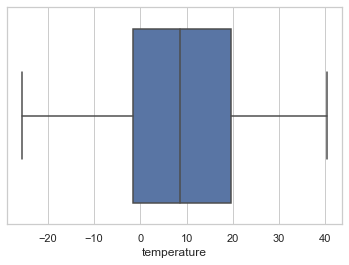

In [33]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["temperature"])


##### Pressure

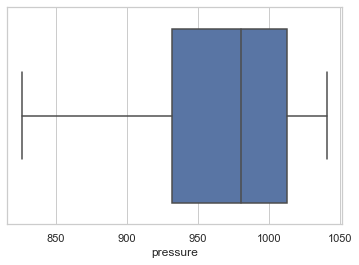

In [34]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["pressure"])

##### humidity

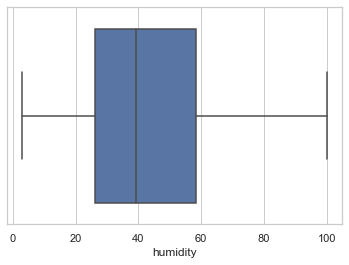

In [35]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["humidity"])

##### Wind Direction

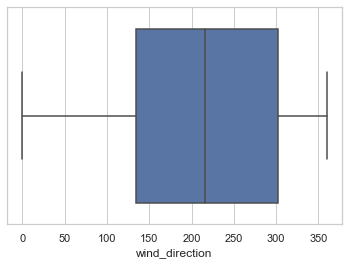

In [36]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["wind_direction"])

##### Wind Speed

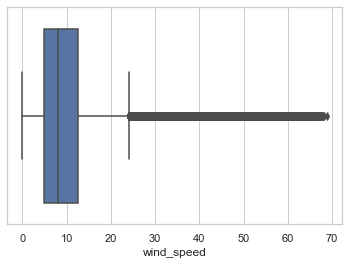

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=weather_data["wind_speed"])

### Concat features from both Grid & Observed Weather Station

#### Concat the weather features for each Air Quality Station

In [38]:
# observed weather total time
observed_station_time = observed_station_data.time.unique()
observed_station_total_hours = len(observed_station_time)
display(observed_station_time)
print("The total time hour of observed weather station: {}".format(len(observed_station_data.time.unique())))

# Grid weather total time
grid_station_time = grid_station_data.time.unique()
grid_station_total_hours = len(grid_station_time)
display(grid_station_time)
print("The total time hour of grid weather station: {}".format(len(grid_station_data.time.unique())))



array(['2017-01-30T16:00:00.000000000', '2017-01-30T17:00:00.000000000',
       '2017-01-30T18:00:00.000000000', ...,
       '2018-01-31T14:00:00.000000000', '2018-01-31T15:00:00.000000000',
       '2018-01-08T10:00:00.000000000'], dtype='datetime64[ns]')

The total time hour of observed weather station: 8782


array(['2017-01-01T00:00:00.000000000', '2017-01-01T01:00:00.000000000',
       '2017-01-01T02:00:00.000000000', ...,
       '2018-03-27T03:00:00.000000000', '2018-03-27T04:00:00.000000000',
       '2018-03-27T05:00:00.000000000'], dtype='datetime64[ns]')

The total time hour of grid weather station: 10806


1. From the above information, we can see that the shared time period is from **2017-01-30 16:00:00 to 2018-05-02 23:00:00**. Thus, we will choose the features of this time period for training.
2. The weather features consist of **K** nearest neighbors weather stations' features.

In [39]:
# concat the weather features from  2017-01-30 16:00:00 to 2018-05-02 23:00:00
#import ipdb


def getWeatherFeatures(airQ_station_id):
    # Find the K neighbors
    knn_list = []
    for i in range(k_nn):
        name = "N{}".format(i)
        knn_list.append(aq_stations_knn_df.at[airQ_station_id, name])

    # Initialize the features dataframe with time period
    time_period = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
    data_df = pd.DataFrame(time_period, columns=['time'])
    
    # merge the data from Air Quality Stations
    airQ_data_df = airQ_data[airQ_data.station_id == airQ_station_id]
    airQ_data_df = airQ_data_df.drop(columns=['station_id'])

    data_df = data_df.merge(airQ_data_df, on='time', how='left')
        
    # add the features from k neighbors
    for k, station in enumerate(knn_list):
        # data of the station
        station_data = weather_data[weather_data.station_id == station]
        
        # drop the station_id
        station_data = station_data.drop(columns=['station_id'])
        
        # add the station_id to the columns name
        station_data = station_data.rename(columns={
            "temperature": "{}_{}_tem".format(k, station),
            "pressure": "{}_{}_pre".format(k, station),
            "humidity": "{}_{}_hum".format(k, station),
            "wind_direction": "{}_{}_wd".format(k, station),
            "wind_speed": "{}_{}_ws".format(k, station),
            "weather": "{}_{}_wea".format(k, station)
        })
        
        # merge the features from different time
        data_df = data_df.merge(station_data, on='time', how='left')
    
   
    print("==={} finished===".format(airQ_station_id))
    return data_df



    
# The total length of time should be 10976
# from  2017-01-30 16:00:00 to 2018-05-02 23:00:00
atzx = getWeatherFeatures("aotizhongxin_aq")
display(atzx.shape)
display(atzx.head())


===aotizhongxin_aq finished===


(10976, 25)

time  PM2.5  PM10   NO2   CO    O3   SO2  \
0 2017-01-30 16:00:00   70.0  75.0  36.0  0.9  79.0  34.0   
1 2017-01-30 17:00:00   78.0  86.0  36.0  0.1  78.0  38.0   
2 2017-01-30 18:00:00   86.0  92.0  39.0  1.1  74.0  35.0   
3 2017-01-30 19:00:00   95.0   NaN  46.0  1.2  65.0  34.0   
4 2017-01-30 20:00:00   98.0   NaN  42.0  1.2   NaN  32.0   

   0_beijing_grid_304_tem  0_beijing_grid_304_pre  0_beijing_grid_304_hum  \
0                   -5.89                 1026.03                   14.58   
1                   -6.16                 1025.68                   15.11   
2                   -6.44                 1025.32                   15.64   
3                   -7.02                 1024.89                   16.59   
4                   -7.61                 1024.46                   17.55   

   ...  1_beijing_grid_283_hum  1_beijing_grid_283_wd 1_beijing_grid_283_ws  \
0  ...                   14.07                 201.74                  6.24   
1  ...                   14.62                 199.01                  5.02   
2  ...                   15.18                 194.52                  3.81   
3  ...                   16.02                 189.14                  3.40   
4  ...                   16.86                 182.36                  3.02   

   1_beijing_grid_283_wea  2_hadian_meo_tem  2_hadian_meo_pre  \
0                    None              -1.6            1026.1   
1                    None              -2.0            1025.9   
2                    None              -2.9            1025.6   
3                    None              -3.0            1025.2   
4                    None              -3.8            1024.3   

   2_hadian_meo_hum  2_hadian_meo_wd 2_hadian_meo_ws  2_hadian_meo_wea  
0              14.0            231.0             2.5       Sunny/clear  
1              16.0            234.0             1.9       Sunny/clear  
2              18.0            242.0             1.2       Sunny/clear  
3              20.0            254.0             1.1       Sunny/clear  
4              23.0              0.5             0.0       Sunny/clear  

[5 rows x 25 columns]

### Missing Data

#### Analysis

<AxesSubplot:>

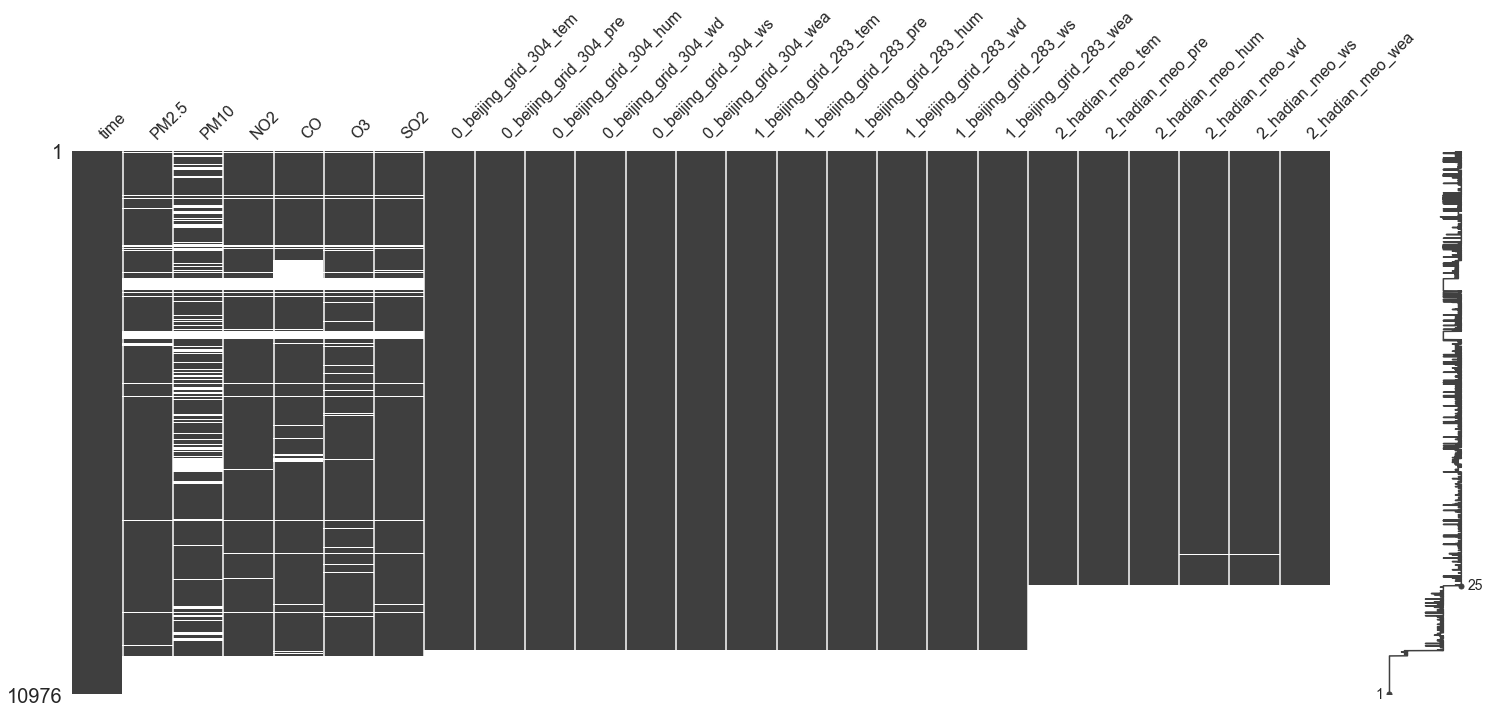

In [40]:
import missingno as msno
%matplotlib inline

msno.matrix(atzx)

============== aotizhongxin ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_304_tem     True
0_beijing_grid_304_pre     True
0_beijing_grid_304_hum     True
0_beijing_grid_304_wd      True
0_beijing_grid_304_ws      True
0_beijing_grid_304_wea     True
1_beijing_grid_283_tem     True
1_beijing_grid_283_pre     True
1_beijing_grid_283_hum     True
1_beijing_grid_283_wd      True
1_beijing_grid_283_ws      True
1_beijing_grid_283_wea     True
2_hadian_meo_tem           True
2_hadian_meo_pre           True
2_hadian_meo_hum           True
2_hadian_meo_wd            True
2_hadian_meo_ws            True
2_hadian_meo_wea           True
dtype: bool


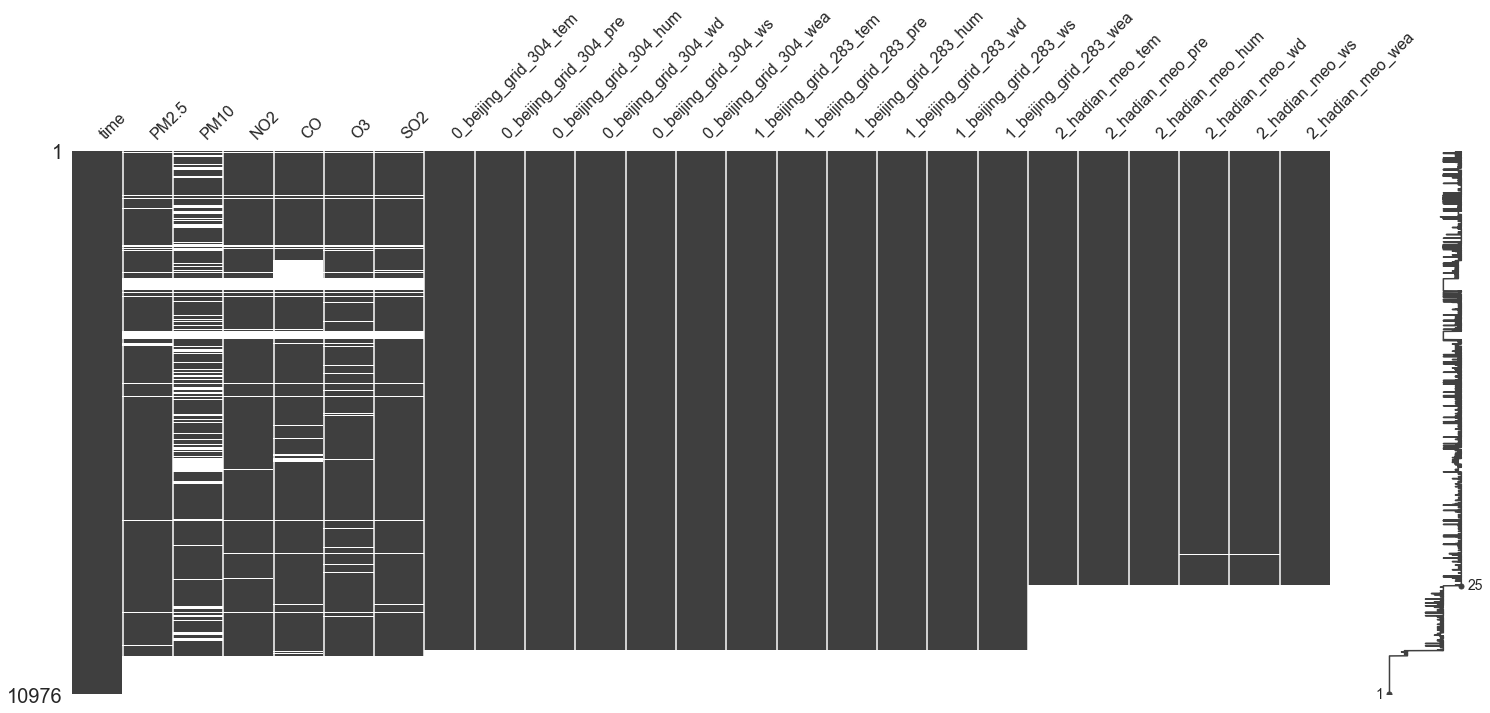

In [41]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib

def missing_data_analysis(df, station):
    missing_data_df = df
    missing_rate_df = missing_data_df.isnull().sum() / len(missing_data_df)
    missing_rate_df = pd.DataFrame(missing_rate_df).reset_index()
    missing_rate_df.columns = ['col', 'rate']
    
    # Bar Chart
    fig, ax = plt.subplots(figsize=(30,10))
    ax.bar(missing_rate_df['col'], missing_rate_df['rate'])
    
#     ax.title.set_text(key)
    ax.set_title(station, fontweight="bold", size=30) # Title
    ax.set_ylabel('Missing Rate', fontsize = 20.0) # Y label
    ax.set_xlabel('Columns', fontsize = 20) # X label
    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.show()
    

def msno_analysis(df, station):
    #fig, ax = plt.subplots(figsize=(30,10))
    print("============== {} ================".format(station))
    print(df.isnull().any())
    msno.matrix(df)
    
    
msno_analysis(atzx, 'aotizhongxin')

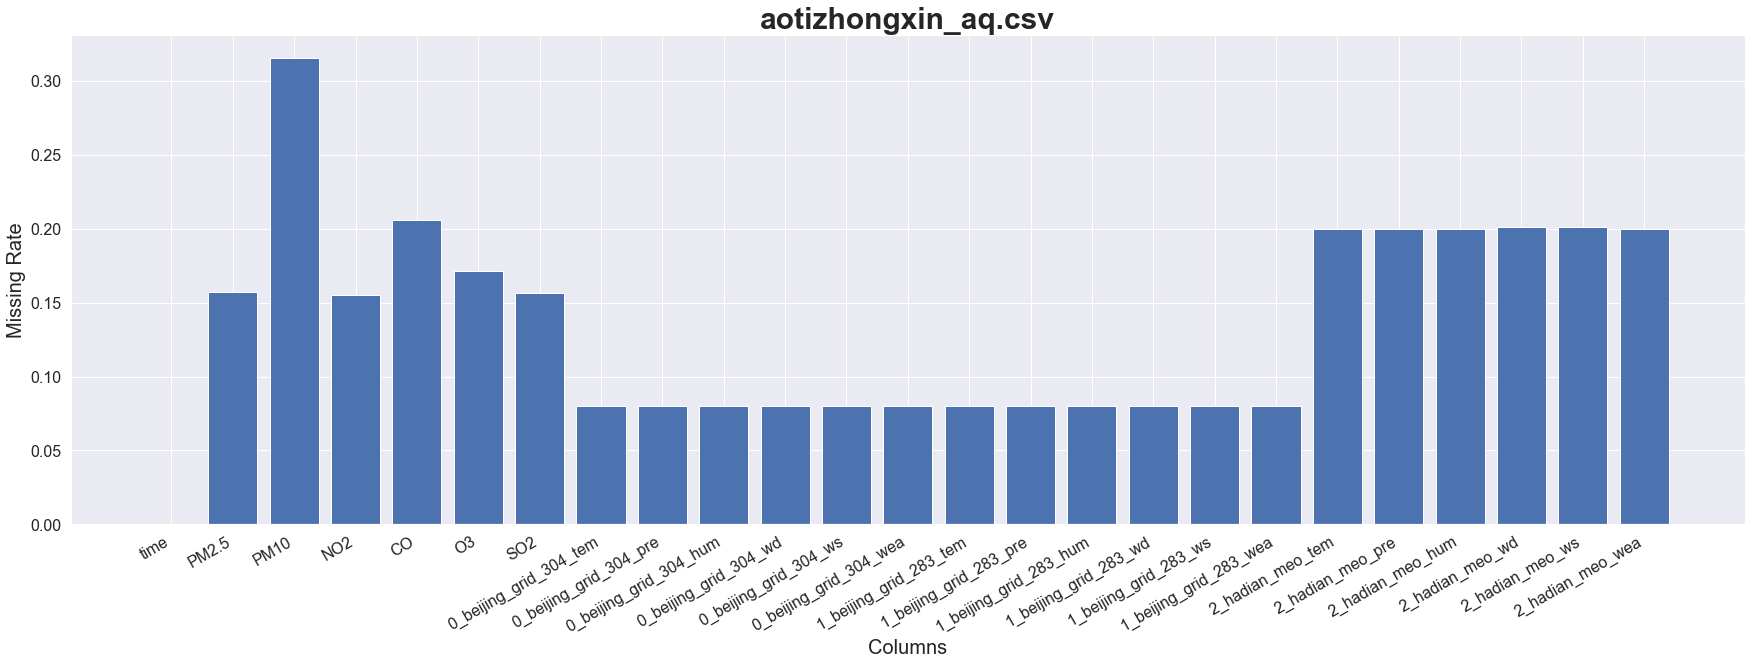

============== aotizhongxin_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_304_tem     True
0_beijing_grid_304_pre     True
0_beijing_grid_304_hum     True
0_beijing_grid_304_wd      True
0_beijing_grid_304_ws      True
0_beijing_grid_304_wea     True
1_beijing_grid_283_tem     True
1_beijing_grid_283_pre     True
1_beijing_grid_283_hum     True
1_beijing_grid_283_wd      True
1_beijing_grid_283_ws      True
1_beijing_grid_283_wea     True
2_hadian_meo_tem           True
2_hadian_meo_pre           True
2_hadian_meo_hum           True
2_hadian_meo_wd            True
2_hadian_meo_ws            True
2_hadian_meo_wea           True
dtype: bool


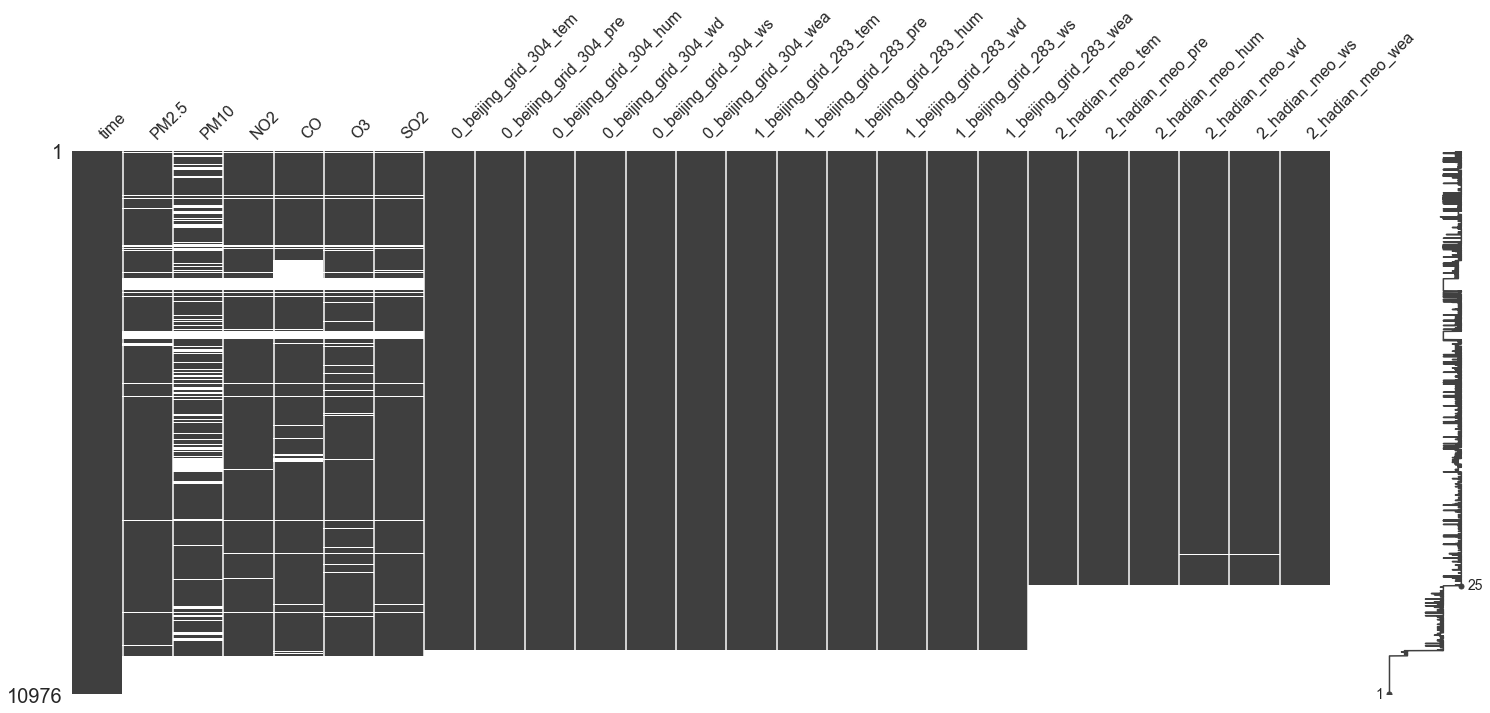

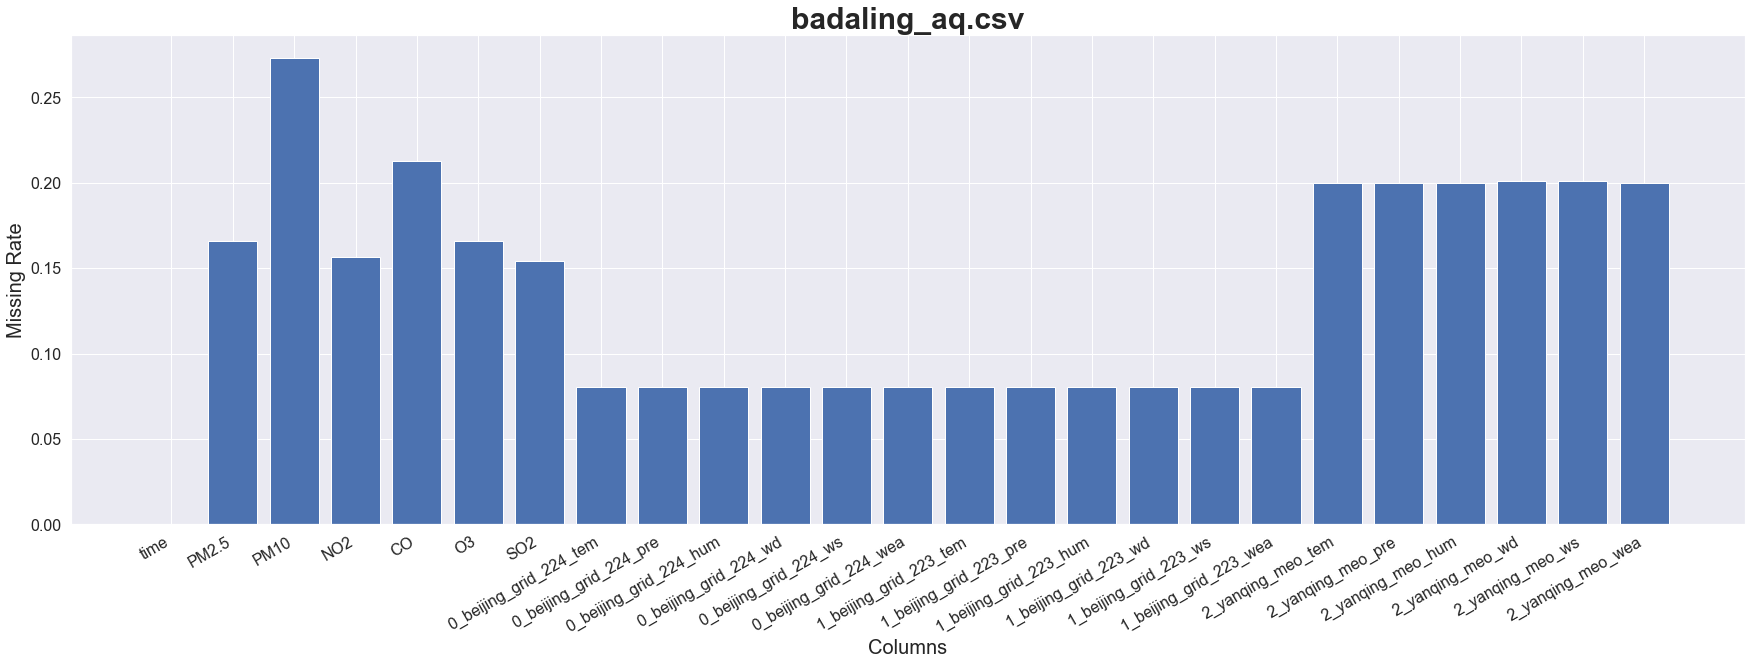

============== badaling_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_224_tem     True
0_beijing_grid_224_pre     True
0_beijing_grid_224_hum     True
0_beijing_grid_224_wd      True
0_beijing_grid_224_ws      True
0_beijing_grid_224_wea     True
1_beijing_grid_223_tem     True
1_beijing_grid_223_pre     True
1_beijing_grid_223_hum     True
1_beijing_grid_223_wd      True
1_beijing_grid_223_ws      True
1_beijing_grid_223_wea     True
2_yanqing_meo_tem          True
2_yanqing_meo_pre          True
2_yanqing_meo_hum          True
2_yanqing_meo_wd           True
2_yanqing_meo_ws           True
2_yanqing_meo_wea          True
dtype: bool


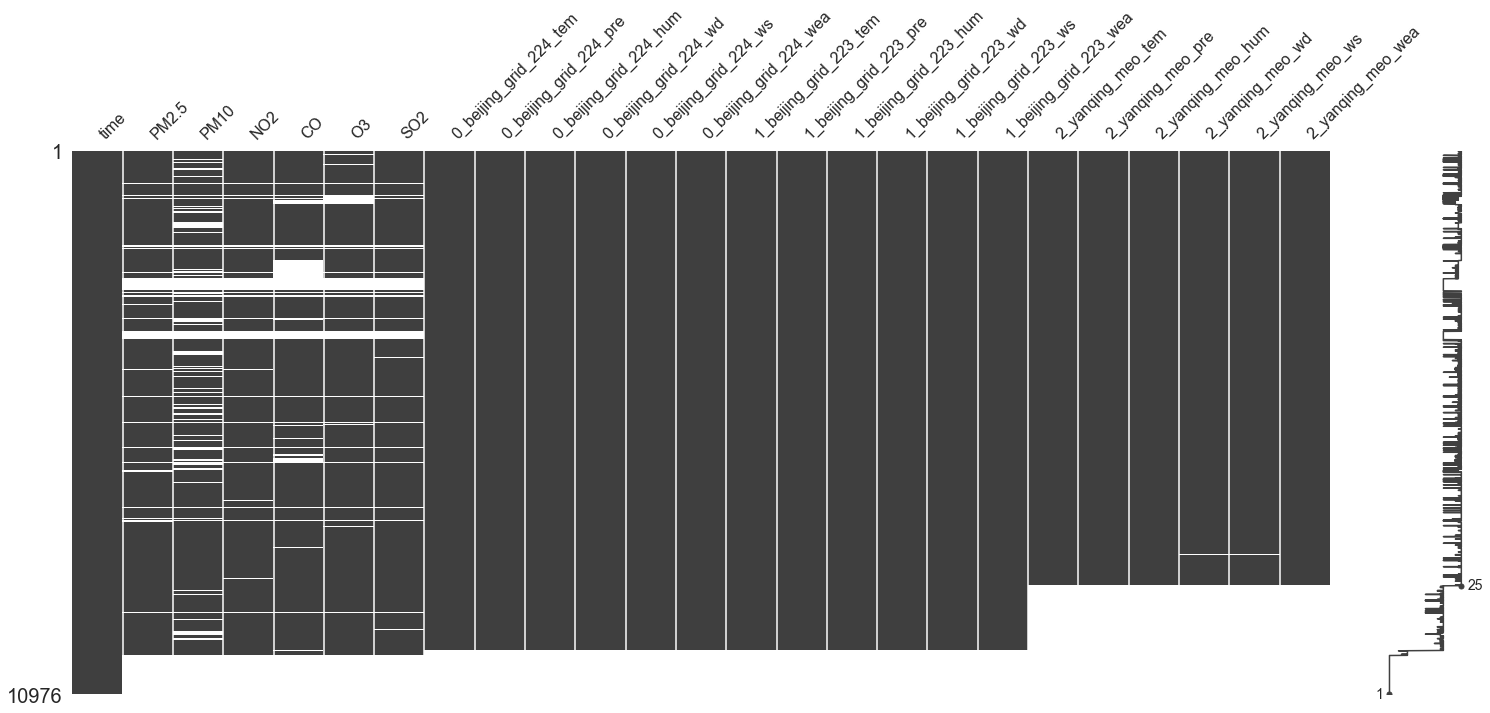

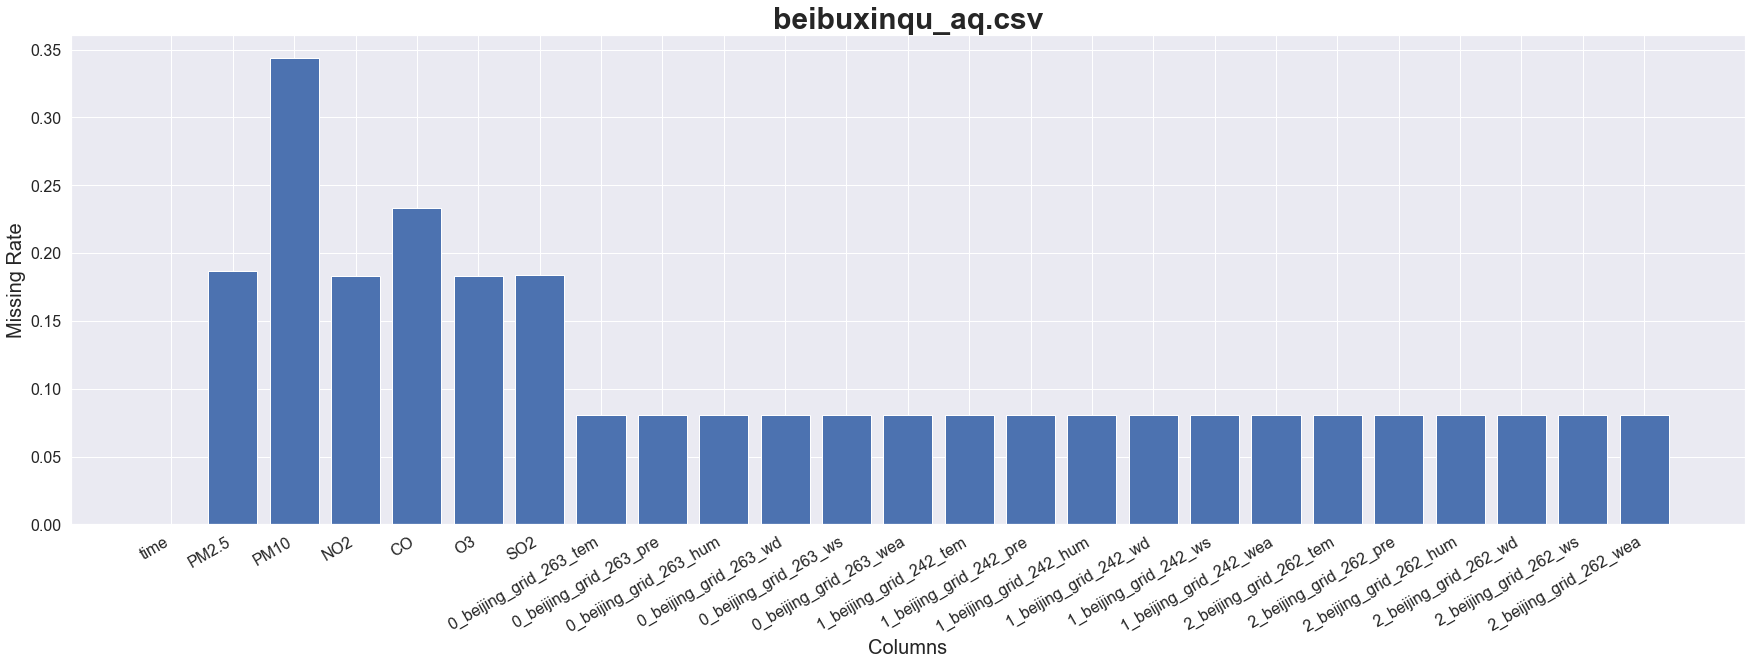

============== beibuxinqu_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_263_tem     True
0_beijing_grid_263_pre     True
0_beijing_grid_263_hum     True
0_beijing_grid_263_wd      True
0_beijing_grid_263_ws      True
0_beijing_grid_263_wea     True
1_beijing_grid_242_tem     True
1_beijing_grid_242_pre     True
1_beijing_grid_242_hum     True
1_beijing_grid_242_wd      True
1_beijing_grid_242_ws      True
1_beijing_grid_242_wea     True
2_beijing_grid_262_tem     True
2_beijing_grid_262_pre     True
2_beijing_grid_262_hum     True
2_beijing_grid_262_wd      True
2_beijing_grid_262_ws      True
2_beijing_grid_262_wea     True
dtype: bool


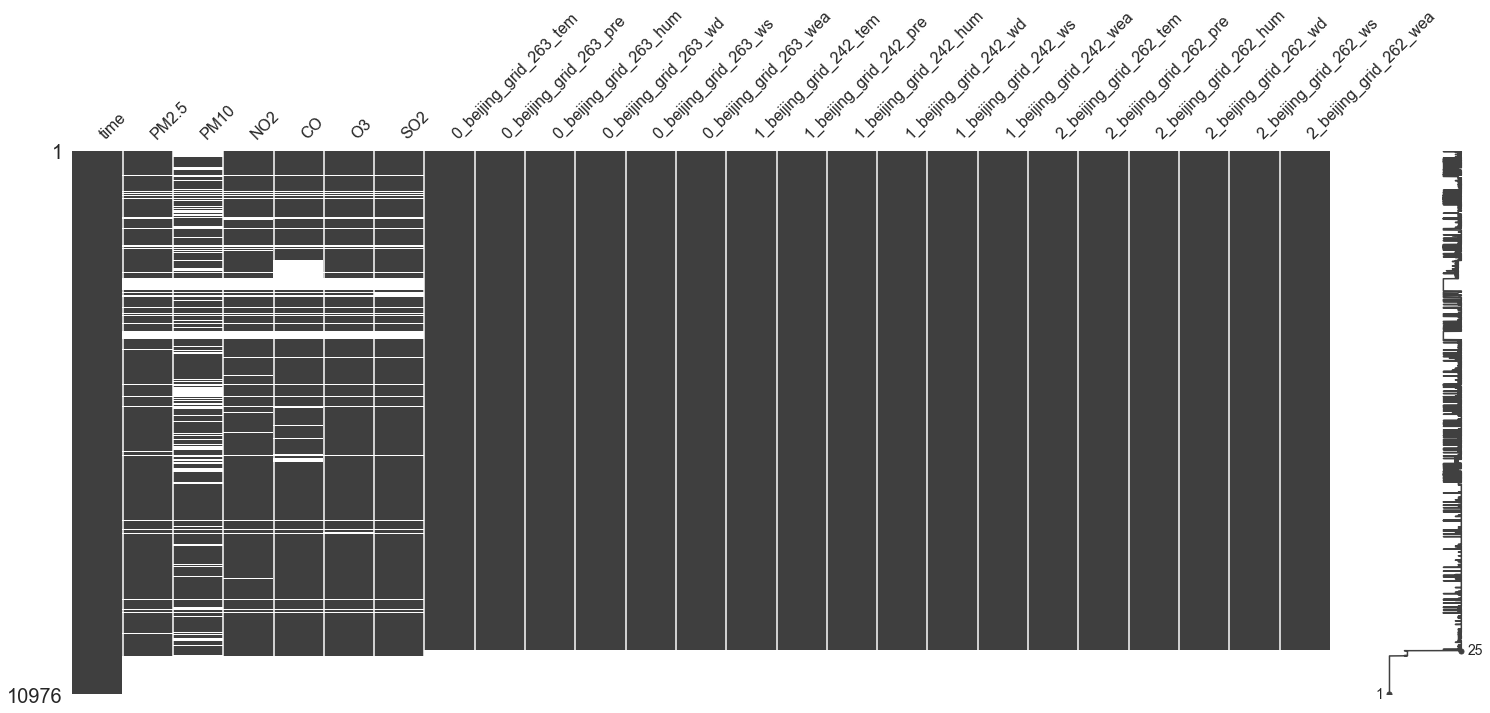

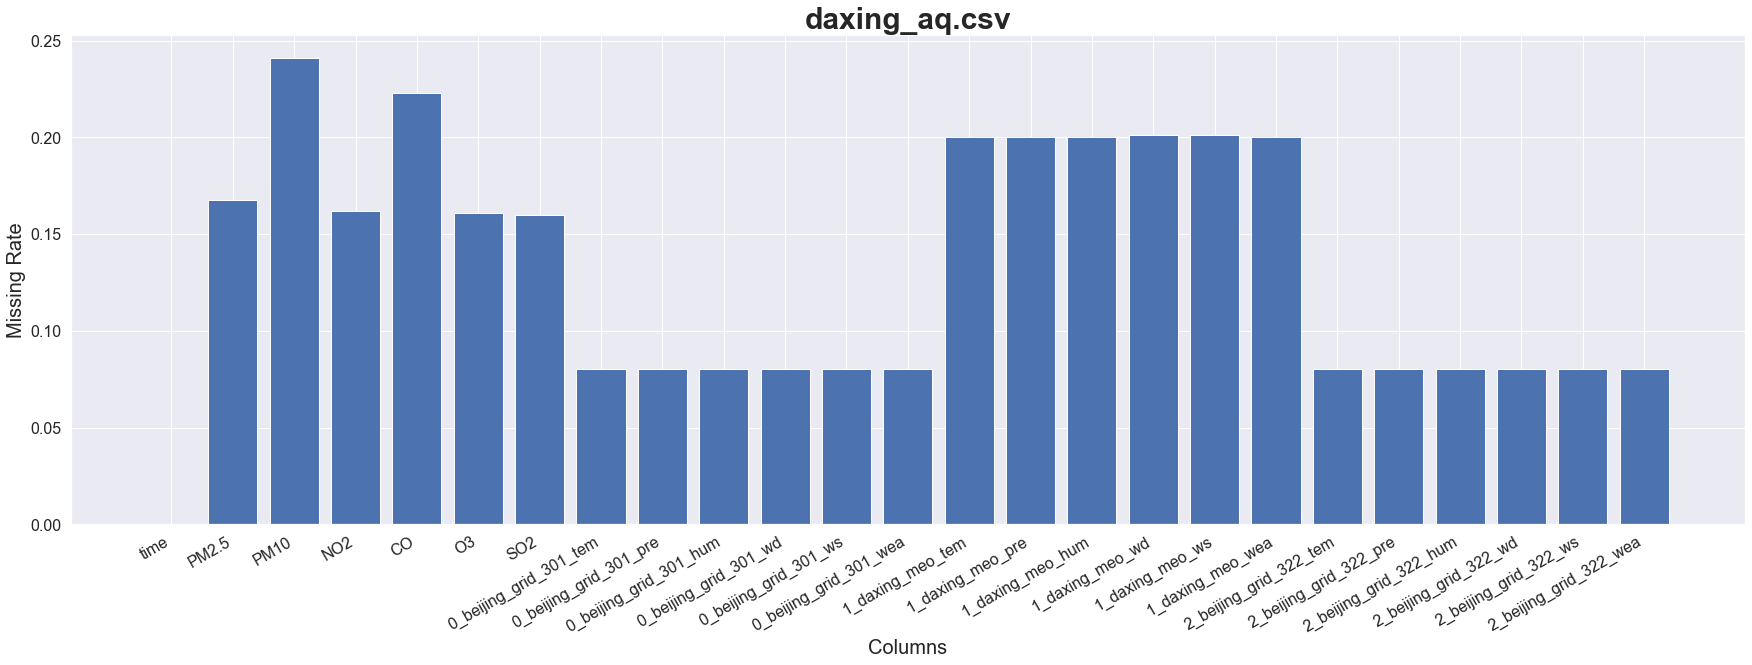

============== daxing_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_301_tem     True
0_beijing_grid_301_pre     True
0_beijing_grid_301_hum     True
0_beijing_grid_301_wd      True
0_beijing_grid_301_ws      True
0_beijing_grid_301_wea     True
1_daxing_meo_tem           True
1_daxing_meo_pre           True
1_daxing_meo_hum           True
1_daxing_meo_wd            True
1_daxing_meo_ws            True
1_daxing_meo_wea           True
2_beijing_grid_322_tem     True
2_beijing_grid_322_pre     True
2_beijing_grid_322_hum     True
2_beijing_grid_322_wd      True
2_beijing_grid_322_ws      True
2_beijing_grid_322_wea     True
dtype: bool


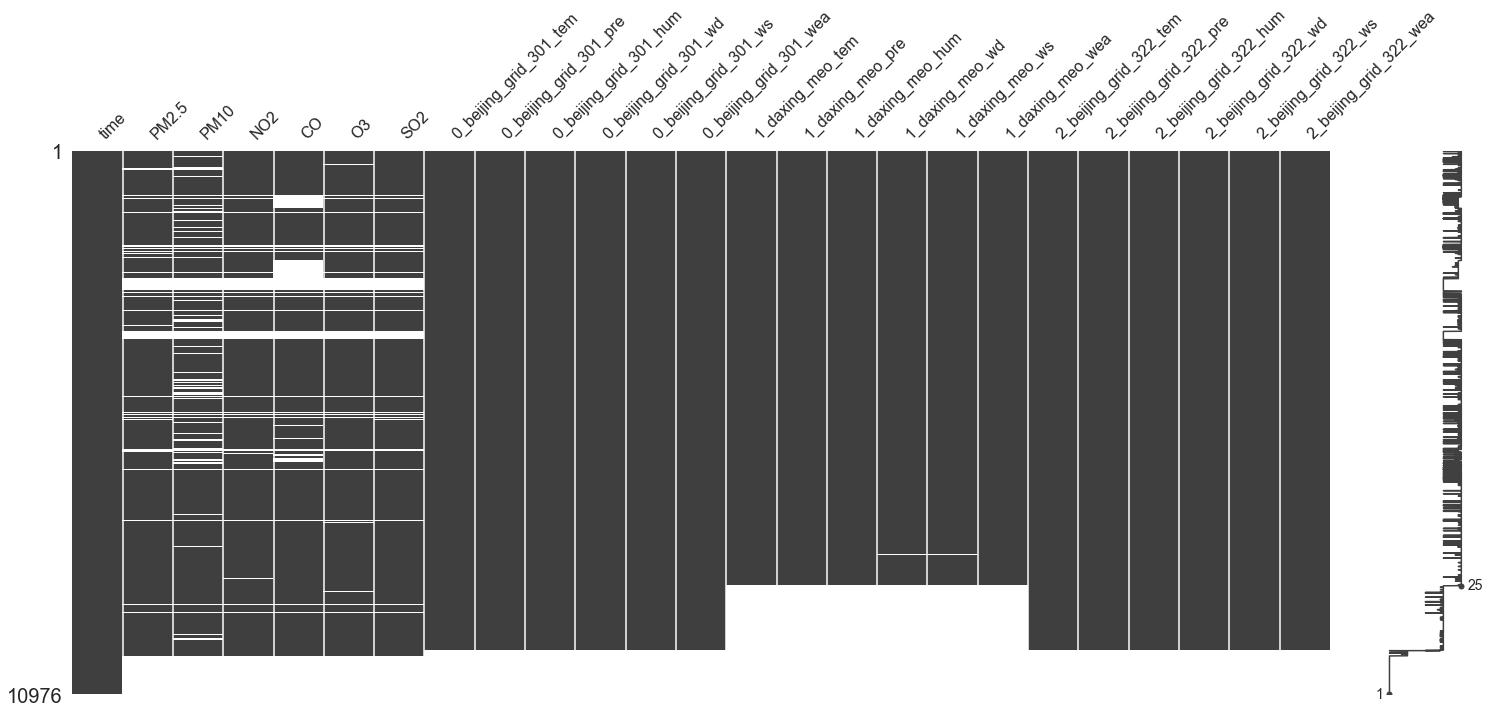

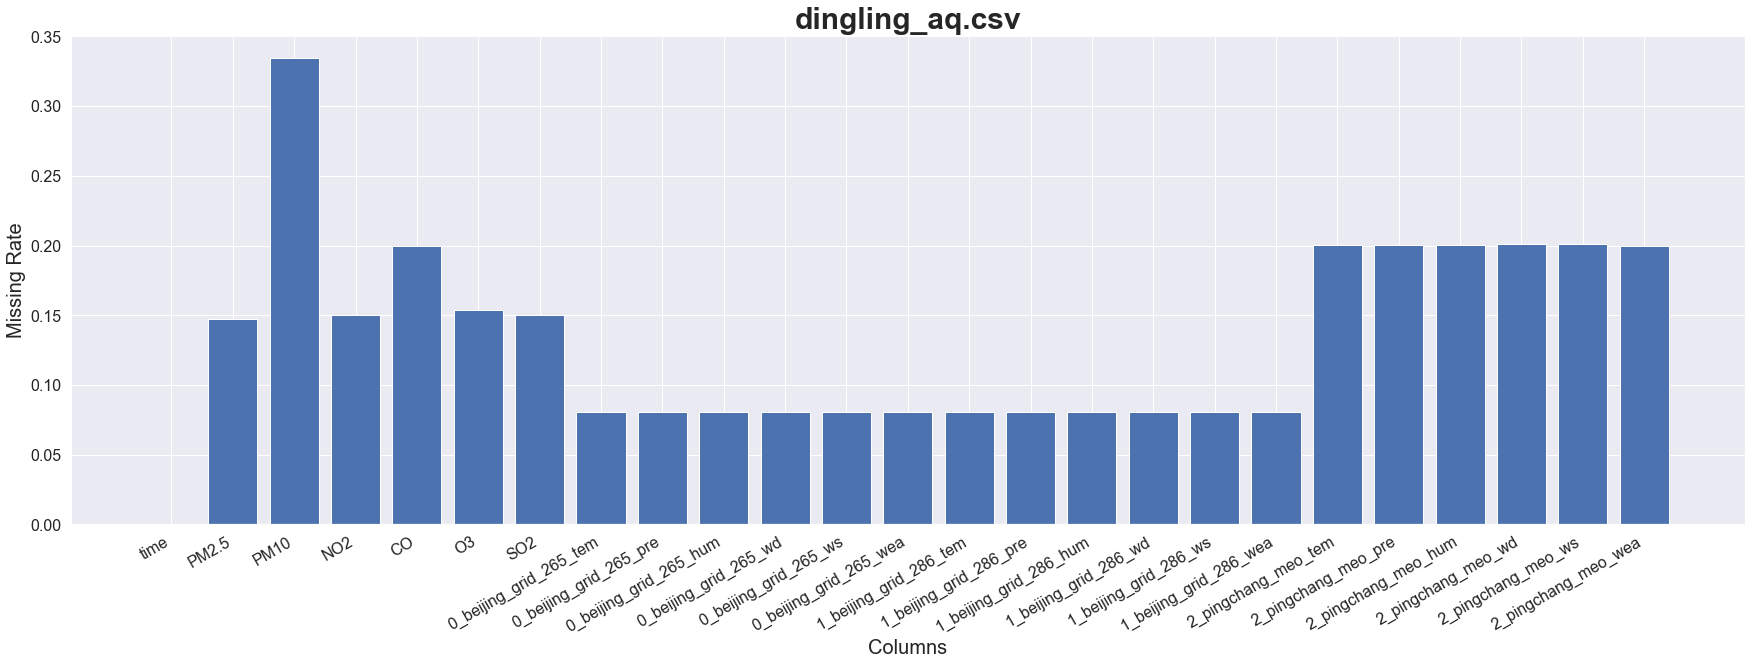

============== dingling_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_265_tem     True
0_beijing_grid_265_pre     True
0_beijing_grid_265_hum     True
0_beijing_grid_265_wd      True
0_beijing_grid_265_ws      True
0_beijing_grid_265_wea     True
1_beijing_grid_286_tem     True
1_beijing_grid_286_pre     True
1_beijing_grid_286_hum     True
1_beijing_grid_286_wd      True
1_beijing_grid_286_ws      True
1_beijing_grid_286_wea     True
2_pingchang_meo_tem        True
2_pingchang_meo_pre        True
2_pingchang_meo_hum        True
2_pingchang_meo_wd         True
2_pingchang_meo_ws         True
2_pingchang_meo_wea        True
dtype: bool


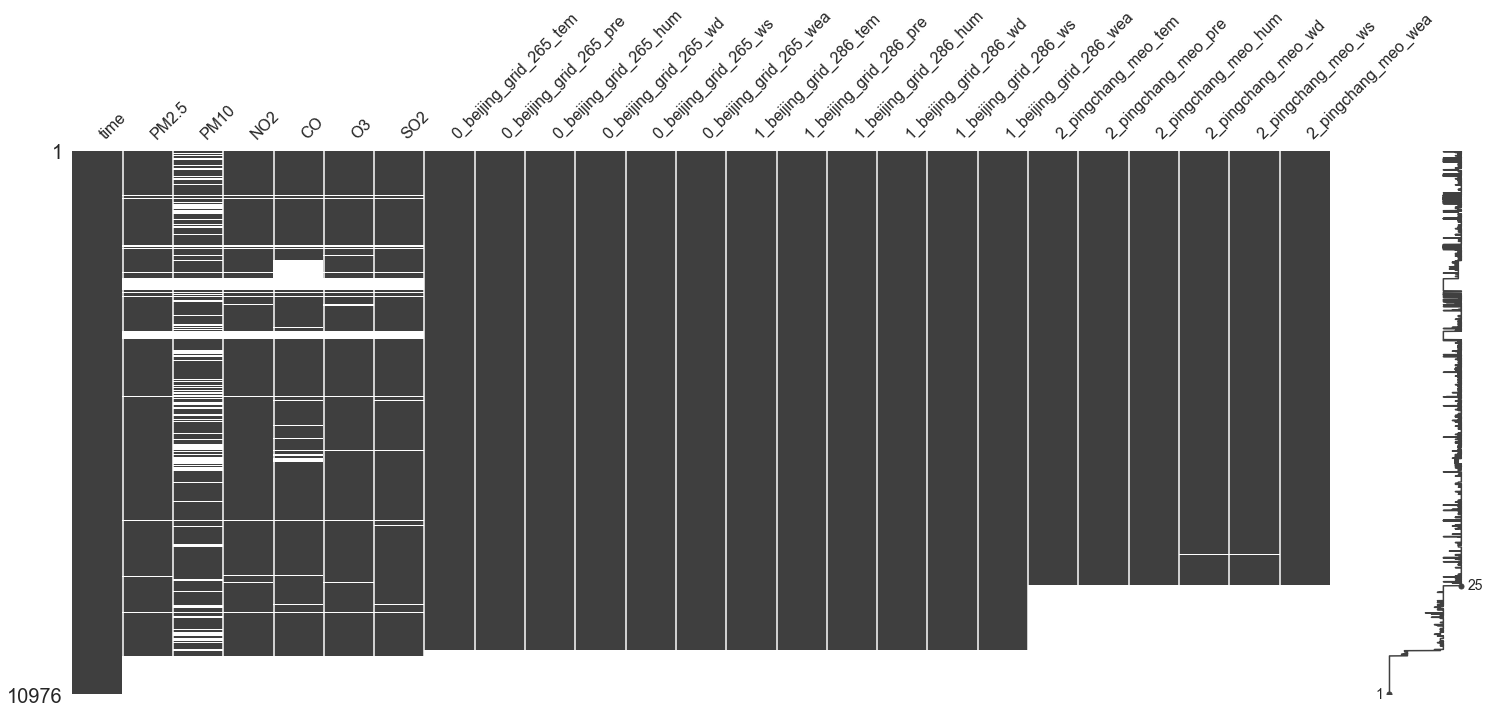

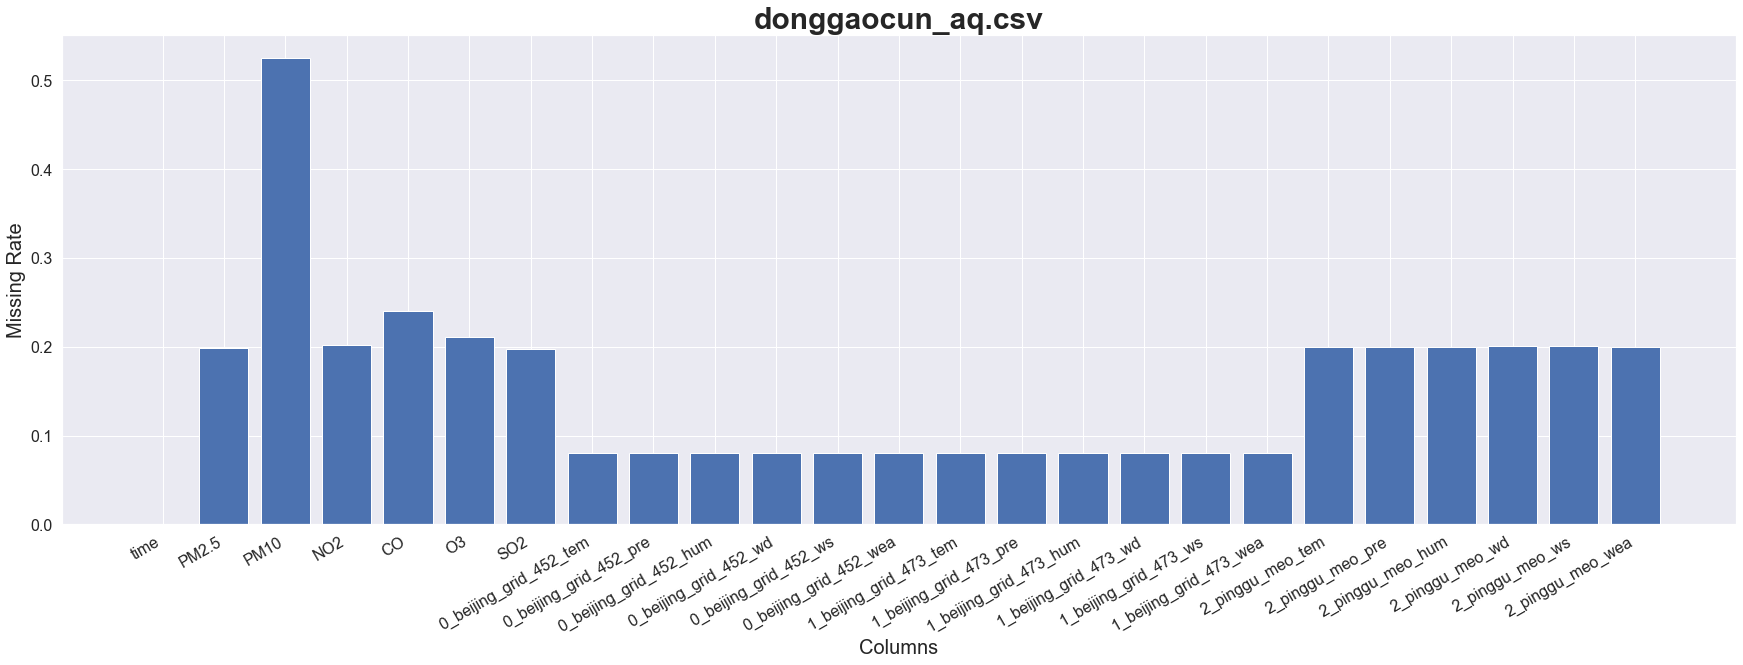

============== donggaocun_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_452_tem     True
0_beijing_grid_452_pre     True
0_beijing_grid_452_hum     True
0_beijing_grid_452_wd      True
0_beijing_grid_452_ws      True
0_beijing_grid_452_wea     True
1_beijing_grid_473_tem     True
1_beijing_grid_473_pre     True
1_beijing_grid_473_hum     True
1_beijing_grid_473_wd      True
1_beijing_grid_473_ws      True
1_beijing_grid_473_wea     True
2_pinggu_meo_tem           True
2_pinggu_meo_pre           True
2_pinggu_meo_hum           True
2_pinggu_meo_wd            True
2_pinggu_meo_ws            True
2_pinggu_meo_wea           True
dtype: bool


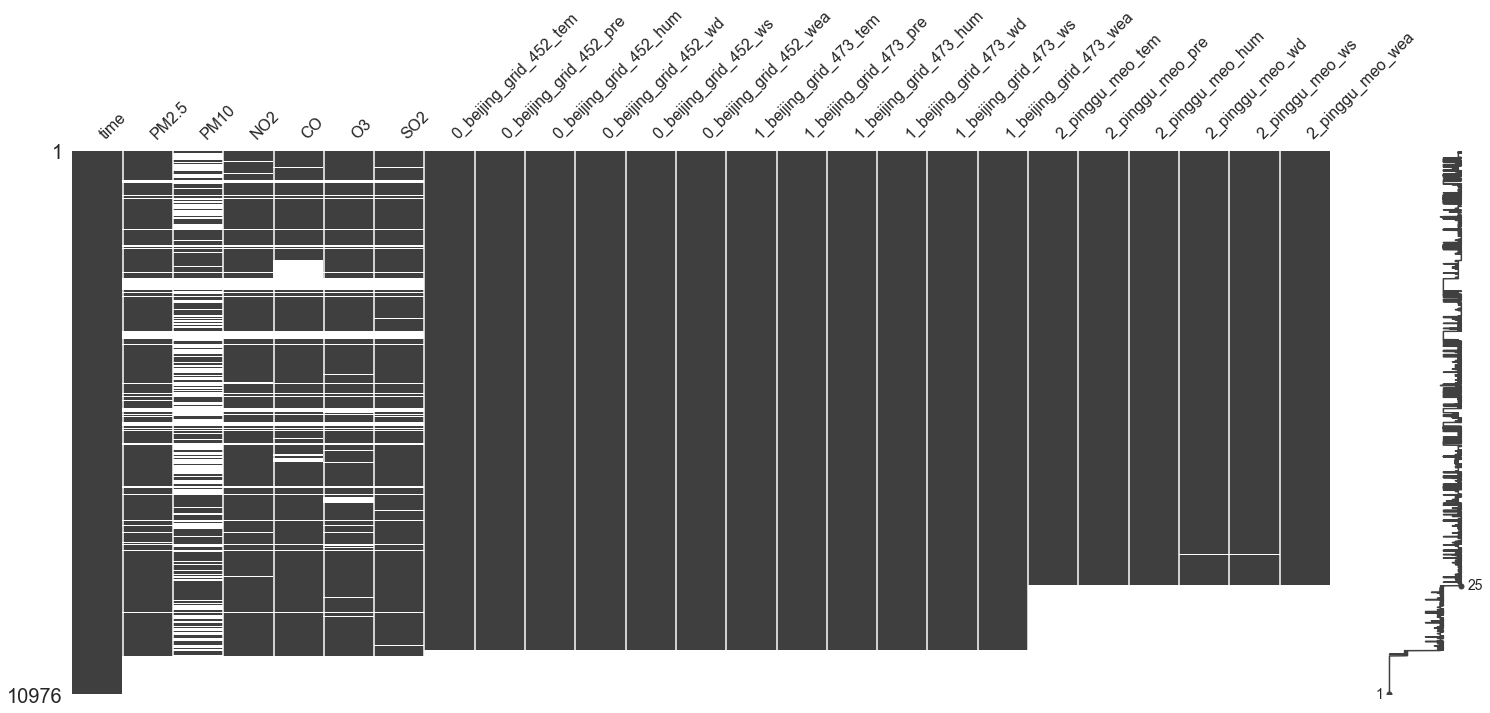

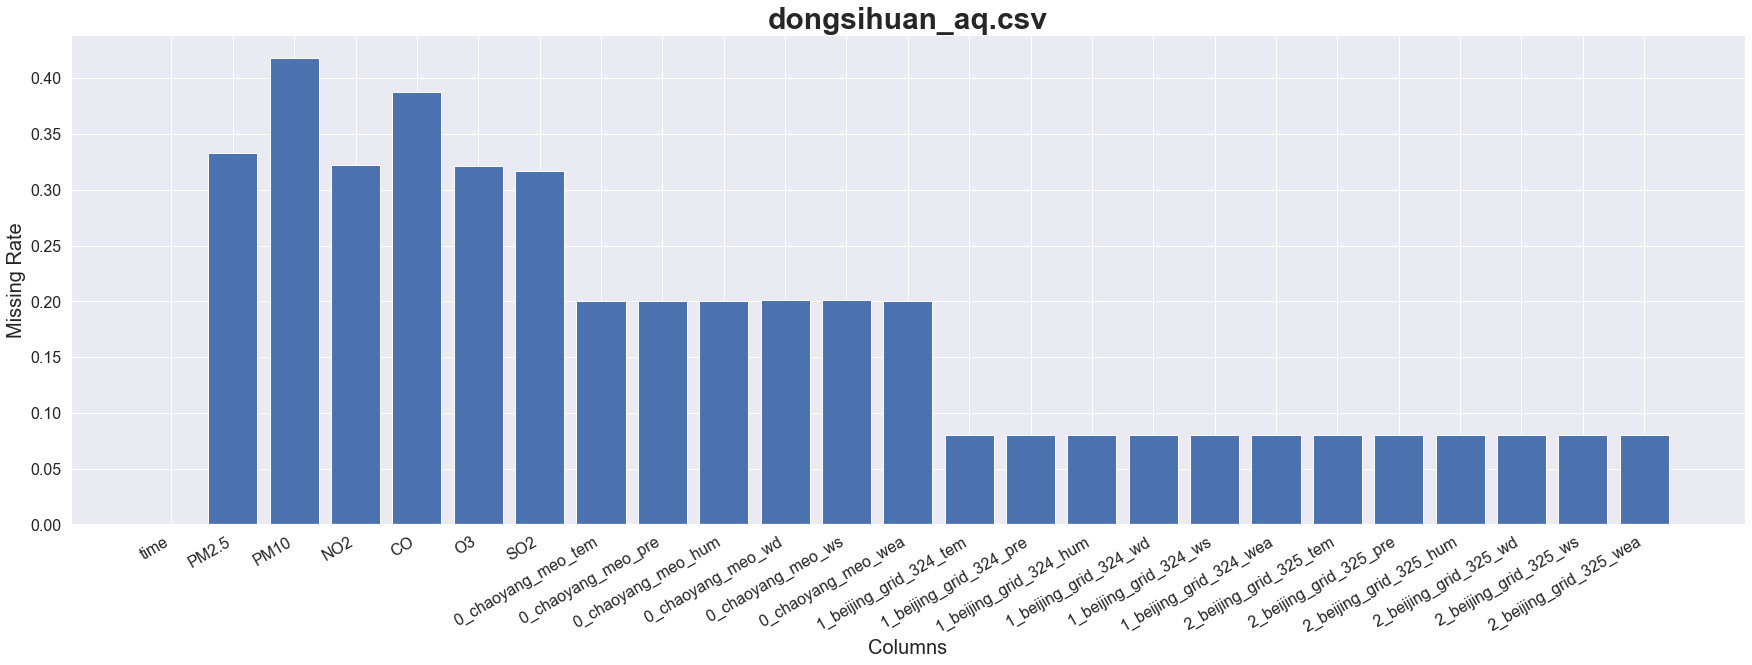

============== dongsihuan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_chaoyang_meo_tem         True
0_chaoyang_meo_pre         True
0_chaoyang_meo_hum         True
0_chaoyang_meo_wd          True
0_chaoyang_meo_ws          True
0_chaoyang_meo_wea         True
1_beijing_grid_324_tem     True
1_beijing_grid_324_pre     True
1_beijing_grid_324_hum     True
1_beijing_grid_324_wd      True
1_beijing_grid_324_ws      True
1_beijing_grid_324_wea     True
2_beijing_grid_325_tem     True
2_beijing_grid_325_pre     True
2_beijing_grid_325_hum     True
2_beijing_grid_325_wd      True
2_beijing_grid_325_ws      True
2_beijing_grid_325_wea     True
dtype: bool


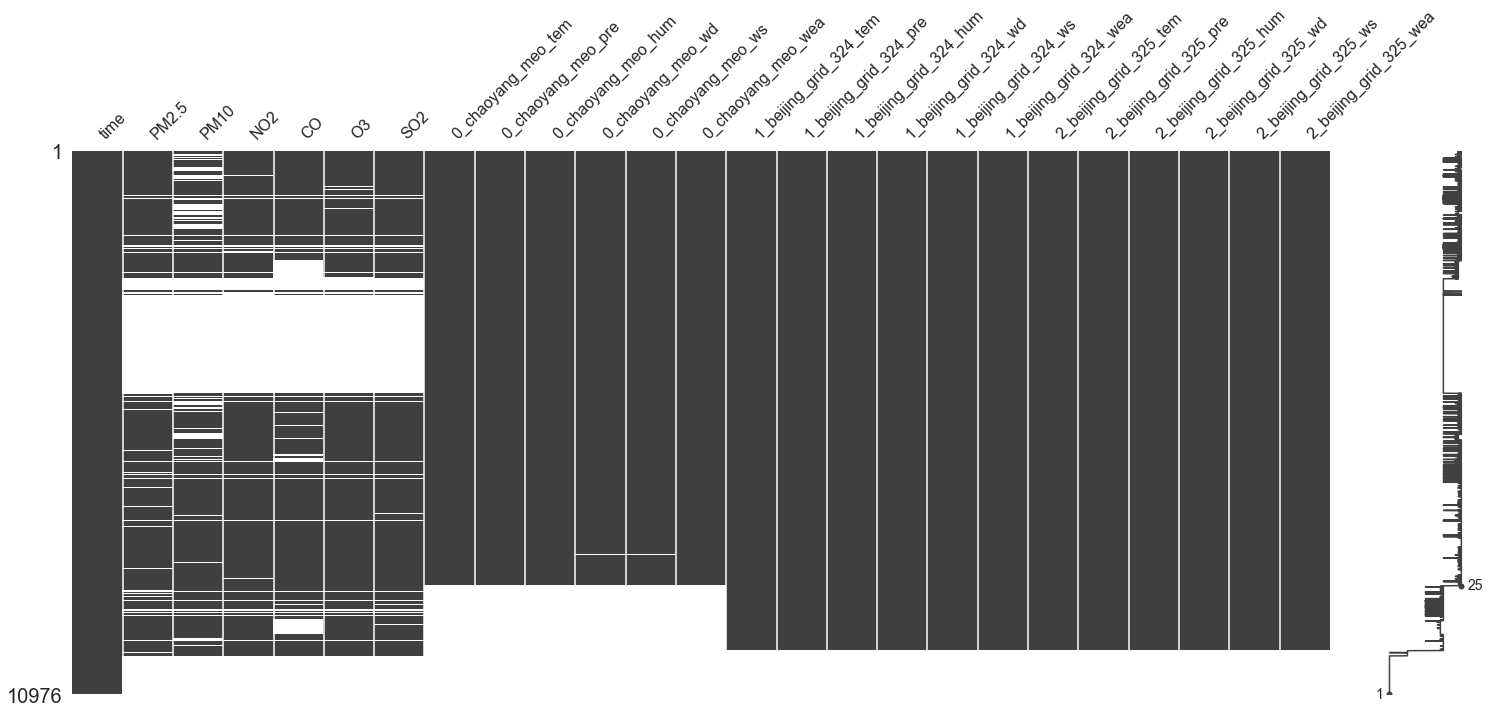

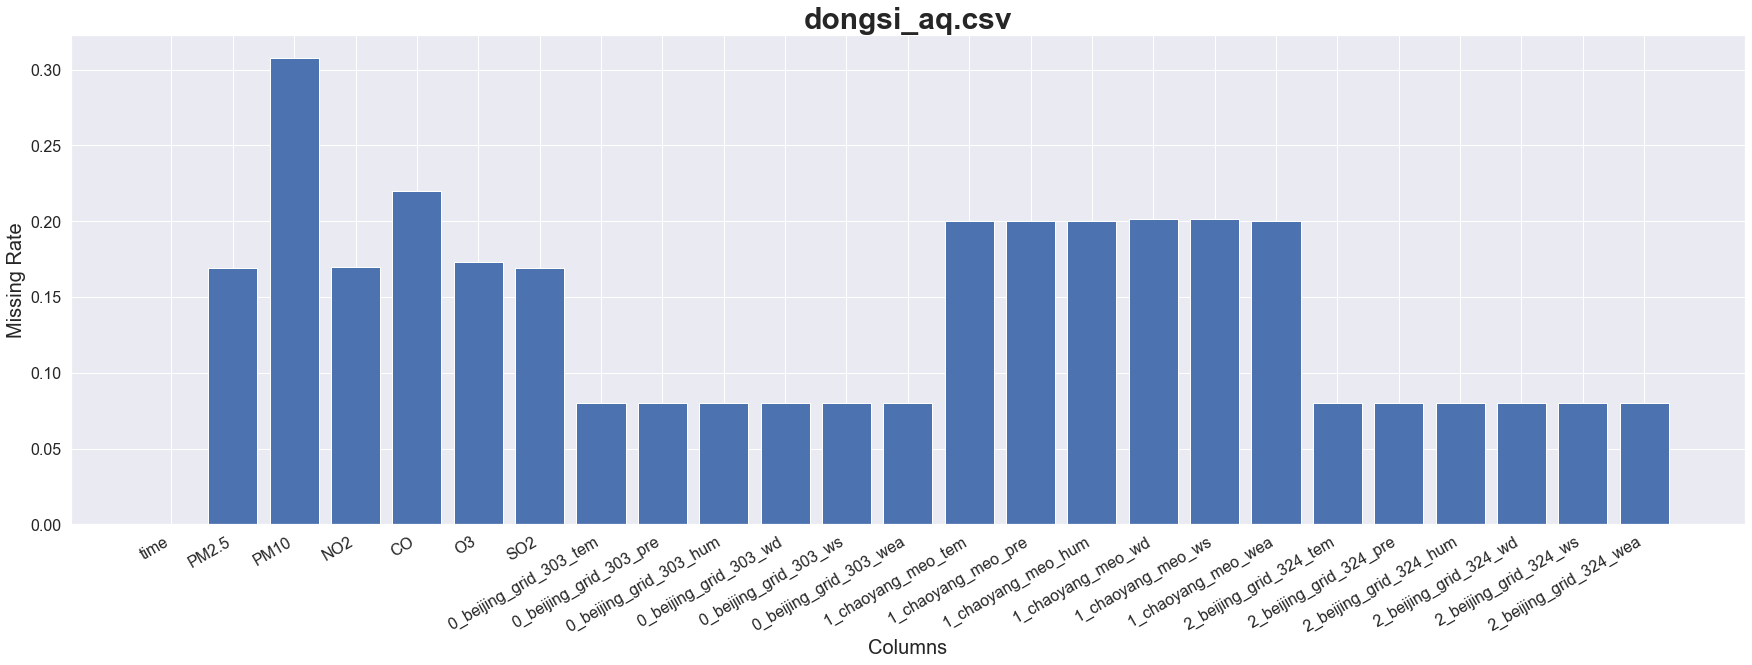

============== dongsi_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_chaoyang_meo_tem         True
1_chaoyang_meo_pre         True
1_chaoyang_meo_hum         True
1_chaoyang_meo_wd          True
1_chaoyang_meo_ws          True
1_chaoyang_meo_wea         True
2_beijing_grid_324_tem     True
2_beijing_grid_324_pre     True
2_beijing_grid_324_hum     True
2_beijing_grid_324_wd      True
2_beijing_grid_324_ws      True
2_beijing_grid_324_wea     True
dtype: bool


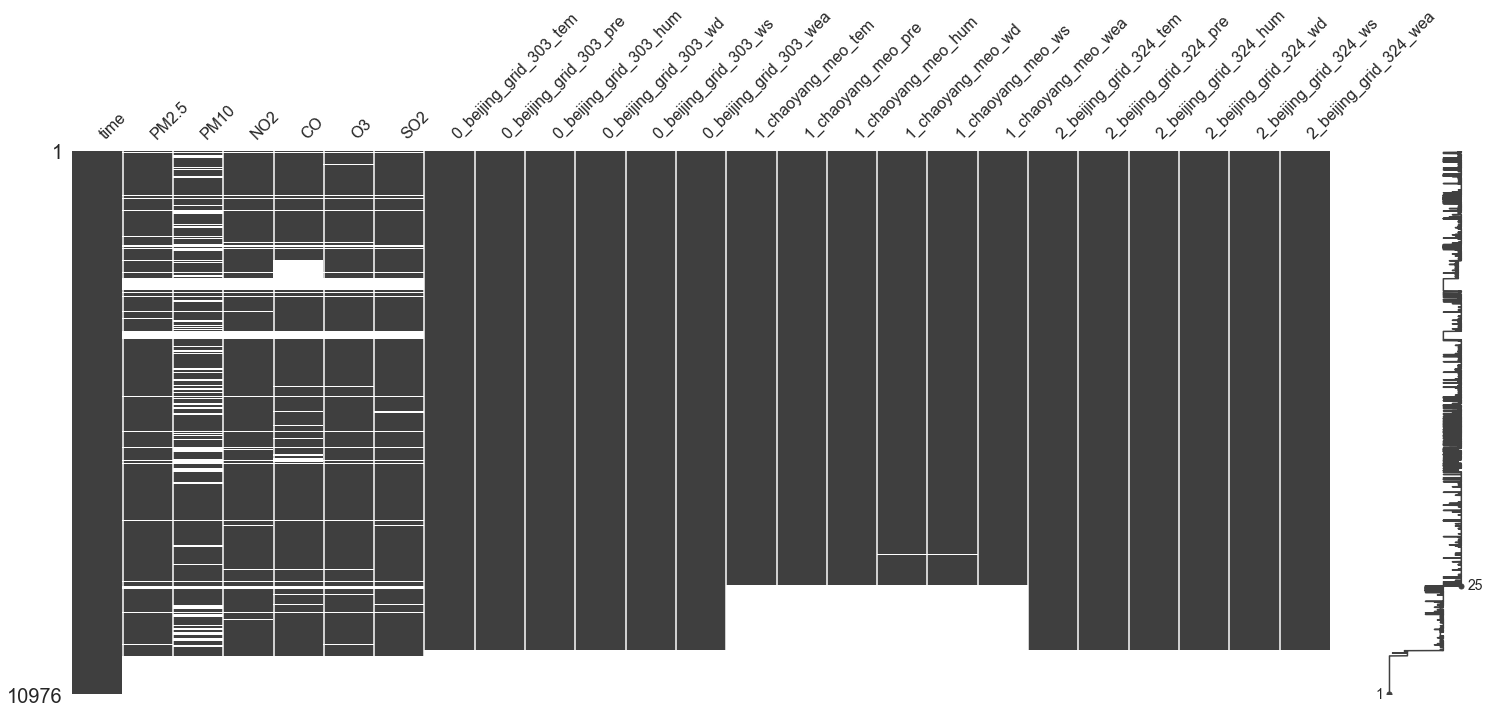

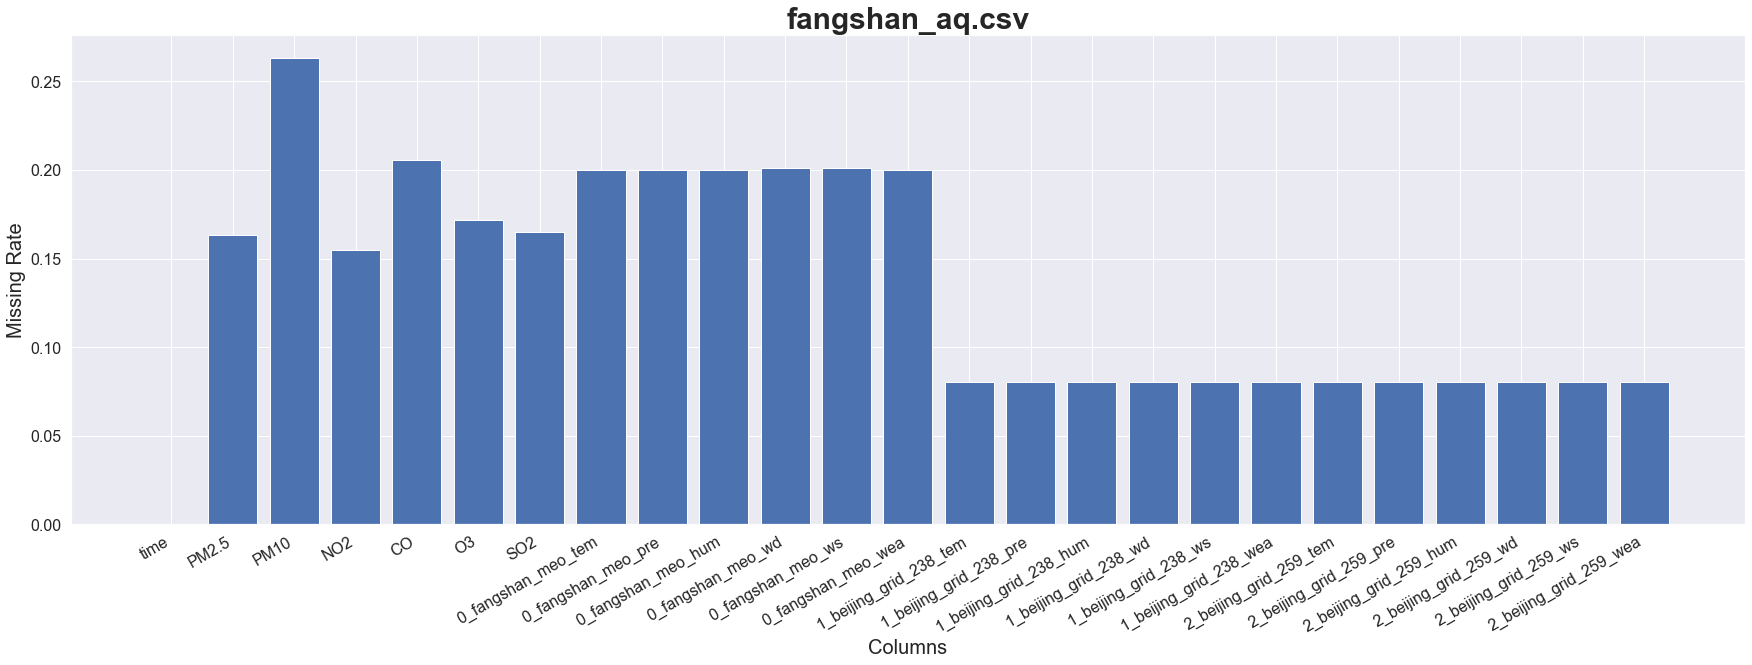

============== fangshan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_fangshan_meo_tem         True
0_fangshan_meo_pre         True
0_fangshan_meo_hum         True
0_fangshan_meo_wd          True
0_fangshan_meo_ws          True
0_fangshan_meo_wea         True
1_beijing_grid_238_tem     True
1_beijing_grid_238_pre     True
1_beijing_grid_238_hum     True
1_beijing_grid_238_wd      True
1_beijing_grid_238_ws      True
1_beijing_grid_238_wea     True
2_beijing_grid_259_tem     True
2_beijing_grid_259_pre     True
2_beijing_grid_259_hum     True
2_beijing_grid_259_wd      True
2_beijing_grid_259_ws      True
2_beijing_grid_259_wea     True
dtype: bool


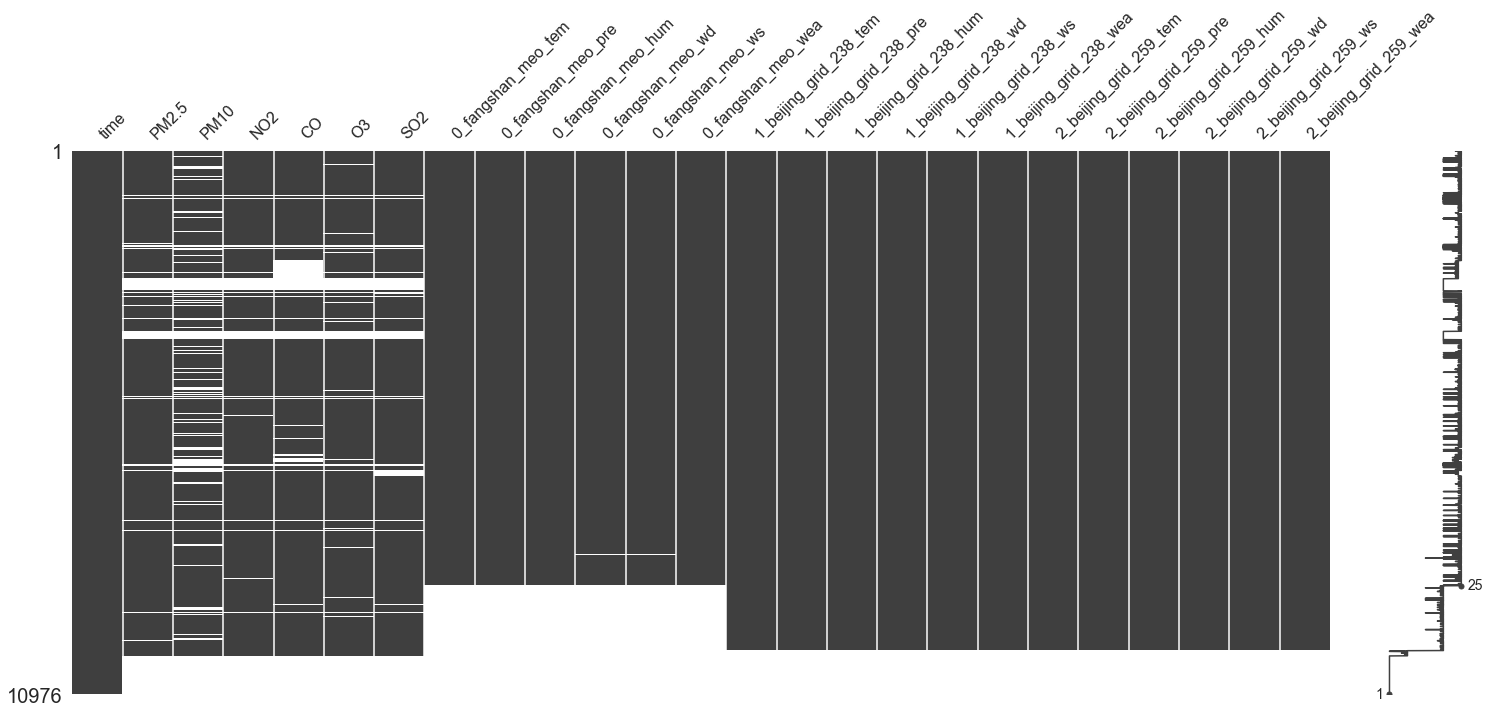

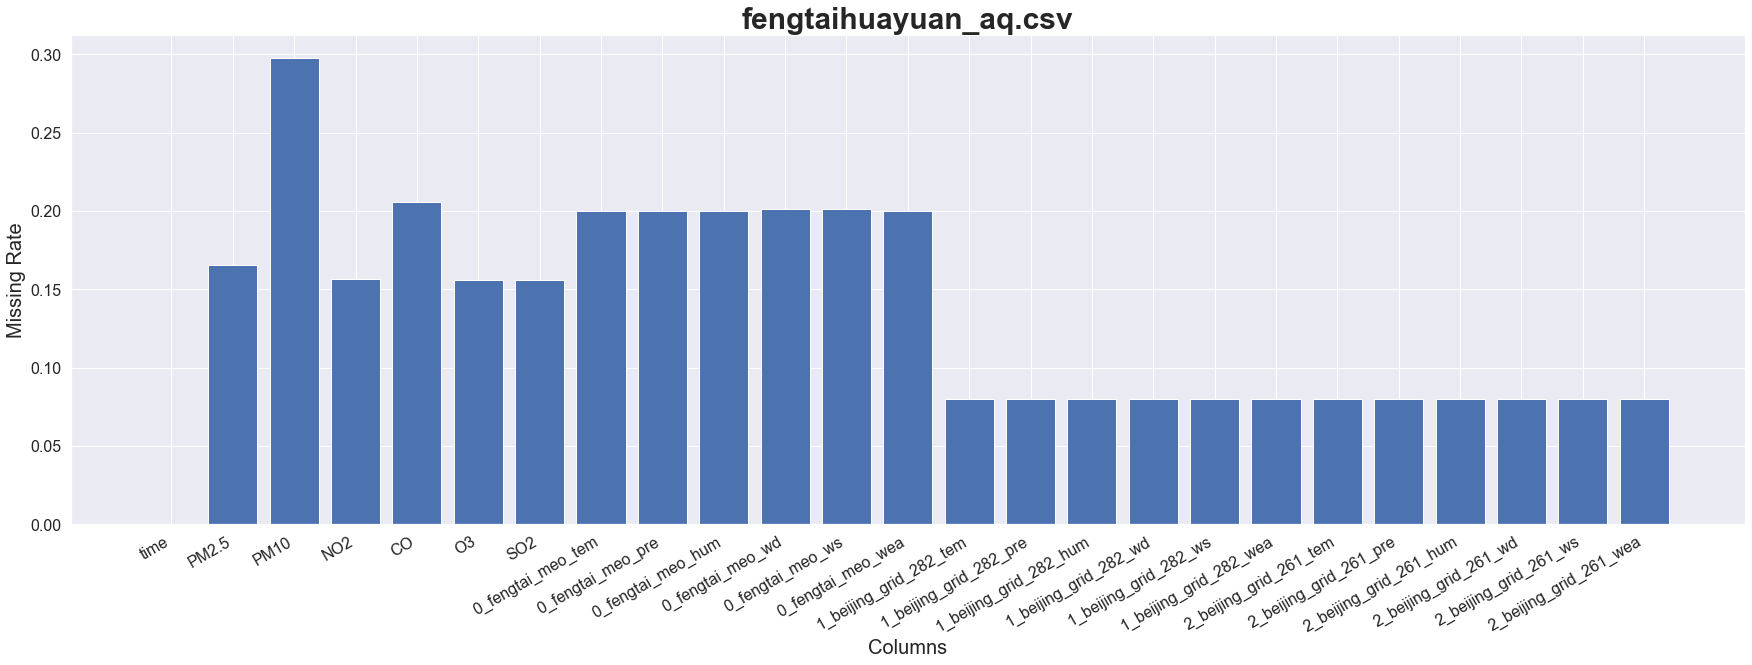

============== fengtaihuayuan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_fengtai_meo_tem          True
0_fengtai_meo_pre          True
0_fengtai_meo_hum          True
0_fengtai_meo_wd           True
0_fengtai_meo_ws           True
0_fengtai_meo_wea          True
1_beijing_grid_282_tem     True
1_beijing_grid_282_pre     True
1_beijing_grid_282_hum     True
1_beijing_grid_282_wd      True
1_beijing_grid_282_ws      True
1_beijing_grid_282_wea     True
2_beijing_grid_261_tem     True
2_beijing_grid_261_pre     True
2_beijing_grid_261_hum     True
2_beijing_grid_261_wd      True
2_beijing_grid_261_ws      True
2_beijing_grid_261_wea     True
dtype: bool


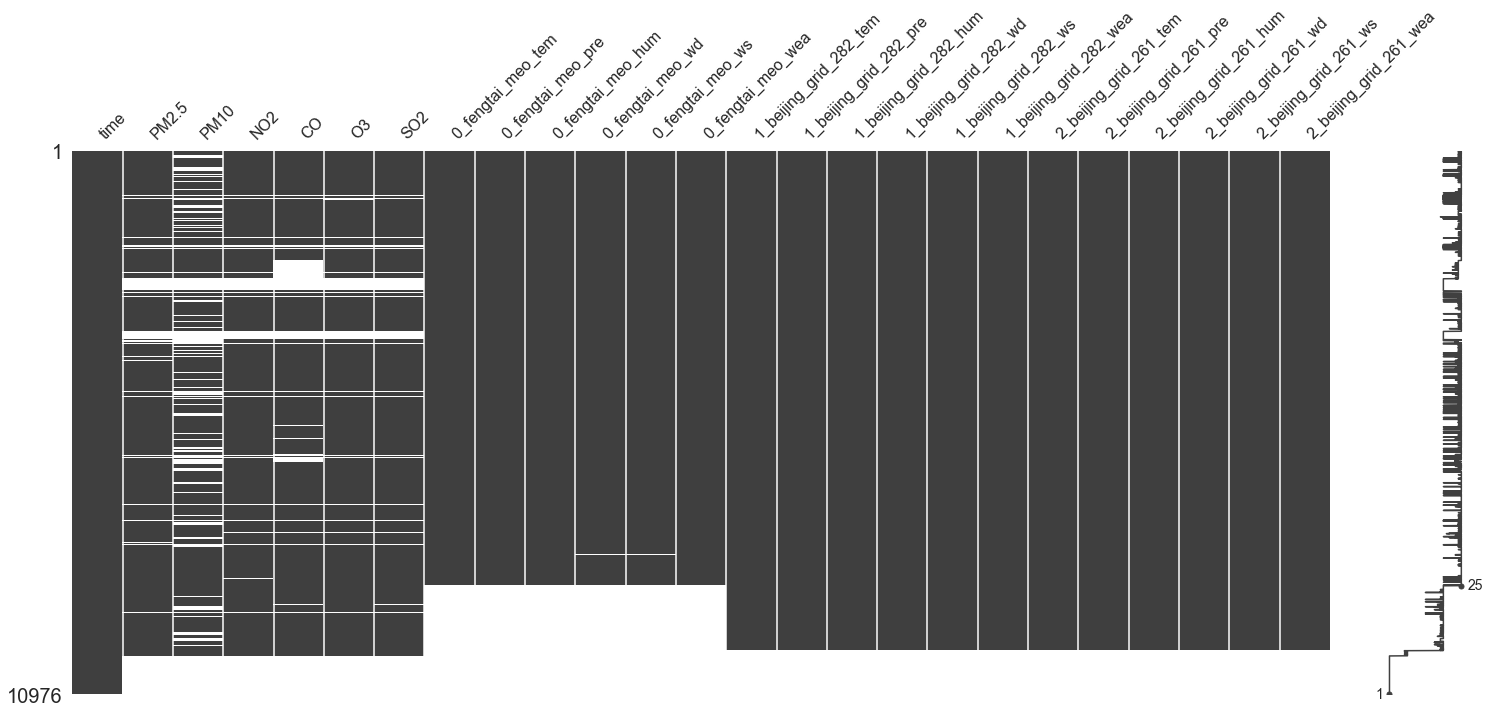

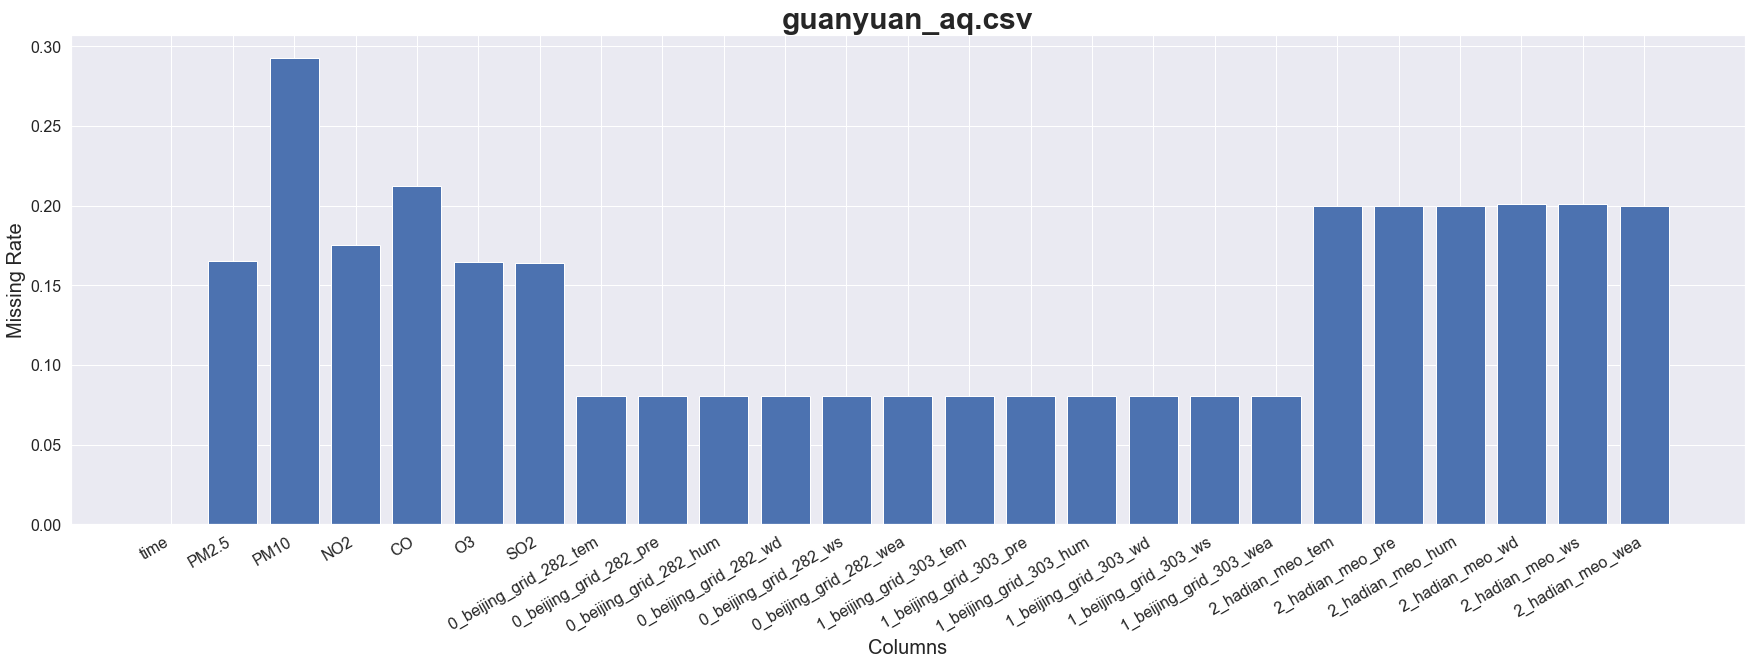

============== guanyuan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_282_tem     True
0_beijing_grid_282_pre     True
0_beijing_grid_282_hum     True
0_beijing_grid_282_wd      True
0_beijing_grid_282_ws      True
0_beijing_grid_282_wea     True
1_beijing_grid_303_tem     True
1_beijing_grid_303_pre     True
1_beijing_grid_303_hum     True
1_beijing_grid_303_wd      True
1_beijing_grid_303_ws      True
1_beijing_grid_303_wea     True
2_hadian_meo_tem           True
2_hadian_meo_pre           True
2_hadian_meo_hum           True
2_hadian_meo_wd            True
2_hadian_meo_ws            True
2_hadian_meo_wea           True
dtype: bool


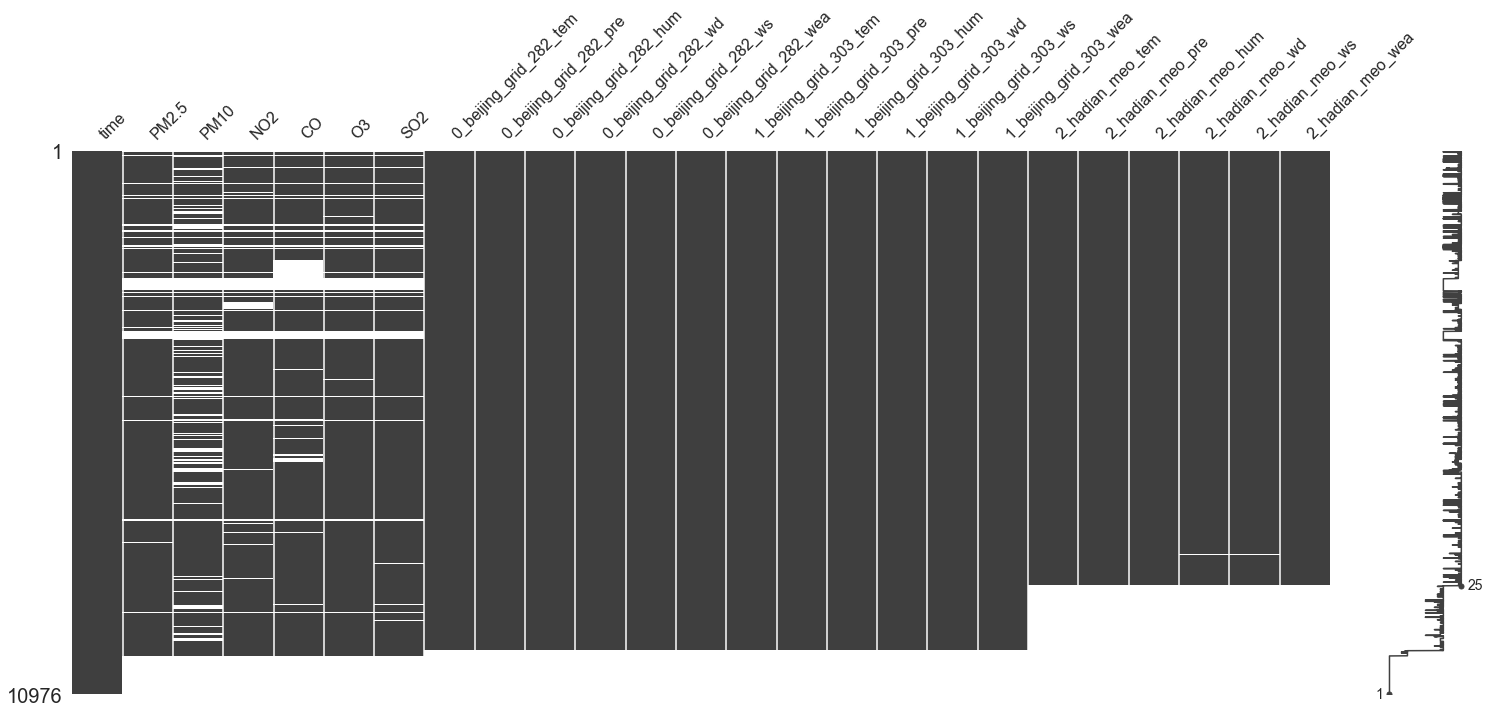

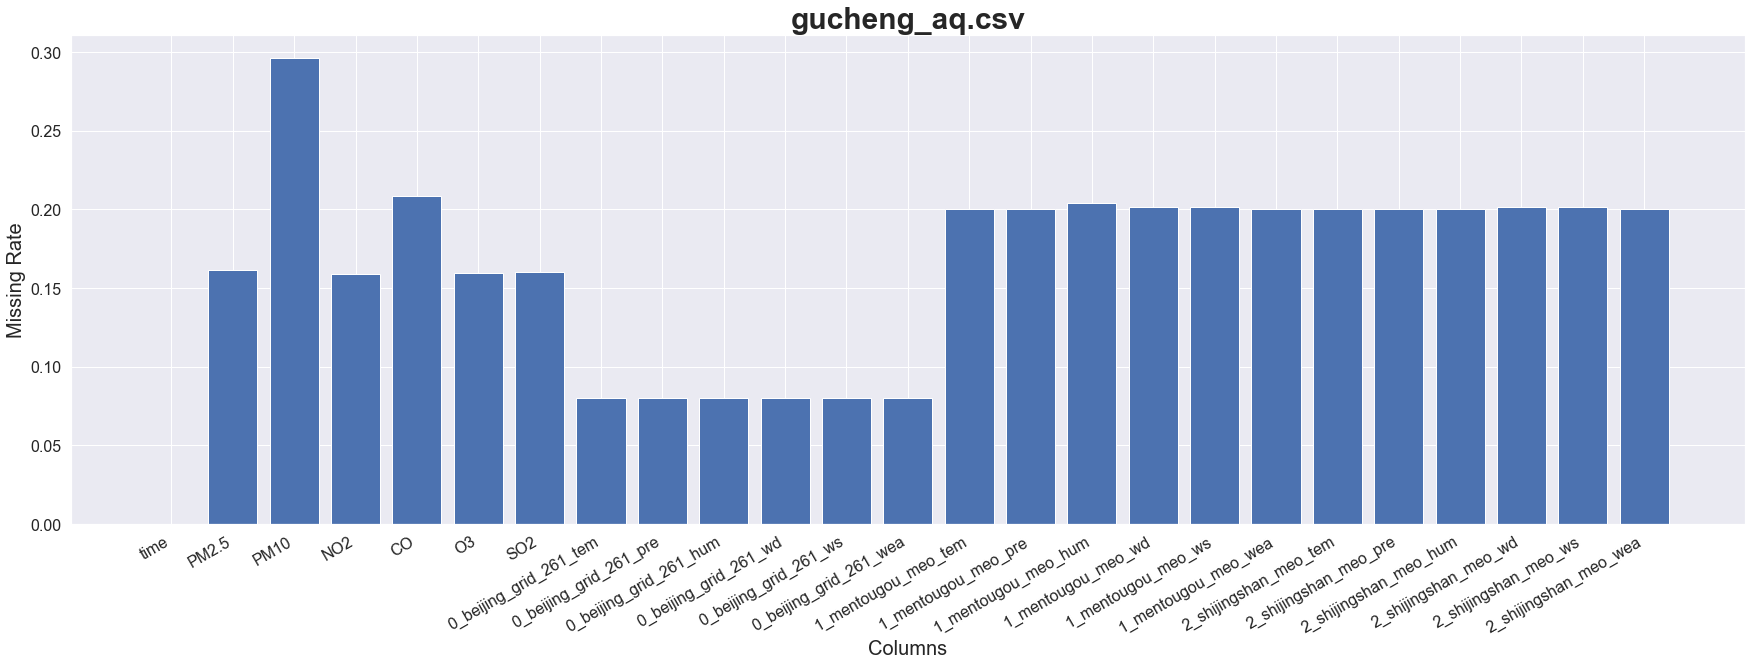

============== gucheng_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_261_tem     True
0_beijing_grid_261_pre     True
0_beijing_grid_261_hum     True
0_beijing_grid_261_wd      True
0_beijing_grid_261_ws      True
0_beijing_grid_261_wea     True
1_mentougou_meo_tem        True
1_mentougou_meo_pre        True
1_mentougou_meo_hum        True
1_mentougou_meo_wd         True
1_mentougou_meo_ws         True
1_mentougou_meo_wea        True
2_shijingshan_meo_tem      True
2_shijingshan_meo_pre      True
2_shijingshan_meo_hum      True
2_shijingshan_meo_wd       True
2_shijingshan_meo_ws       True
2_shijingshan_meo_wea      True
dtype: bool


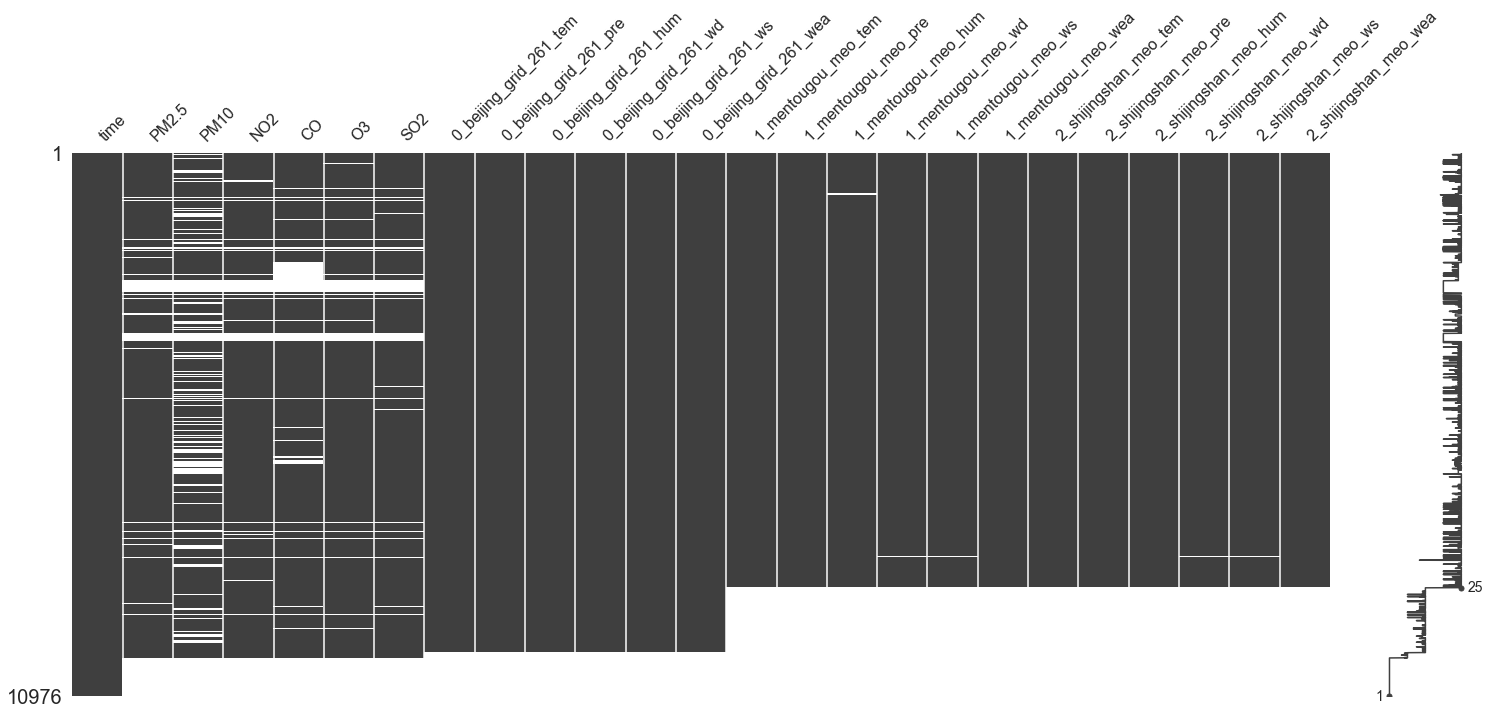

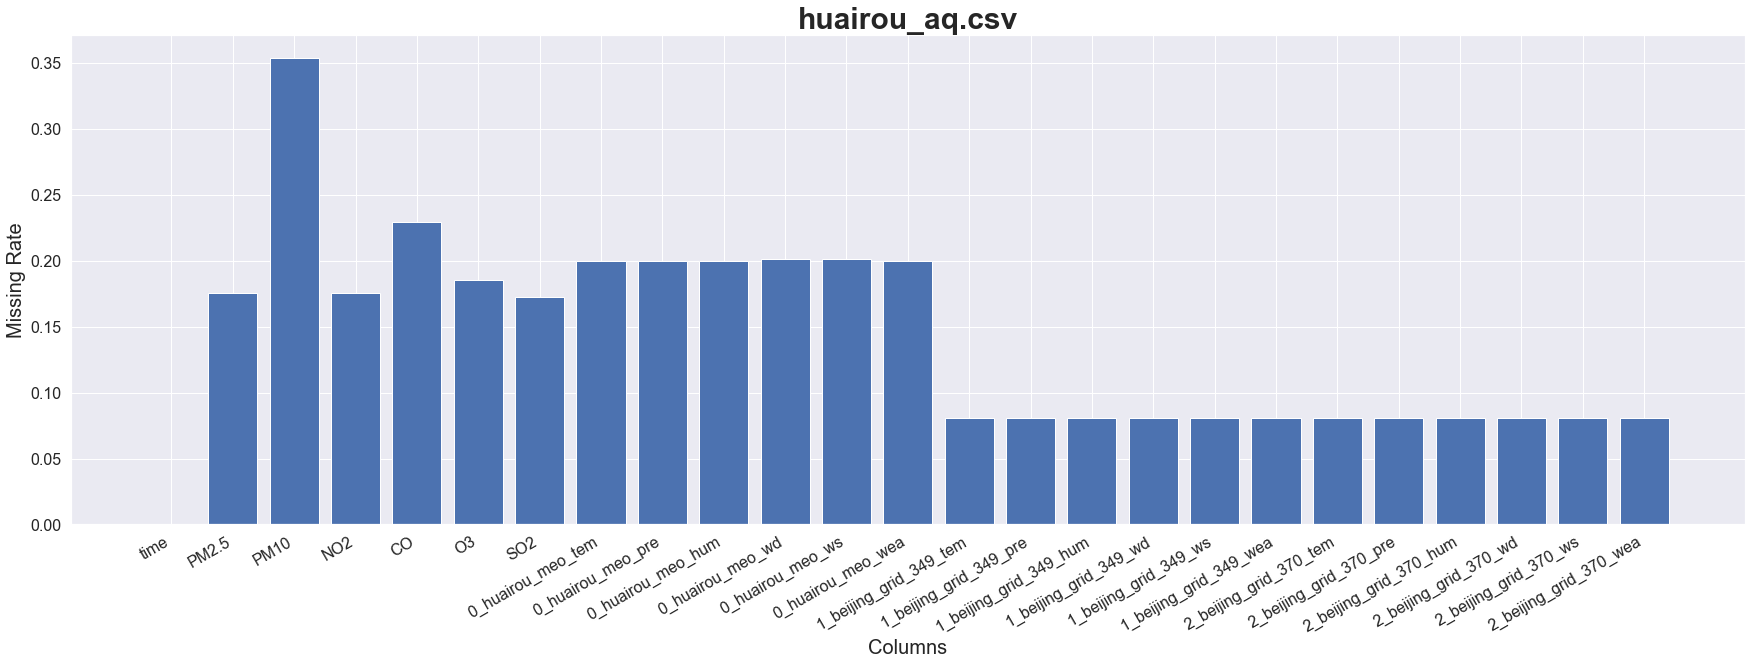

============== huairou_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_huairou_meo_tem          True
0_huairou_meo_pre          True
0_huairou_meo_hum          True
0_huairou_meo_wd           True
0_huairou_meo_ws           True
0_huairou_meo_wea          True
1_beijing_grid_349_tem     True
1_beijing_grid_349_pre     True
1_beijing_grid_349_hum     True
1_beijing_grid_349_wd      True
1_beijing_grid_349_ws      True
1_beijing_grid_349_wea     True
2_beijing_grid_370_tem     True
2_beijing_grid_370_pre     True
2_beijing_grid_370_hum     True
2_beijing_grid_370_wd      True
2_beijing_grid_370_ws      True
2_beijing_grid_370_wea     True
dtype: bool


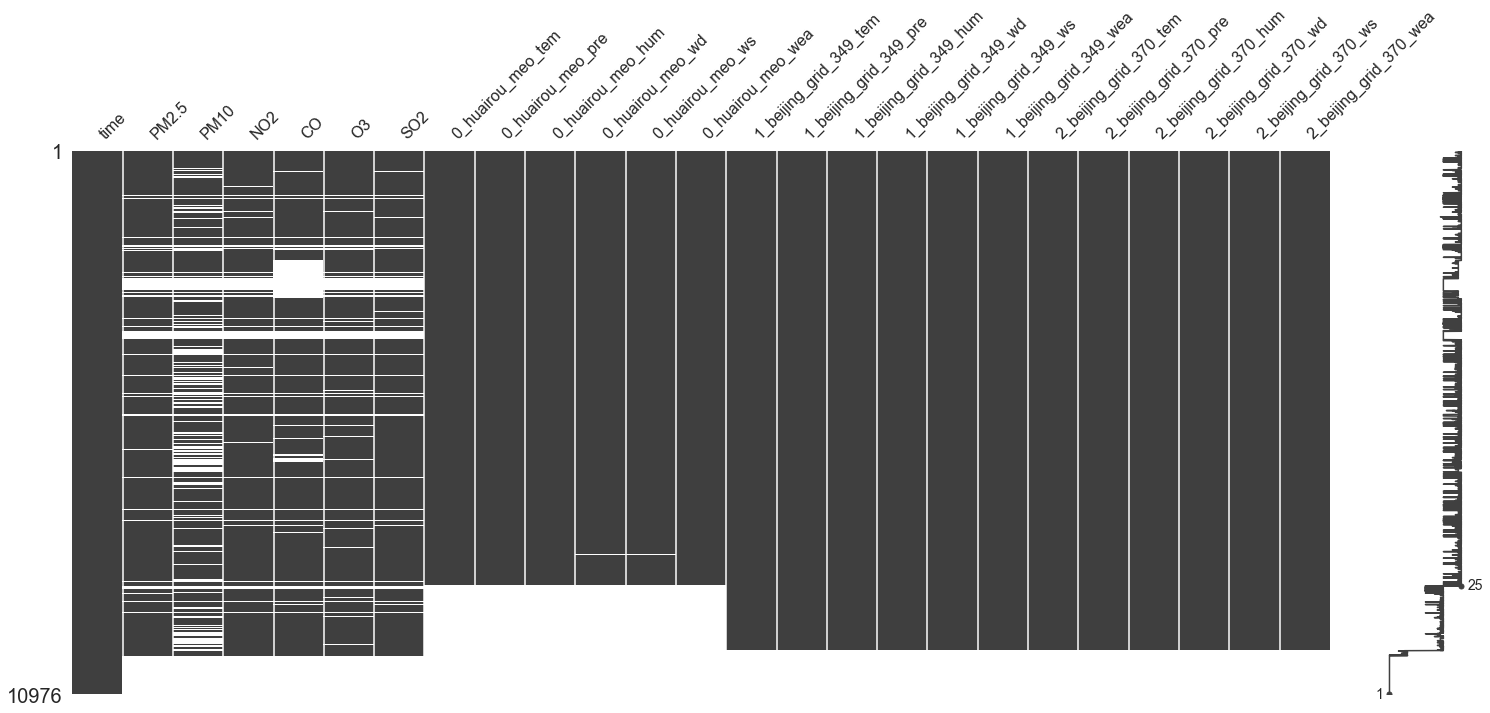

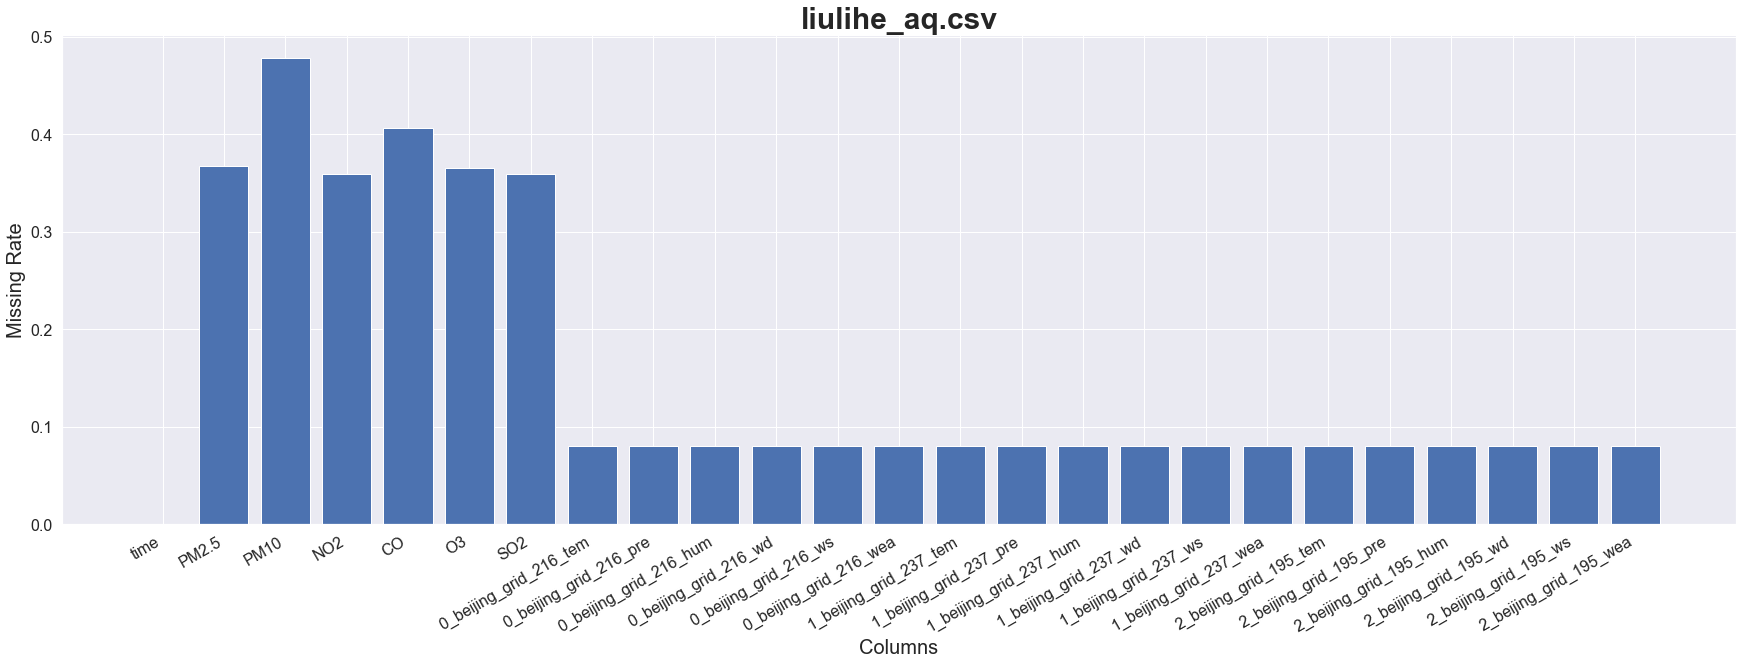

============== liulihe_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_216_tem     True
0_beijing_grid_216_pre     True
0_beijing_grid_216_hum     True
0_beijing_grid_216_wd      True
0_beijing_grid_216_ws      True
0_beijing_grid_216_wea     True
1_beijing_grid_237_tem     True
1_beijing_grid_237_pre     True
1_beijing_grid_237_hum     True
1_beijing_grid_237_wd      True
1_beijing_grid_237_ws      True
1_beijing_grid_237_wea     True
2_beijing_grid_195_tem     True
2_beijing_grid_195_pre     True
2_beijing_grid_195_hum     True
2_beijing_grid_195_wd      True
2_beijing_grid_195_ws      True
2_beijing_grid_195_wea     True
dtype: bool


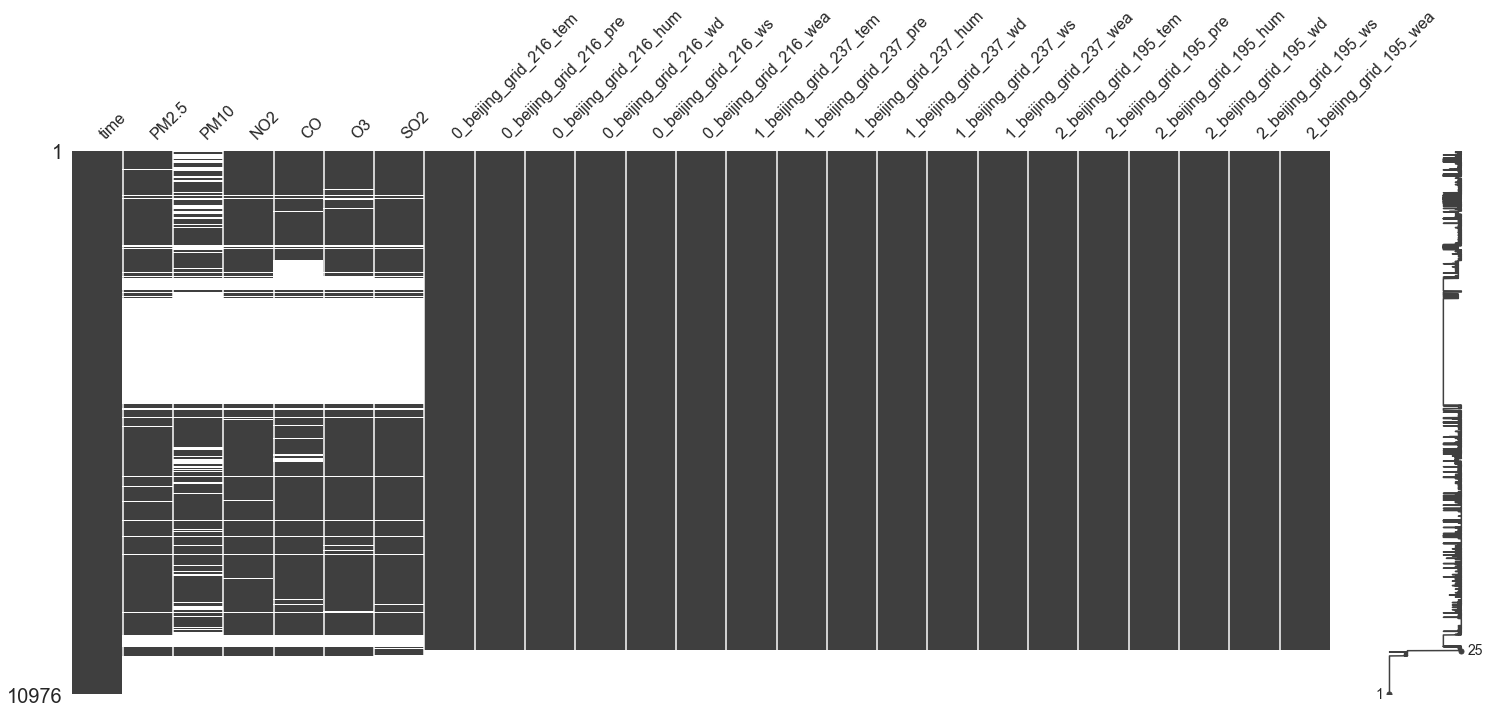

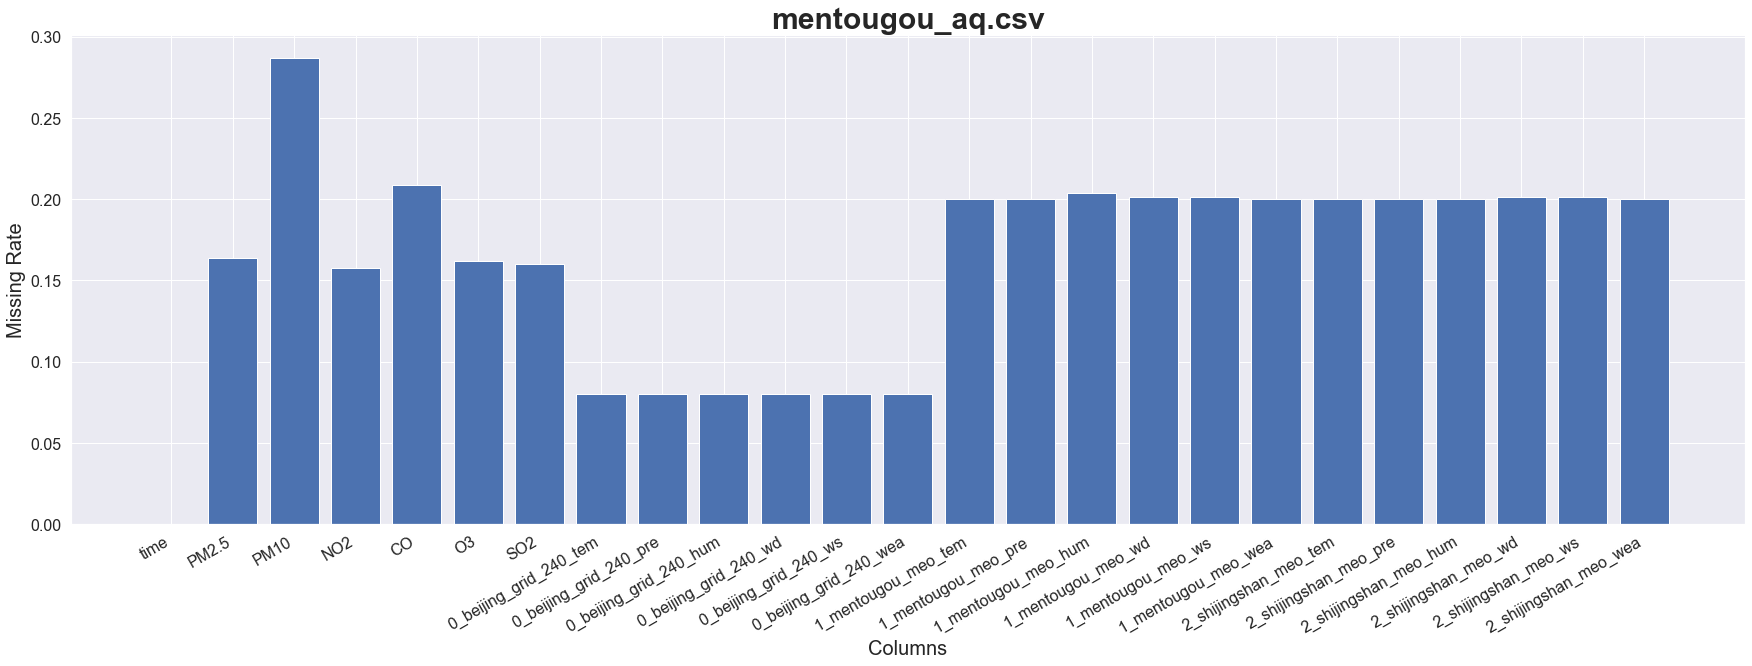

============== mentougou_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_240_tem     True
0_beijing_grid_240_pre     True
0_beijing_grid_240_hum     True
0_beijing_grid_240_wd      True
0_beijing_grid_240_ws      True
0_beijing_grid_240_wea     True
1_mentougou_meo_tem        True
1_mentougou_meo_pre        True
1_mentougou_meo_hum        True
1_mentougou_meo_wd         True
1_mentougou_meo_ws         True
1_mentougou_meo_wea        True
2_shijingshan_meo_tem      True
2_shijingshan_meo_pre      True
2_shijingshan_meo_hum      True
2_shijingshan_meo_wd       True
2_shijingshan_meo_ws       True
2_shijingshan_meo_wea      True
dtype: bool


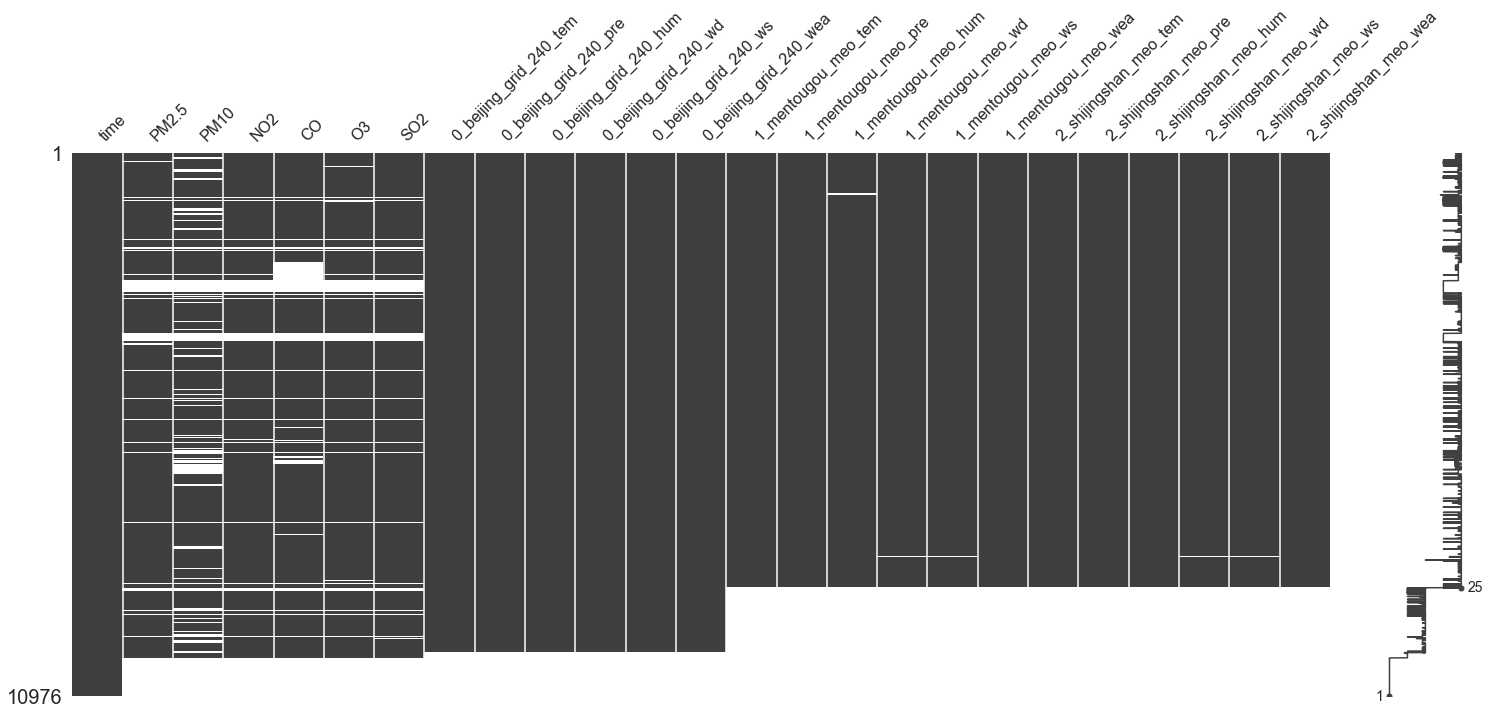

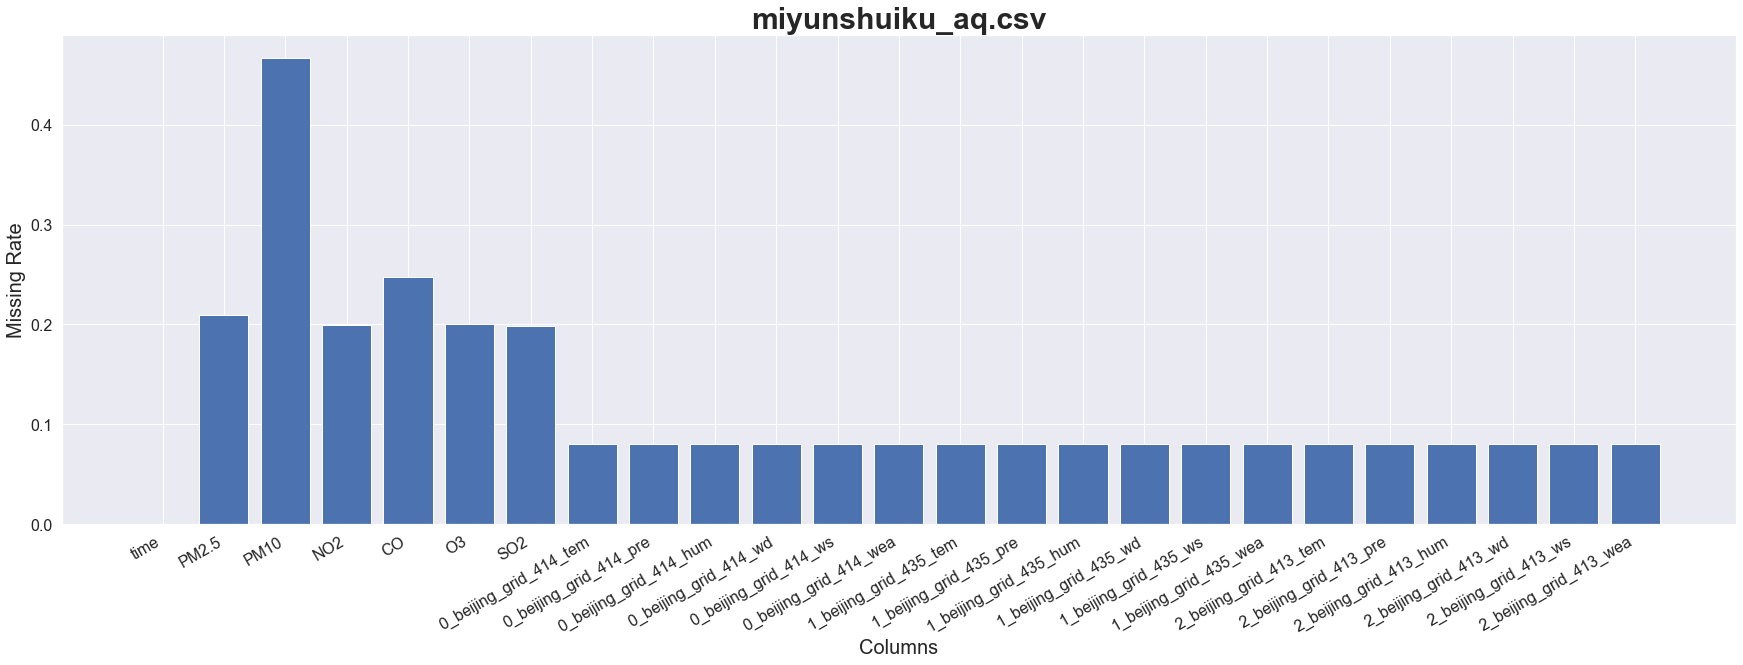

============== miyunshuiku_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_414_tem     True
0_beijing_grid_414_pre     True
0_beijing_grid_414_hum     True
0_beijing_grid_414_wd      True
0_beijing_grid_414_ws      True
0_beijing_grid_414_wea     True
1_beijing_grid_435_tem     True
1_beijing_grid_435_pre     True
1_beijing_grid_435_hum     True
1_beijing_grid_435_wd      True
1_beijing_grid_435_ws      True
1_beijing_grid_435_wea     True
2_beijing_grid_413_tem     True
2_beijing_grid_413_pre     True
2_beijing_grid_413_hum     True
2_beijing_grid_413_wd      True
2_beijing_grid_413_ws      True
2_beijing_grid_413_wea     True
dtype: bool


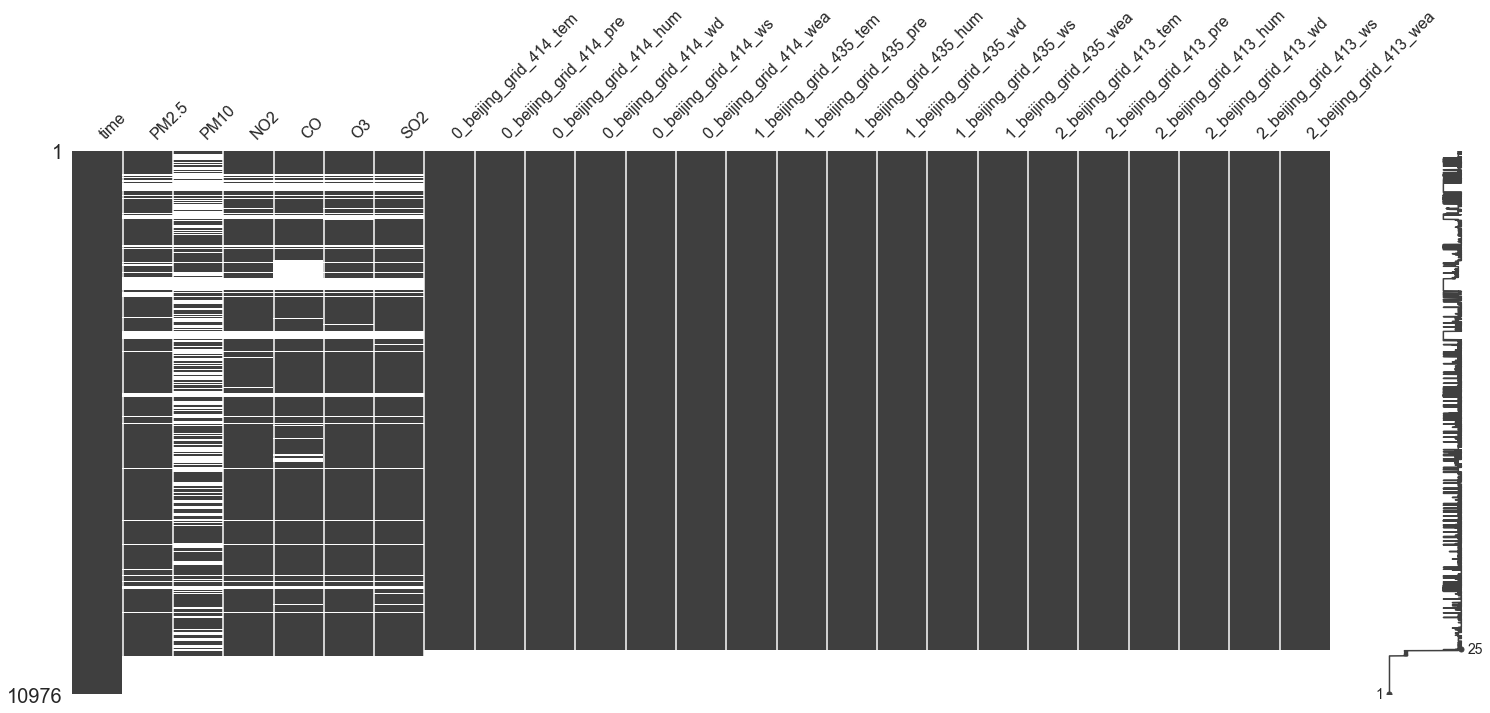

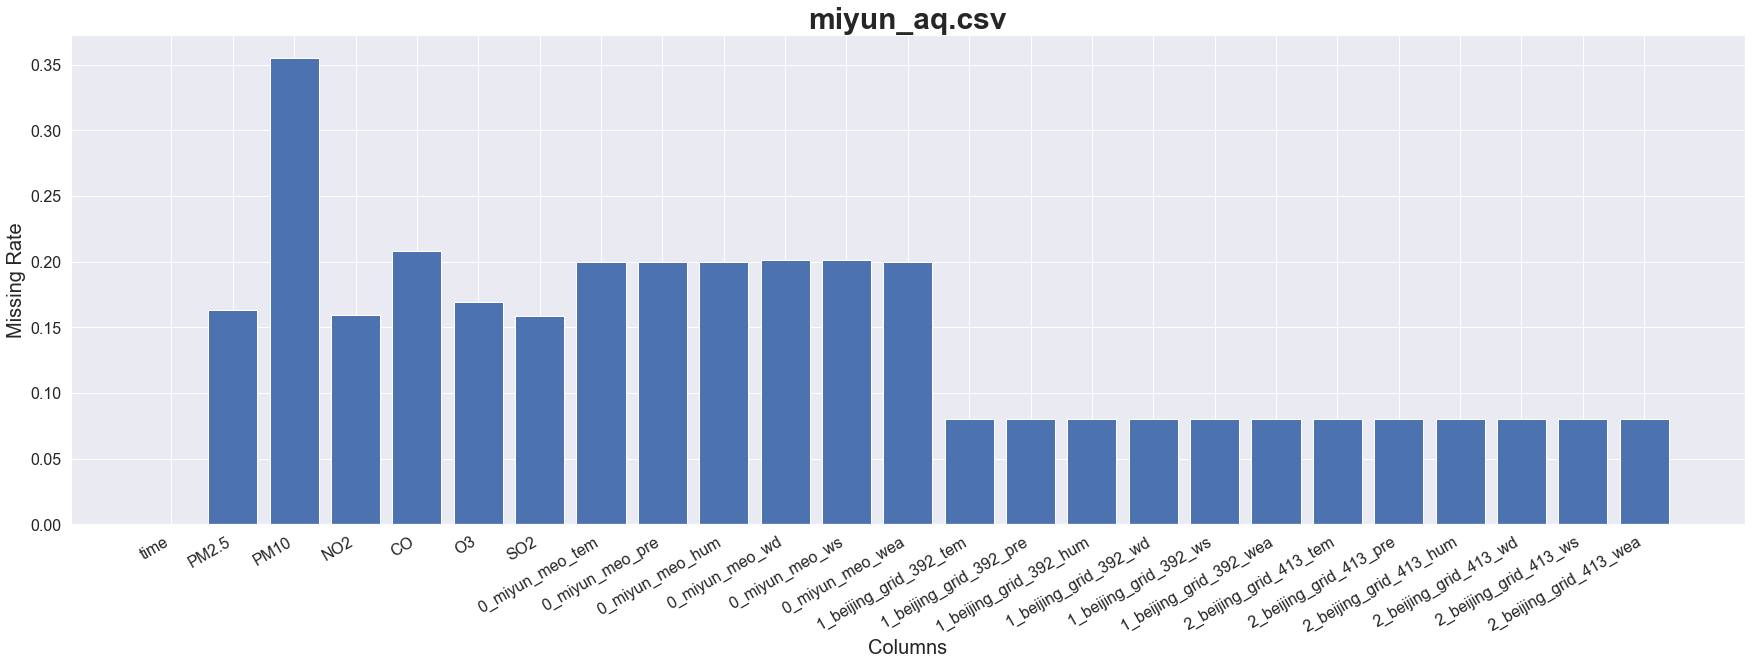

============== miyun_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_miyun_meo_tem            True
0_miyun_meo_pre            True
0_miyun_meo_hum            True
0_miyun_meo_wd             True
0_miyun_meo_ws             True
0_miyun_meo_wea            True
1_beijing_grid_392_tem     True
1_beijing_grid_392_pre     True
1_beijing_grid_392_hum     True
1_beijing_grid_392_wd      True
1_beijing_grid_392_ws      True
1_beijing_grid_392_wea     True
2_beijing_grid_413_tem     True
2_beijing_grid_413_pre     True
2_beijing_grid_413_hum     True
2_beijing_grid_413_wd      True
2_beijing_grid_413_ws      True
2_beijing_grid_413_wea     True
dtype: bool


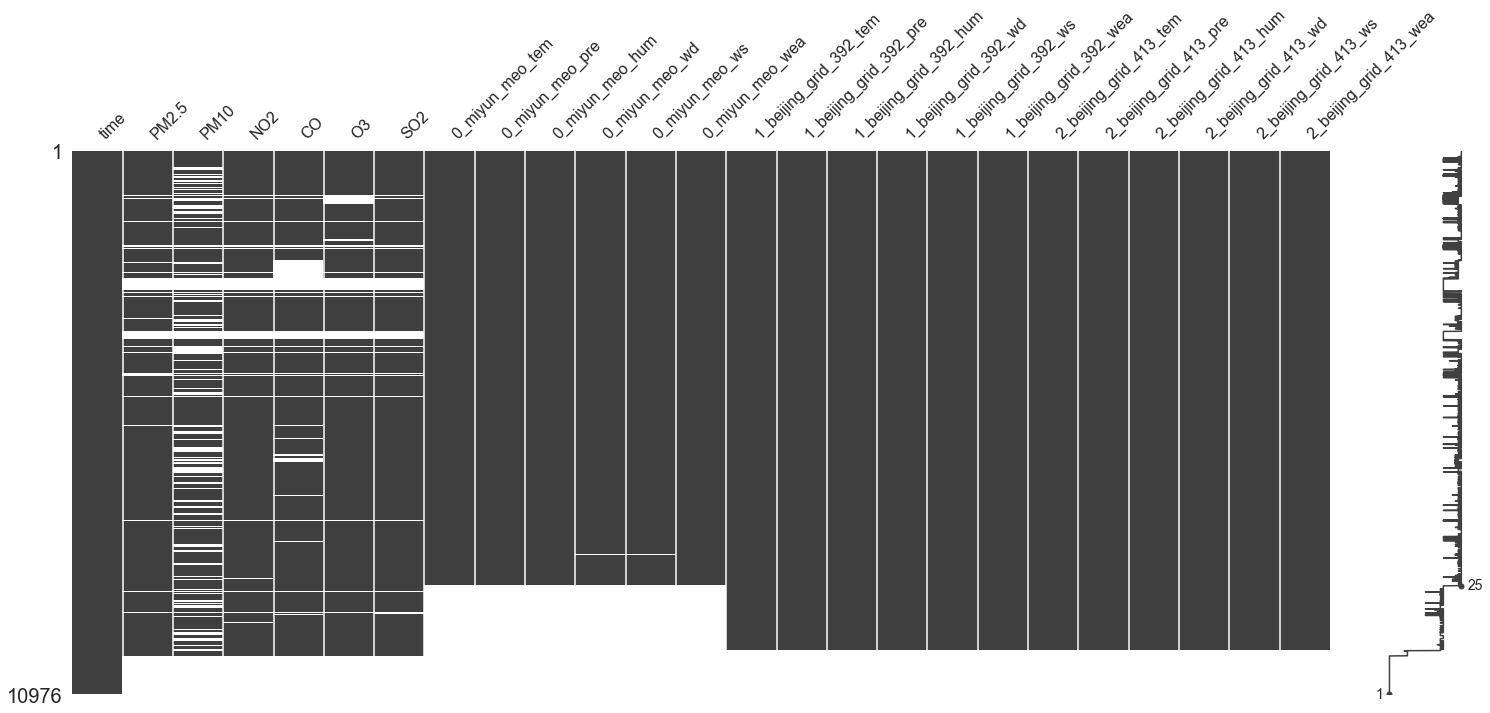

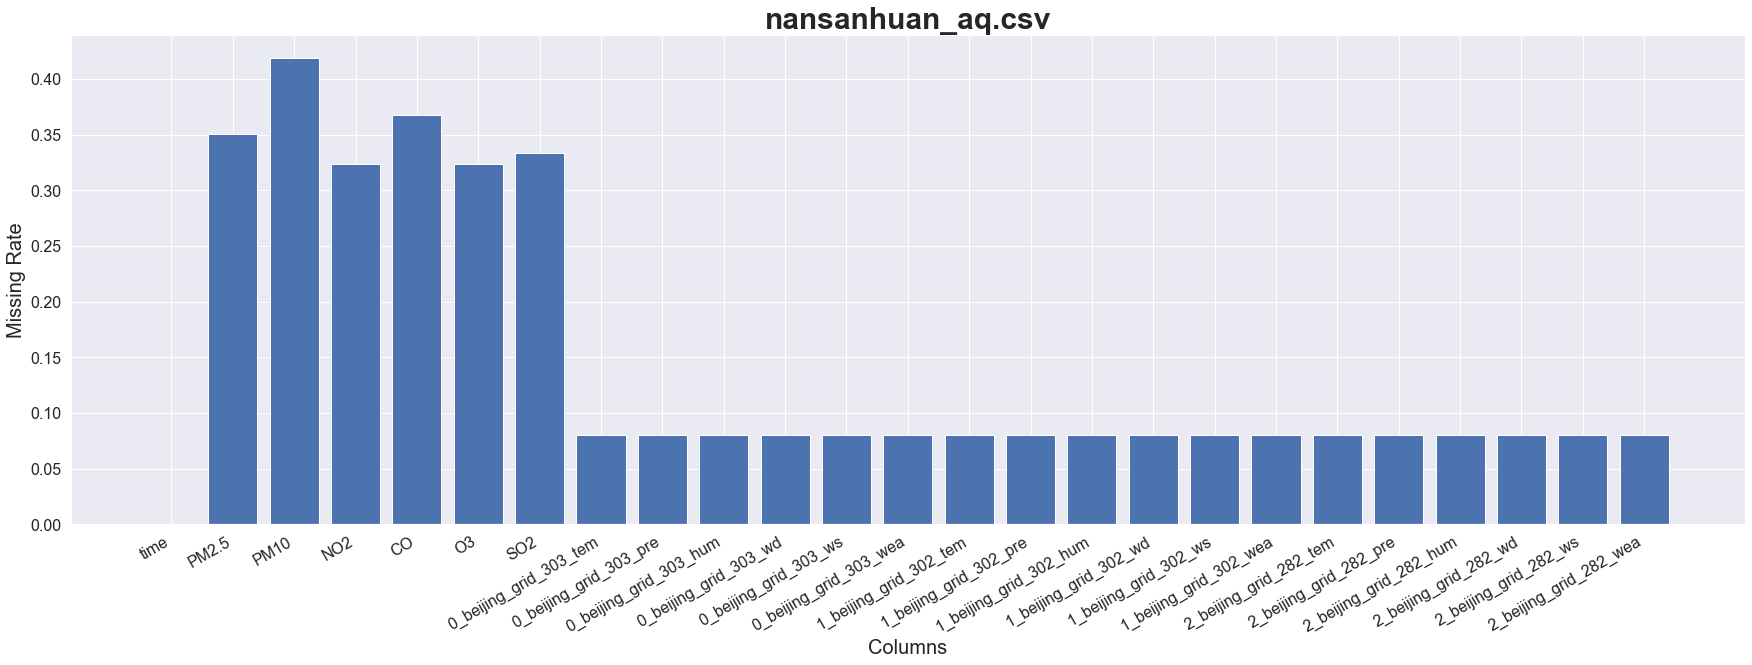

============== nansanhuan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_beijing_grid_302_tem     True
1_beijing_grid_302_pre     True
1_beijing_grid_302_hum     True
1_beijing_grid_302_wd      True
1_beijing_grid_302_ws      True
1_beijing_grid_302_wea     True
2_beijing_grid_282_tem     True
2_beijing_grid_282_pre     True
2_beijing_grid_282_hum     True
2_beijing_grid_282_wd      True
2_beijing_grid_282_ws      True
2_beijing_grid_282_wea     True
dtype: bool


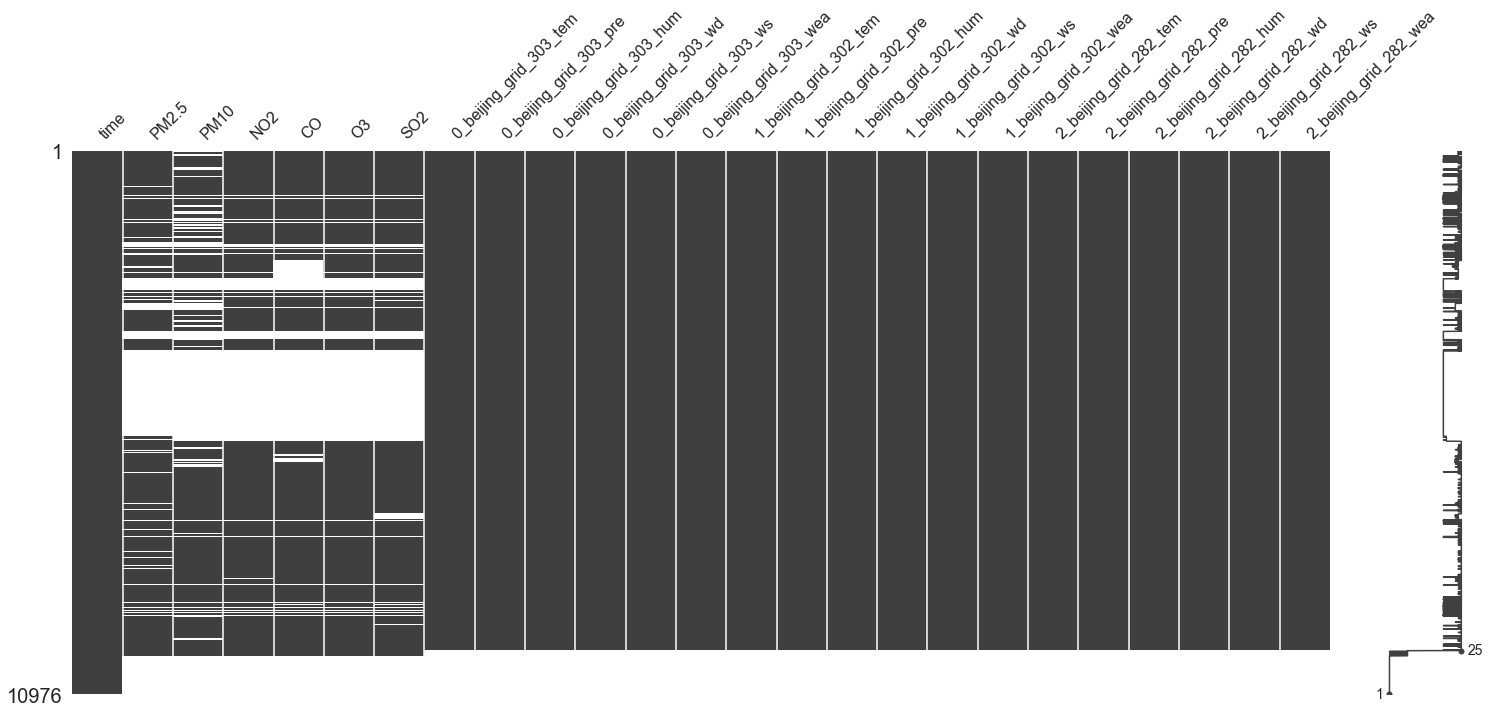

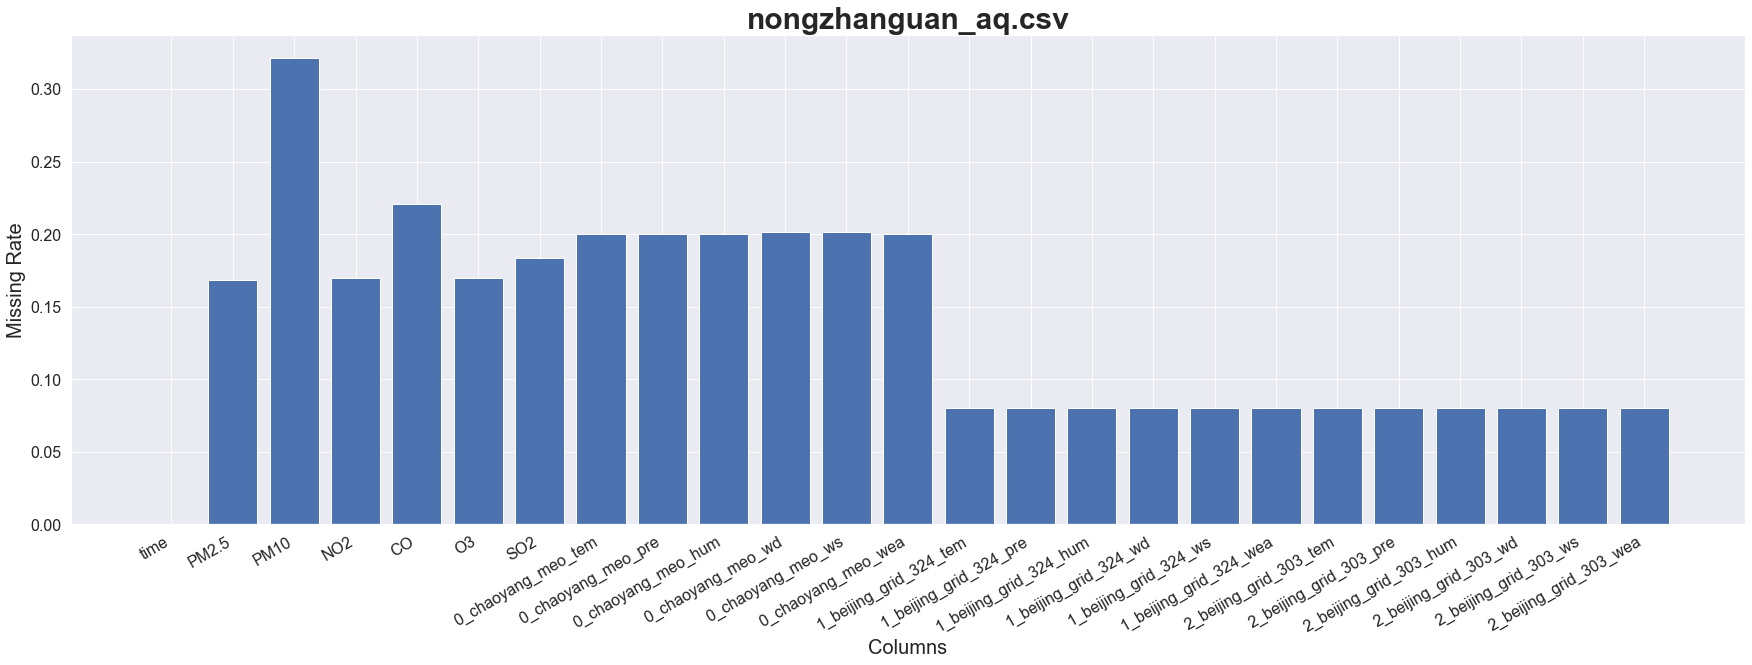

============== nongzhanguan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_chaoyang_meo_tem         True
0_chaoyang_meo_pre         True
0_chaoyang_meo_hum         True
0_chaoyang_meo_wd          True
0_chaoyang_meo_ws          True
0_chaoyang_meo_wea         True
1_beijing_grid_324_tem     True
1_beijing_grid_324_pre     True
1_beijing_grid_324_hum     True
1_beijing_grid_324_wd      True
1_beijing_grid_324_ws      True
1_beijing_grid_324_wea     True
2_beijing_grid_303_tem     True
2_beijing_grid_303_pre     True
2_beijing_grid_303_hum     True
2_beijing_grid_303_wd      True
2_beijing_grid_303_ws      True
2_beijing_grid_303_wea     True
dtype: bool


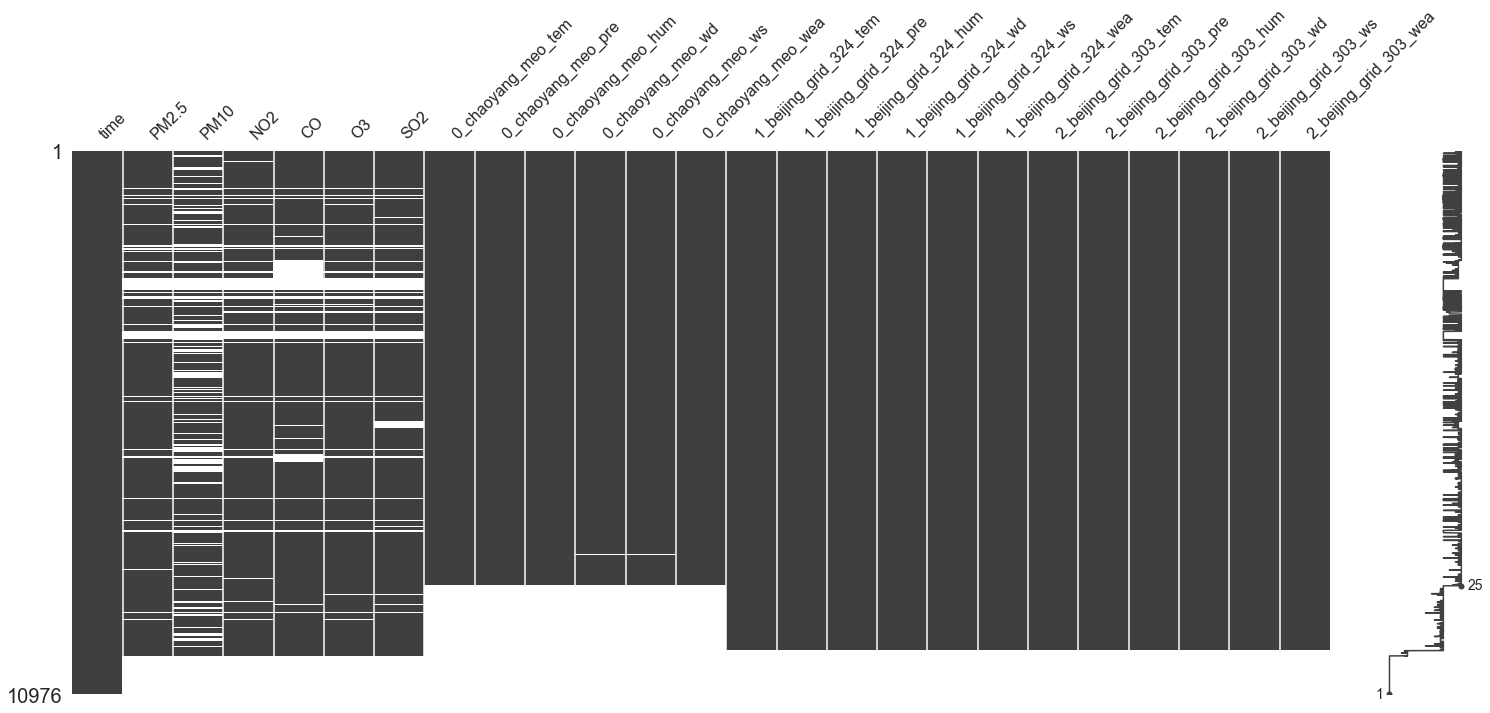

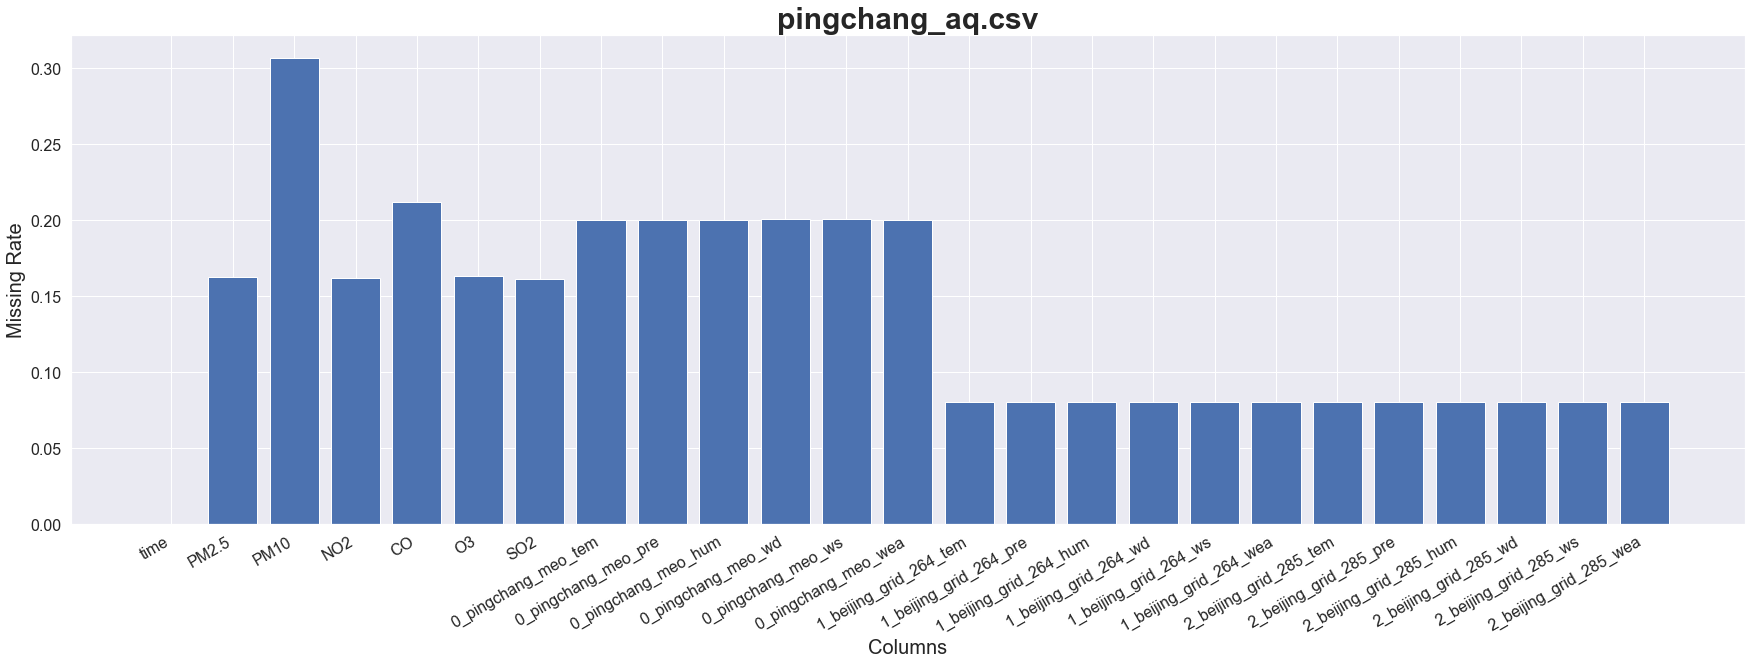

============== pingchang_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_pingchang_meo_tem        True
0_pingchang_meo_pre        True
0_pingchang_meo_hum        True
0_pingchang_meo_wd         True
0_pingchang_meo_ws         True
0_pingchang_meo_wea        True
1_beijing_grid_264_tem     True
1_beijing_grid_264_pre     True
1_beijing_grid_264_hum     True
1_beijing_grid_264_wd      True
1_beijing_grid_264_ws      True
1_beijing_grid_264_wea     True
2_beijing_grid_285_tem     True
2_beijing_grid_285_pre     True
2_beijing_grid_285_hum     True
2_beijing_grid_285_wd      True
2_beijing_grid_285_ws      True
2_beijing_grid_285_wea     True
dtype: bool


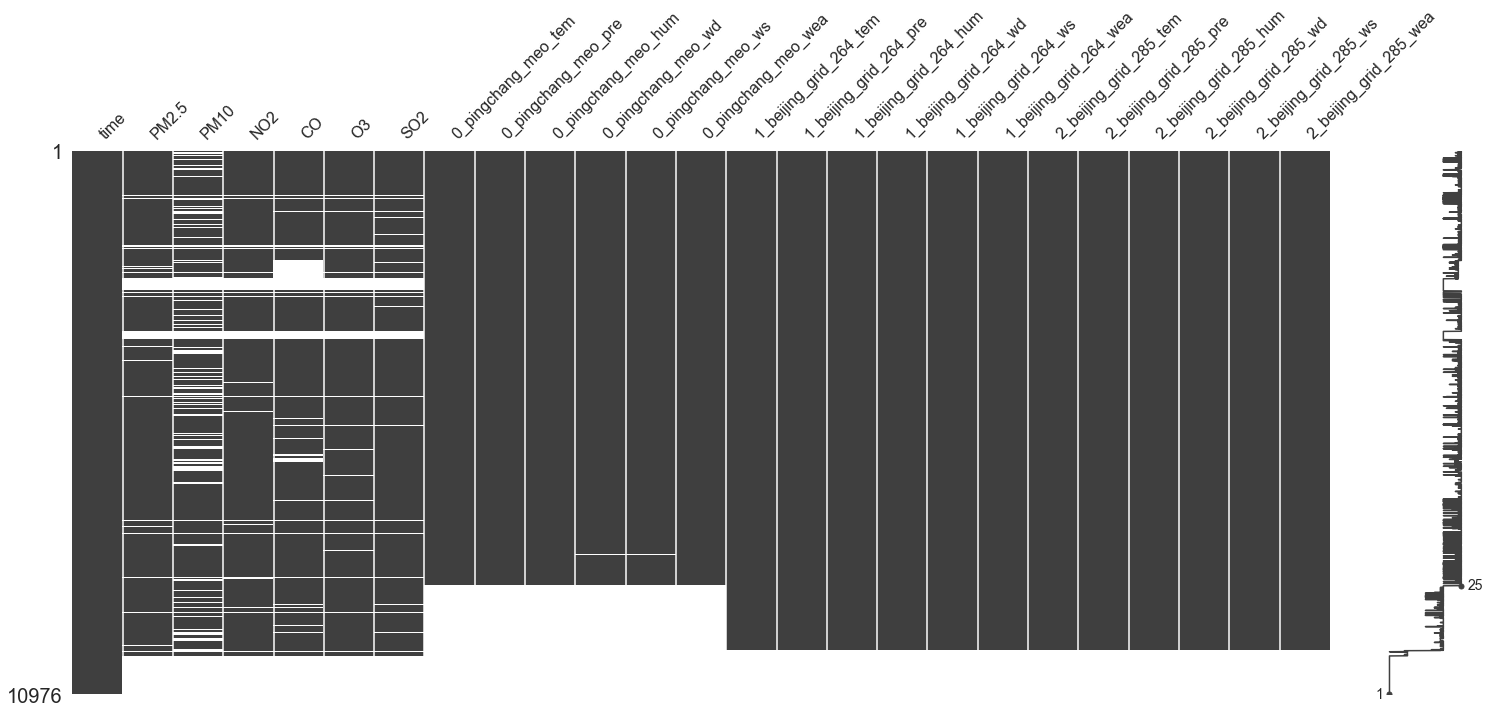

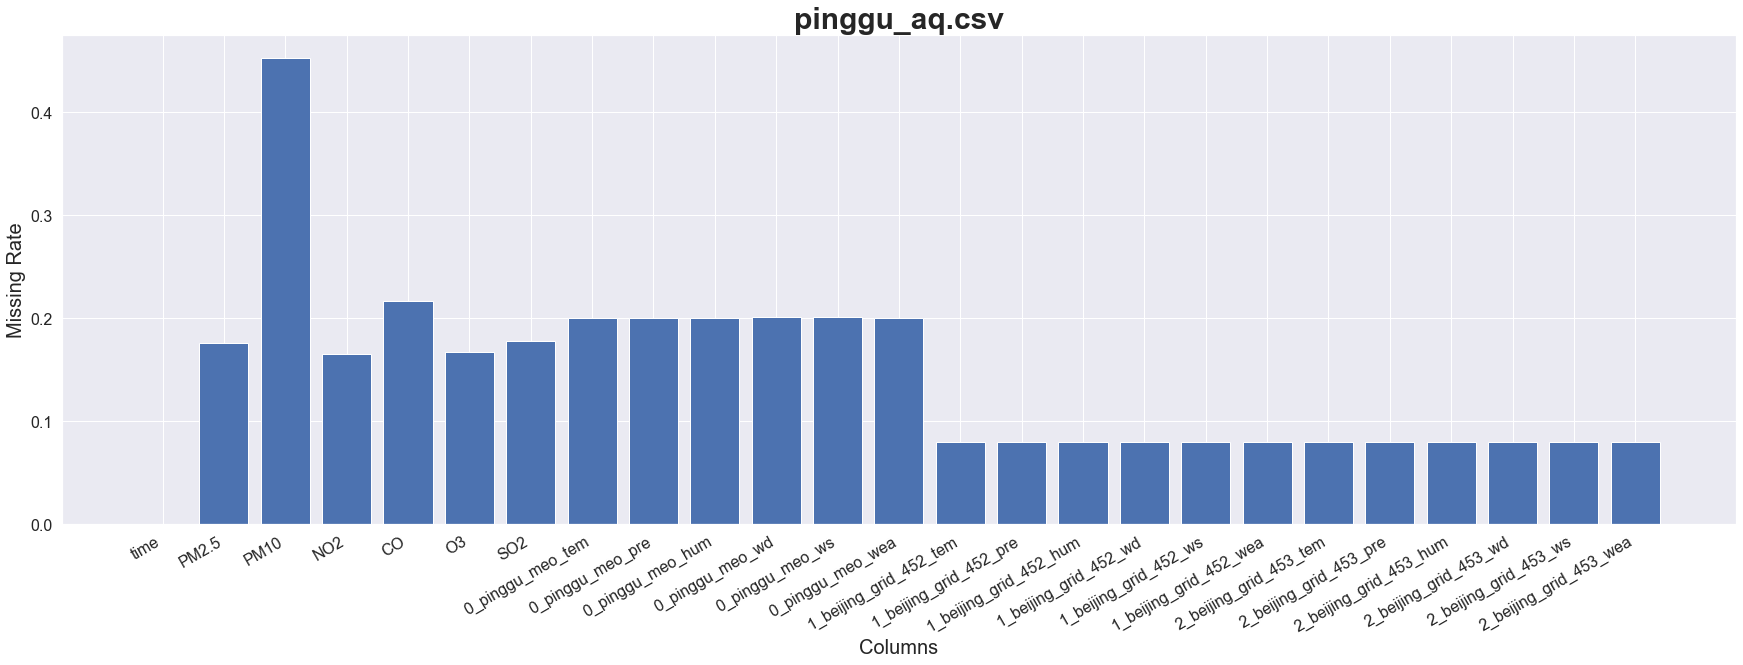

============== pinggu_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_pinggu_meo_tem           True
0_pinggu_meo_pre           True
0_pinggu_meo_hum           True
0_pinggu_meo_wd            True
0_pinggu_meo_ws            True
0_pinggu_meo_wea           True
1_beijing_grid_452_tem     True
1_beijing_grid_452_pre     True
1_beijing_grid_452_hum     True
1_beijing_grid_452_wd      True
1_beijing_grid_452_ws      True
1_beijing_grid_452_wea     True
2_beijing_grid_453_tem     True
2_beijing_grid_453_pre     True
2_beijing_grid_453_hum     True
2_beijing_grid_453_wd      True
2_beijing_grid_453_ws      True
2_beijing_grid_453_wea     True
dtype: bool


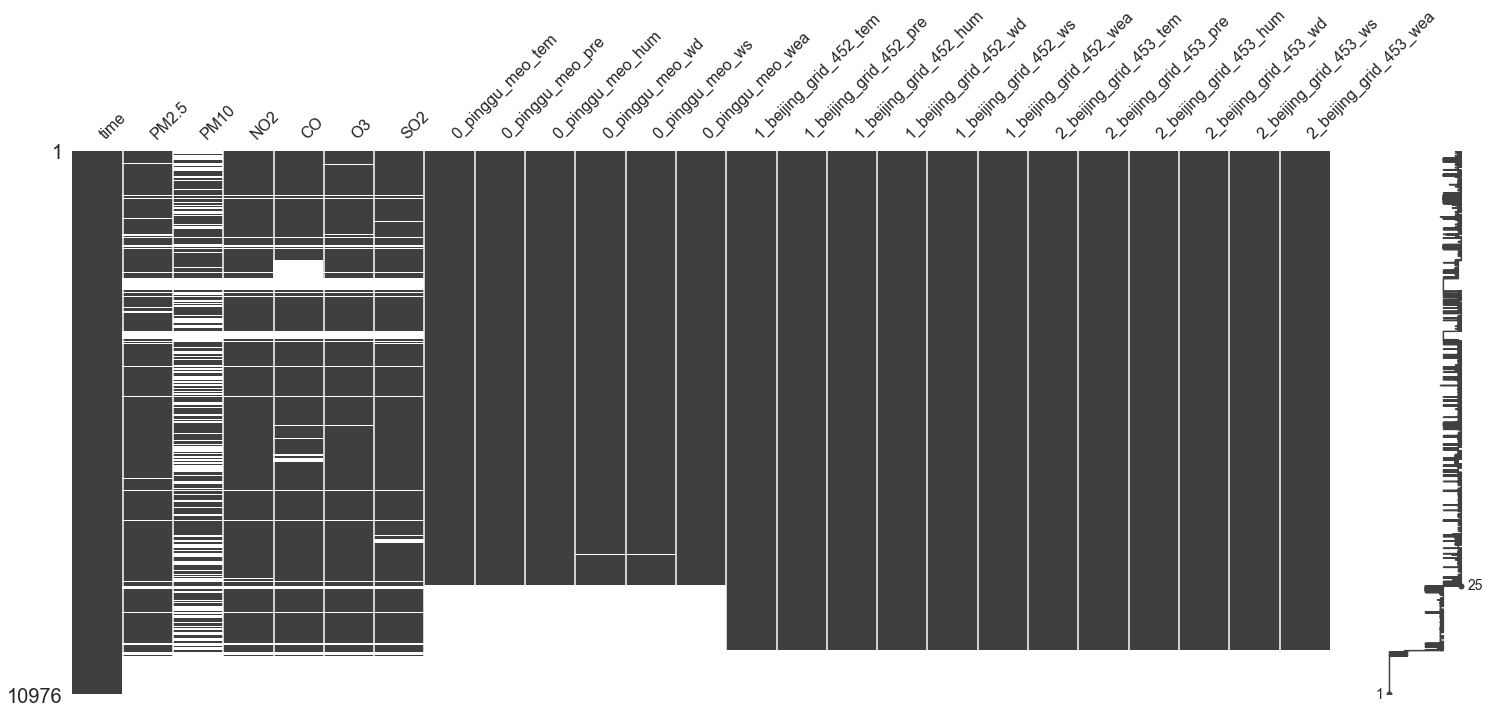

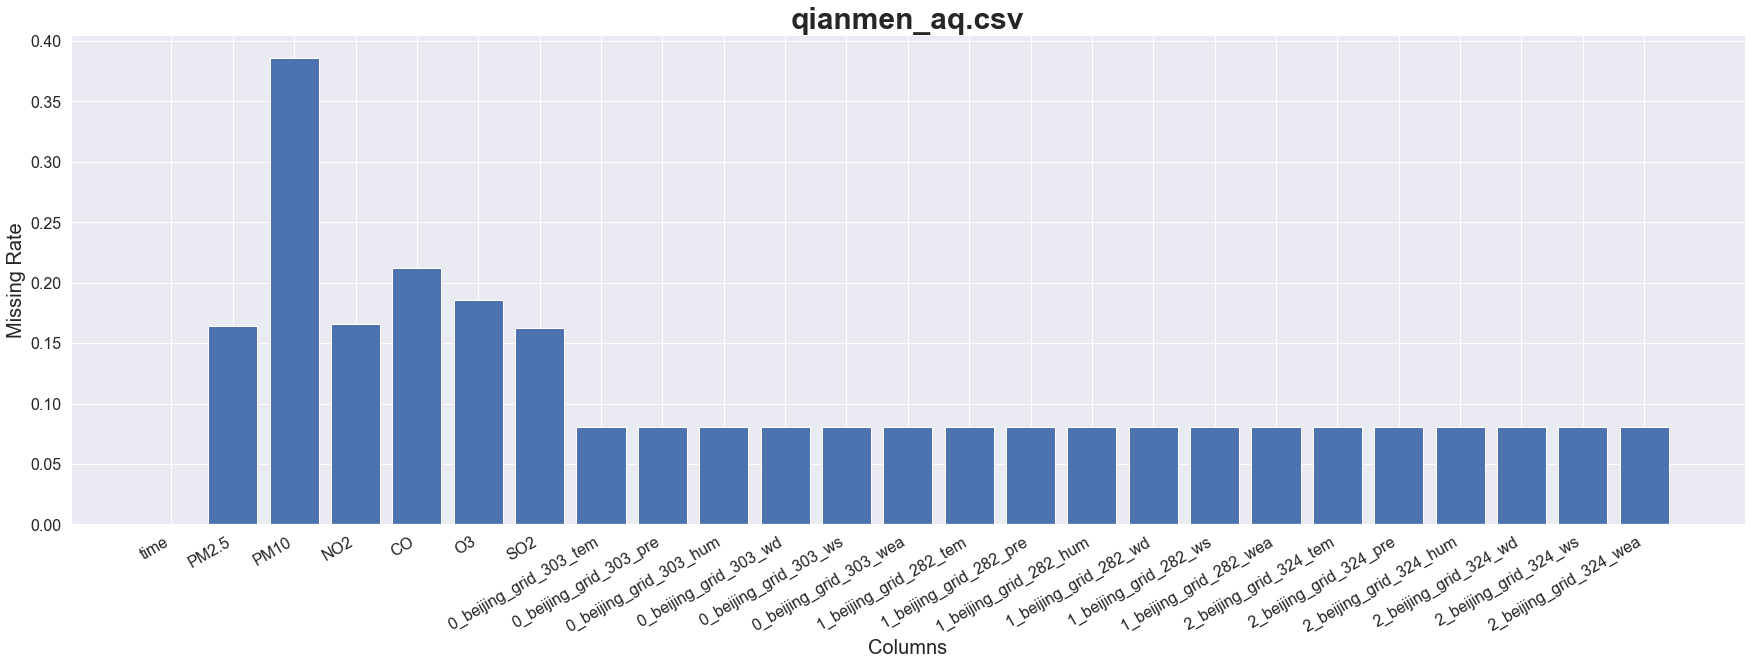

============== qianmen_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_beijing_grid_282_tem     True
1_beijing_grid_282_pre     True
1_beijing_grid_282_hum     True
1_beijing_grid_282_wd      True
1_beijing_grid_282_ws      True
1_beijing_grid_282_wea     True
2_beijing_grid_324_tem     True
2_beijing_grid_324_pre     True
2_beijing_grid_324_hum     True
2_beijing_grid_324_wd      True
2_beijing_grid_324_ws      True
2_beijing_grid_324_wea     True
dtype: bool


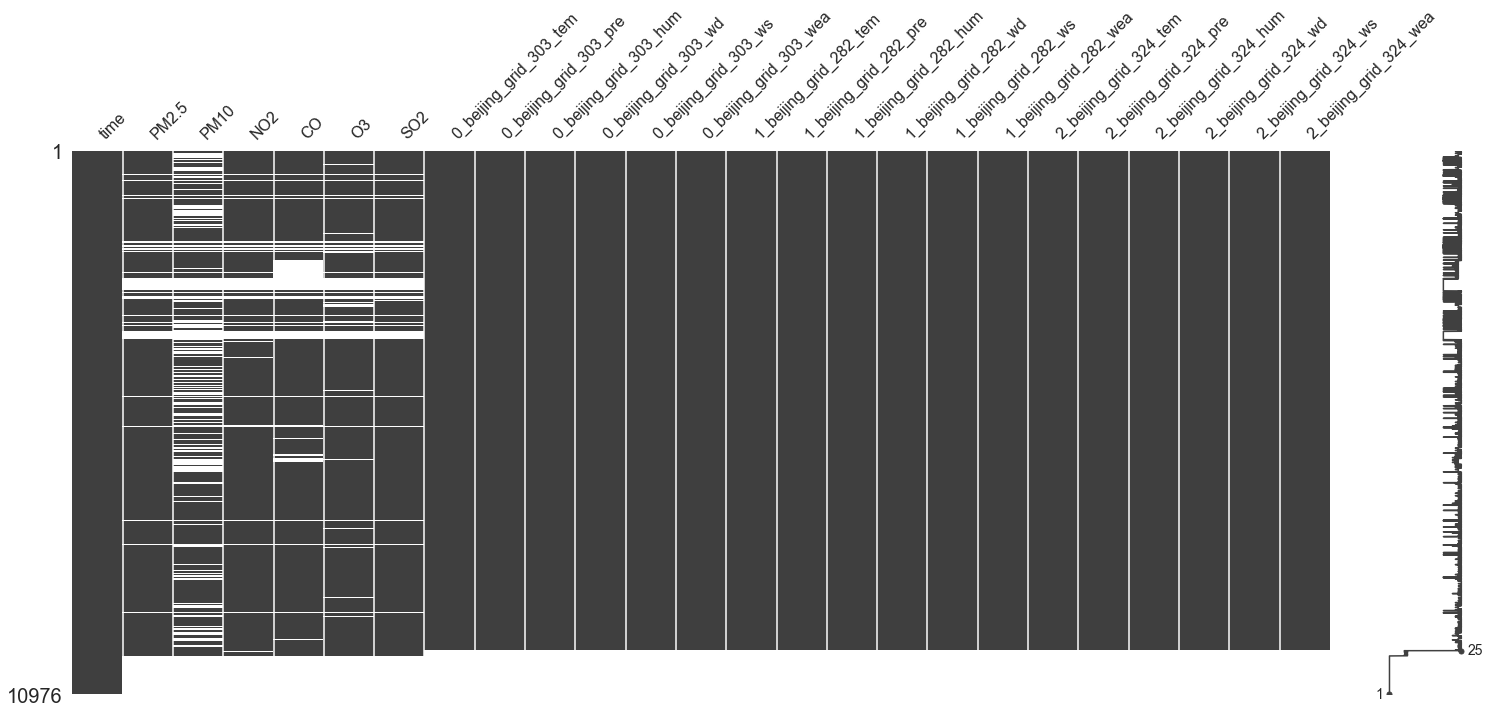

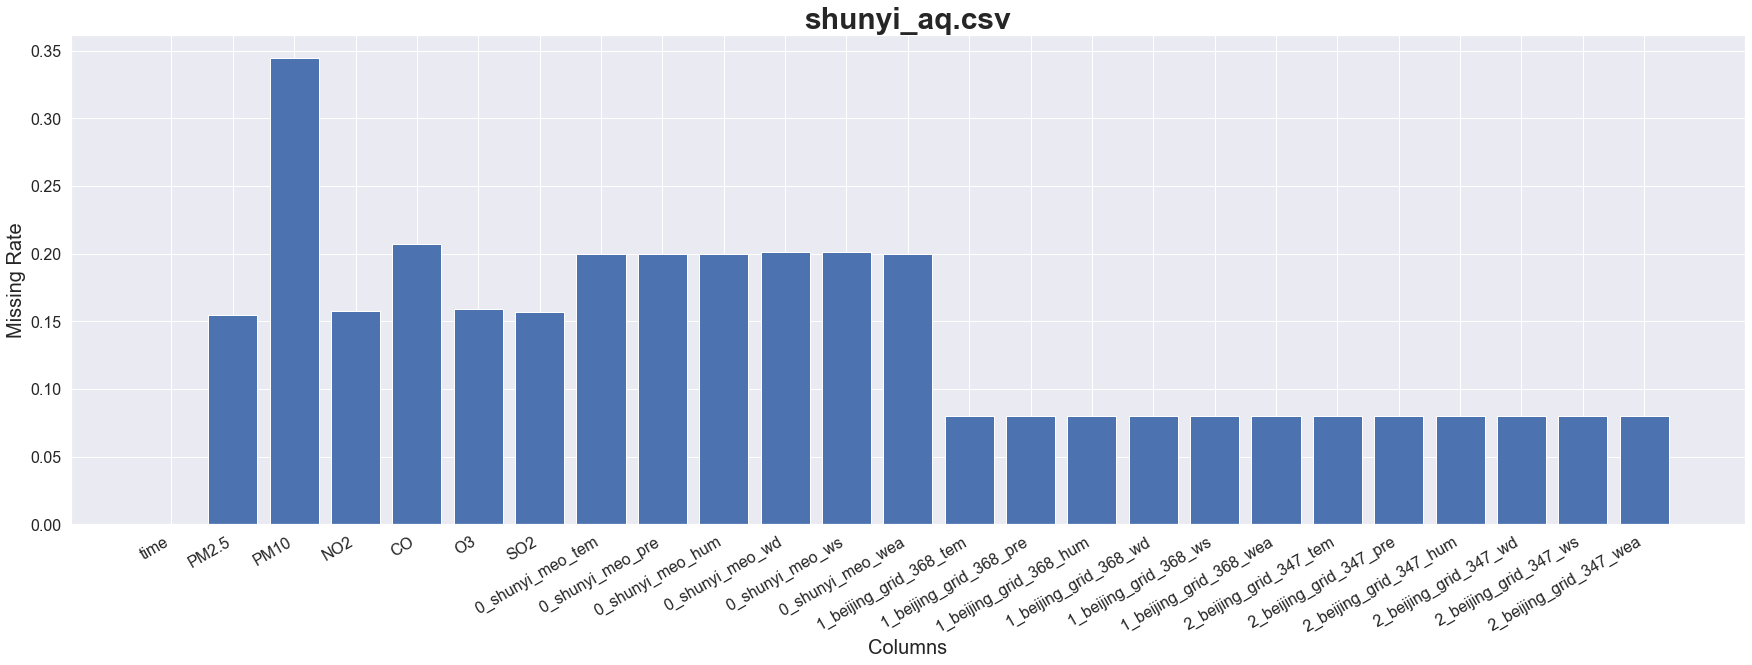

============== shunyi_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_shunyi_meo_tem           True
0_shunyi_meo_pre           True
0_shunyi_meo_hum           True
0_shunyi_meo_wd            True
0_shunyi_meo_ws            True
0_shunyi_meo_wea           True
1_beijing_grid_368_tem     True
1_beijing_grid_368_pre     True
1_beijing_grid_368_hum     True
1_beijing_grid_368_wd      True
1_beijing_grid_368_ws      True
1_beijing_grid_368_wea     True
2_beijing_grid_347_tem     True
2_beijing_grid_347_pre     True
2_beijing_grid_347_hum     True
2_beijing_grid_347_wd      True
2_beijing_grid_347_ws      True
2_beijing_grid_347_wea     True
dtype: bool


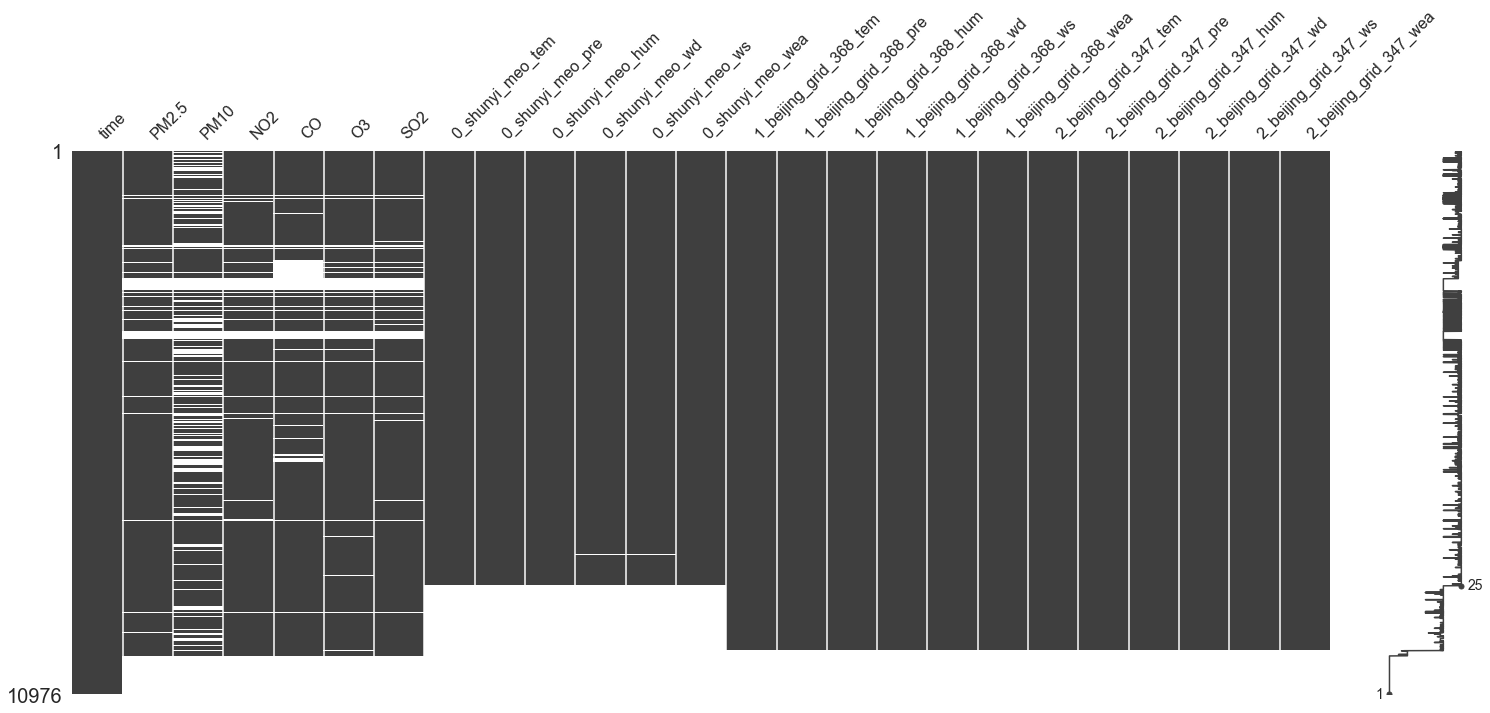

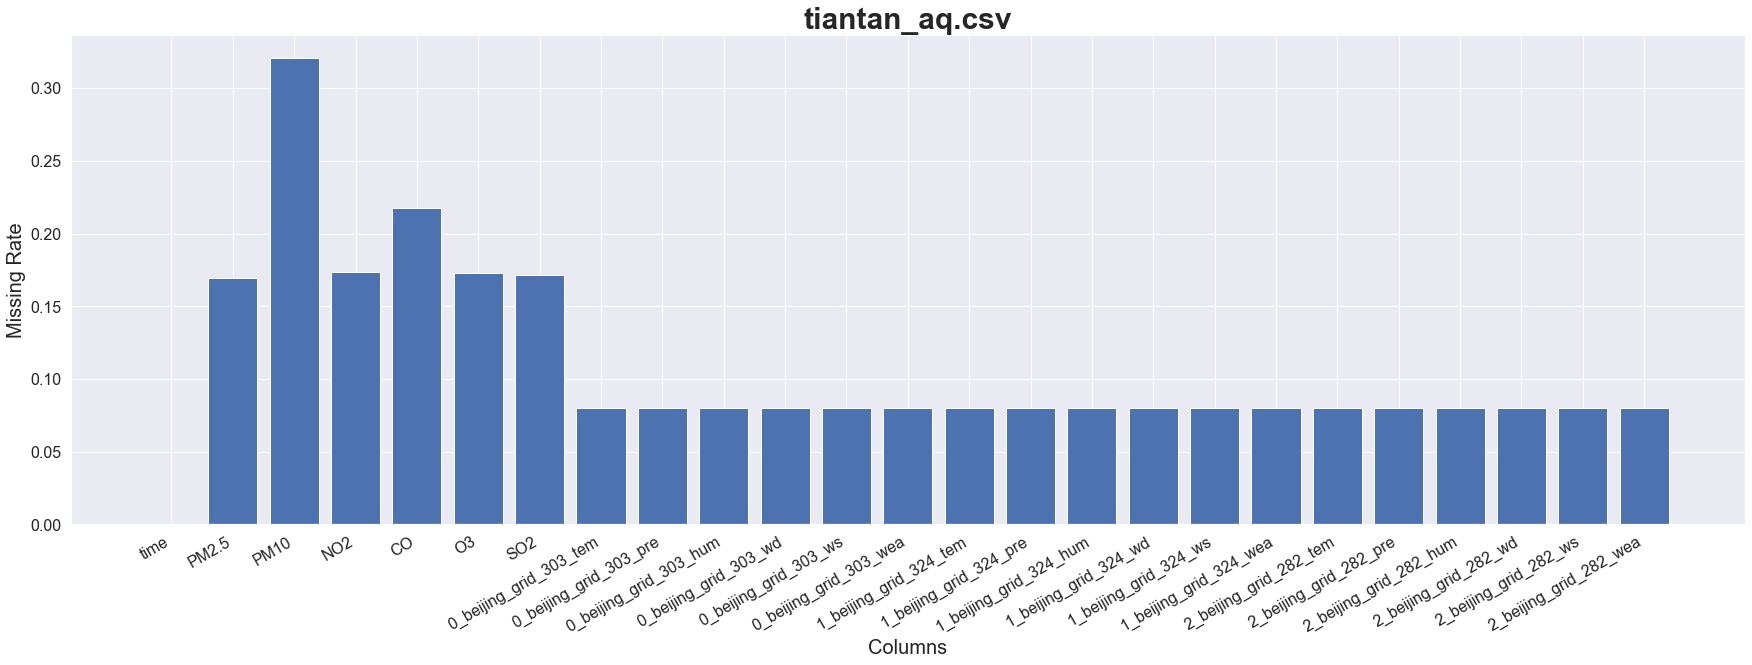

============== tiantan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_beijing_grid_324_tem     True
1_beijing_grid_324_pre     True
1_beijing_grid_324_hum     True
1_beijing_grid_324_wd      True
1_beijing_grid_324_ws      True
1_beijing_grid_324_wea     True
2_beijing_grid_282_tem     True
2_beijing_grid_282_pre     True
2_beijing_grid_282_hum     True
2_beijing_grid_282_wd      True
2_beijing_grid_282_ws      True
2_beijing_grid_282_wea     True
dtype: bool


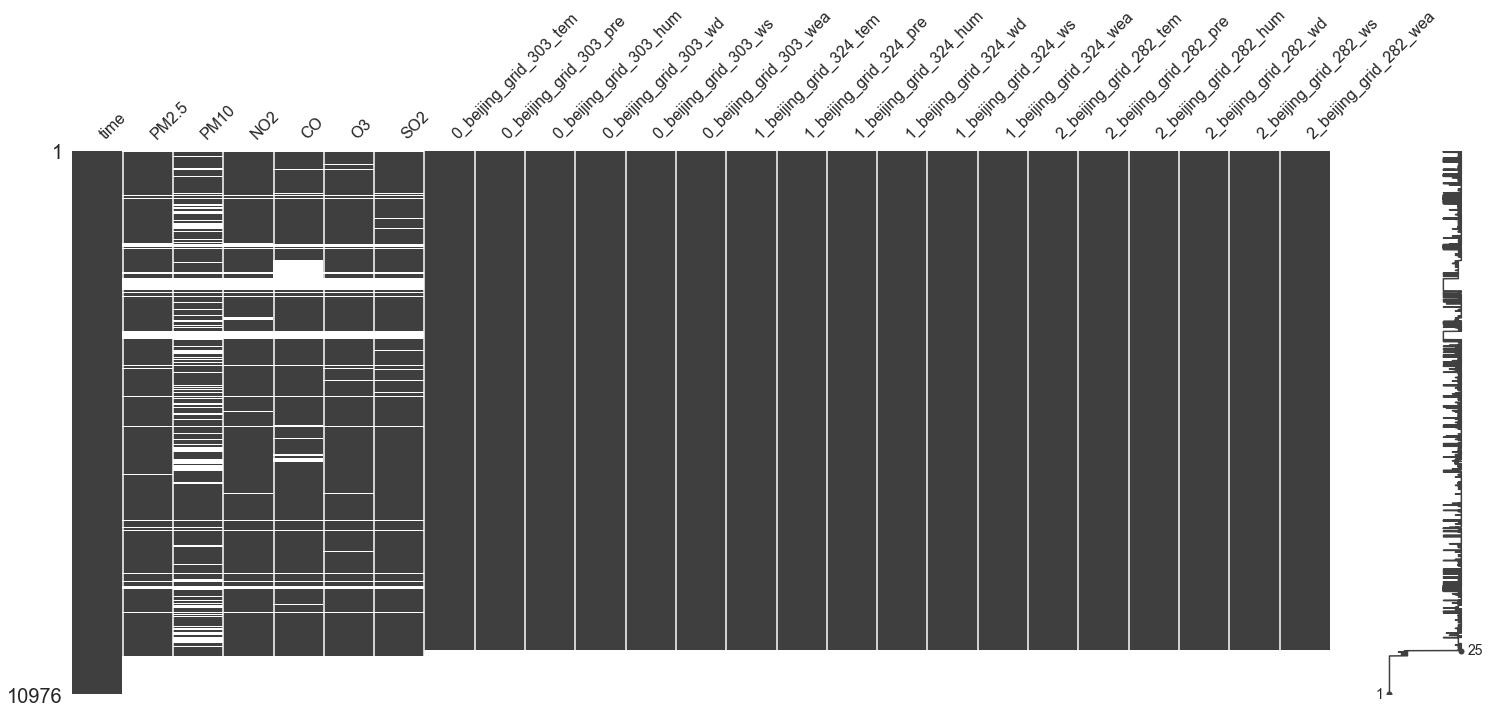

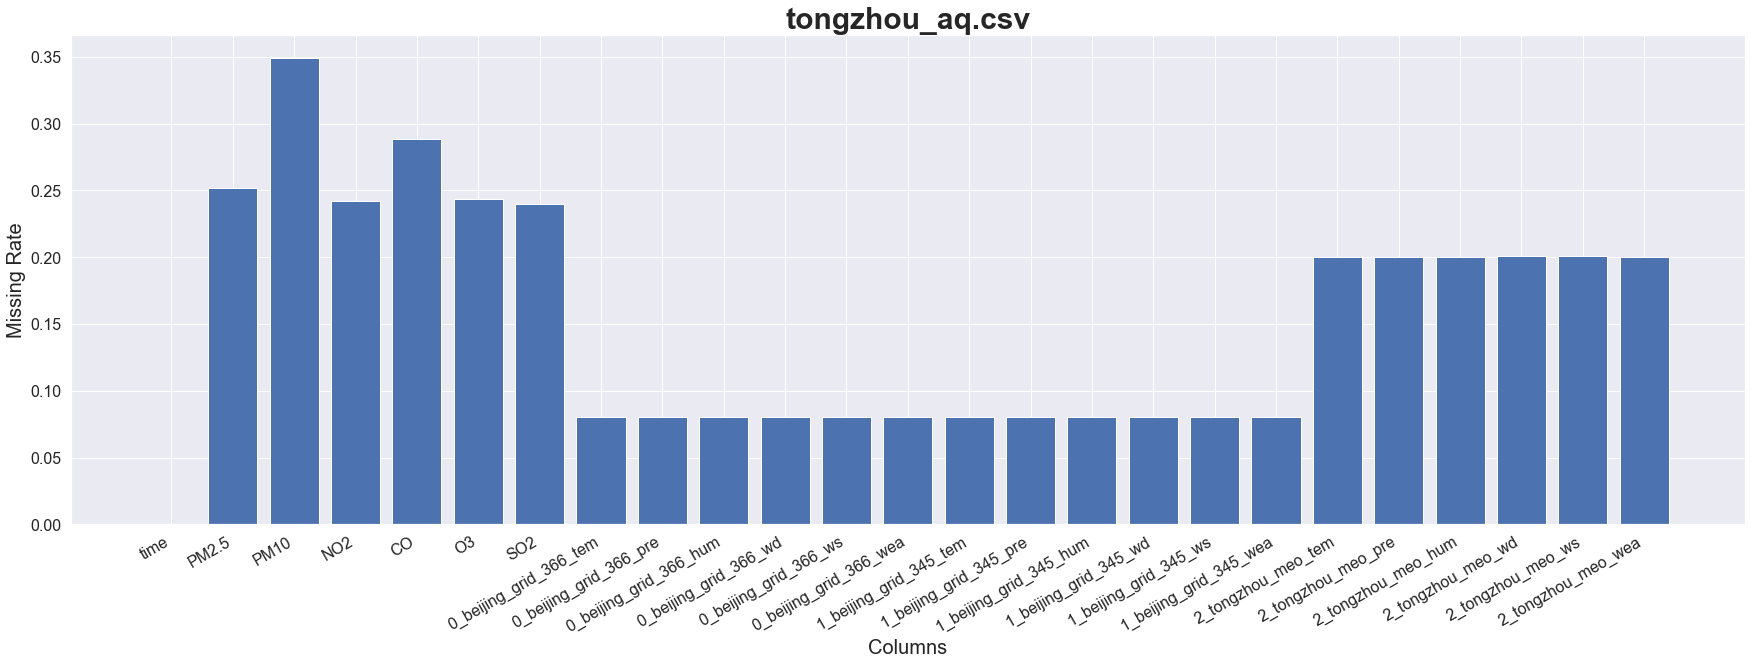

============== tongzhou_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_366_tem     True
0_beijing_grid_366_pre     True
0_beijing_grid_366_hum     True
0_beijing_grid_366_wd      True
0_beijing_grid_366_ws      True
0_beijing_grid_366_wea     True
1_beijing_grid_345_tem     True
1_beijing_grid_345_pre     True
1_beijing_grid_345_hum     True
1_beijing_grid_345_wd      True
1_beijing_grid_345_ws      True
1_beijing_grid_345_wea     True
2_tongzhou_meo_tem         True
2_tongzhou_meo_pre         True
2_tongzhou_meo_hum         True
2_tongzhou_meo_wd          True
2_tongzhou_meo_ws          True
2_tongzhou_meo_wea         True
dtype: bool


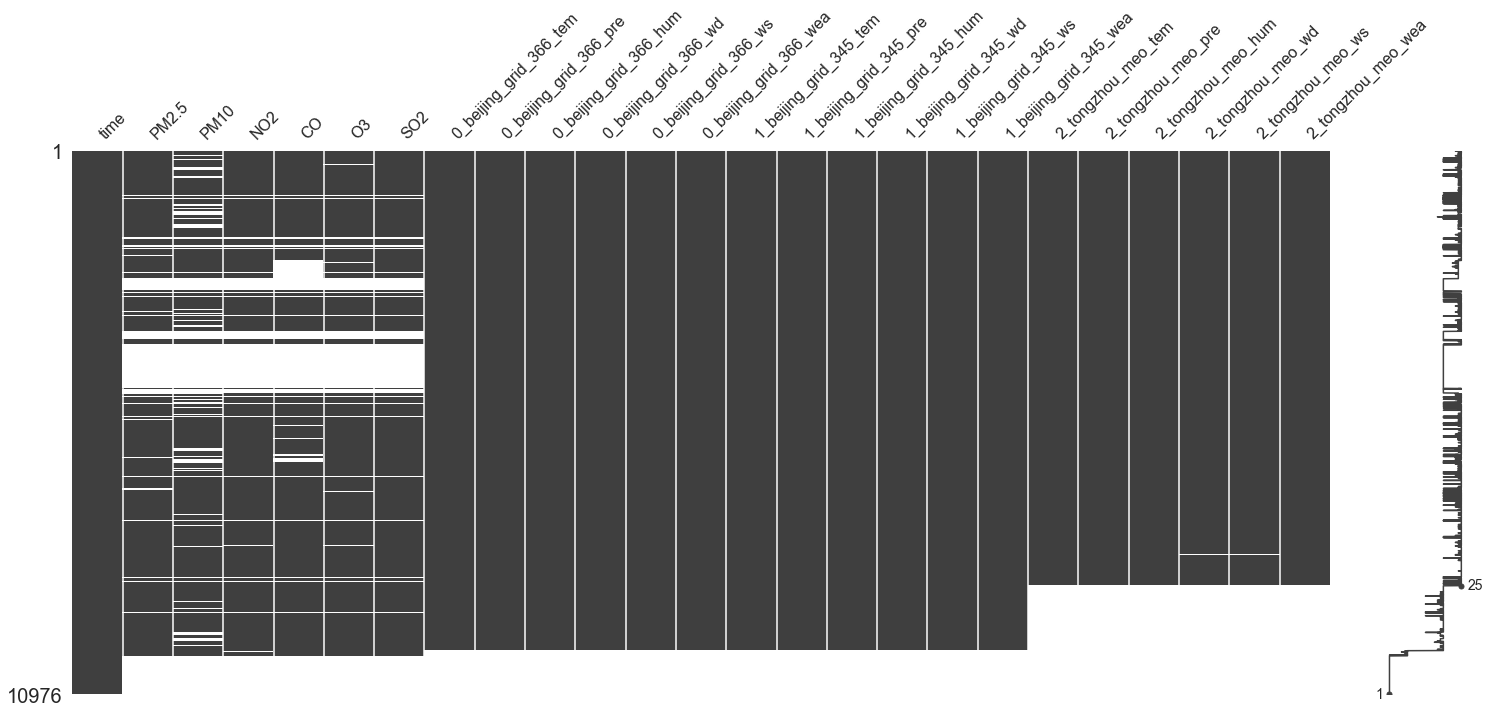

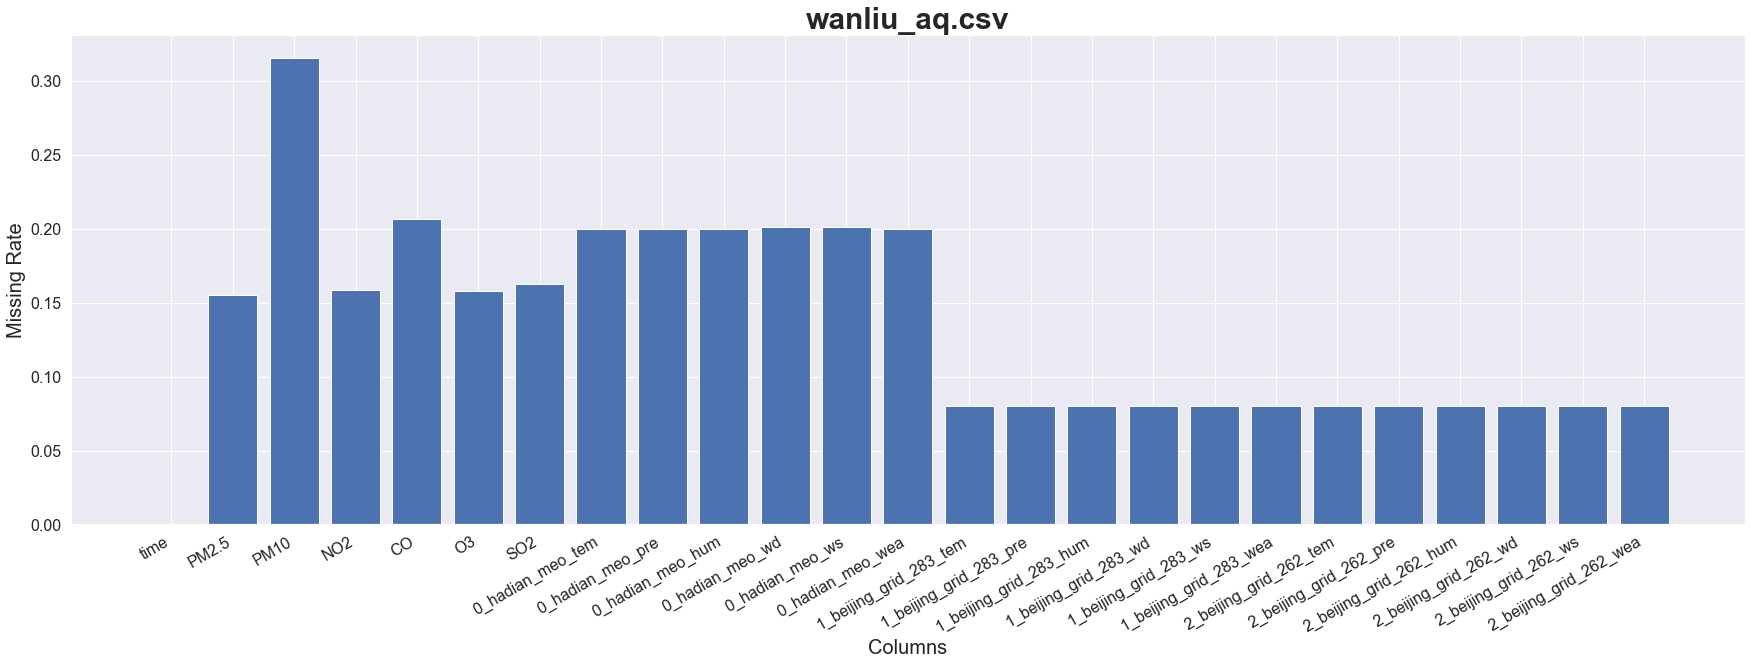

============== wanliu_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_hadian_meo_tem           True
0_hadian_meo_pre           True
0_hadian_meo_hum           True
0_hadian_meo_wd            True
0_hadian_meo_ws            True
0_hadian_meo_wea           True
1_beijing_grid_283_tem     True
1_beijing_grid_283_pre     True
1_beijing_grid_283_hum     True
1_beijing_grid_283_wd      True
1_beijing_grid_283_ws      True
1_beijing_grid_283_wea     True
2_beijing_grid_262_tem     True
2_beijing_grid_262_pre     True
2_beijing_grid_262_hum     True
2_beijing_grid_262_wd      True
2_beijing_grid_262_ws      True
2_beijing_grid_262_wea     True
dtype: bool


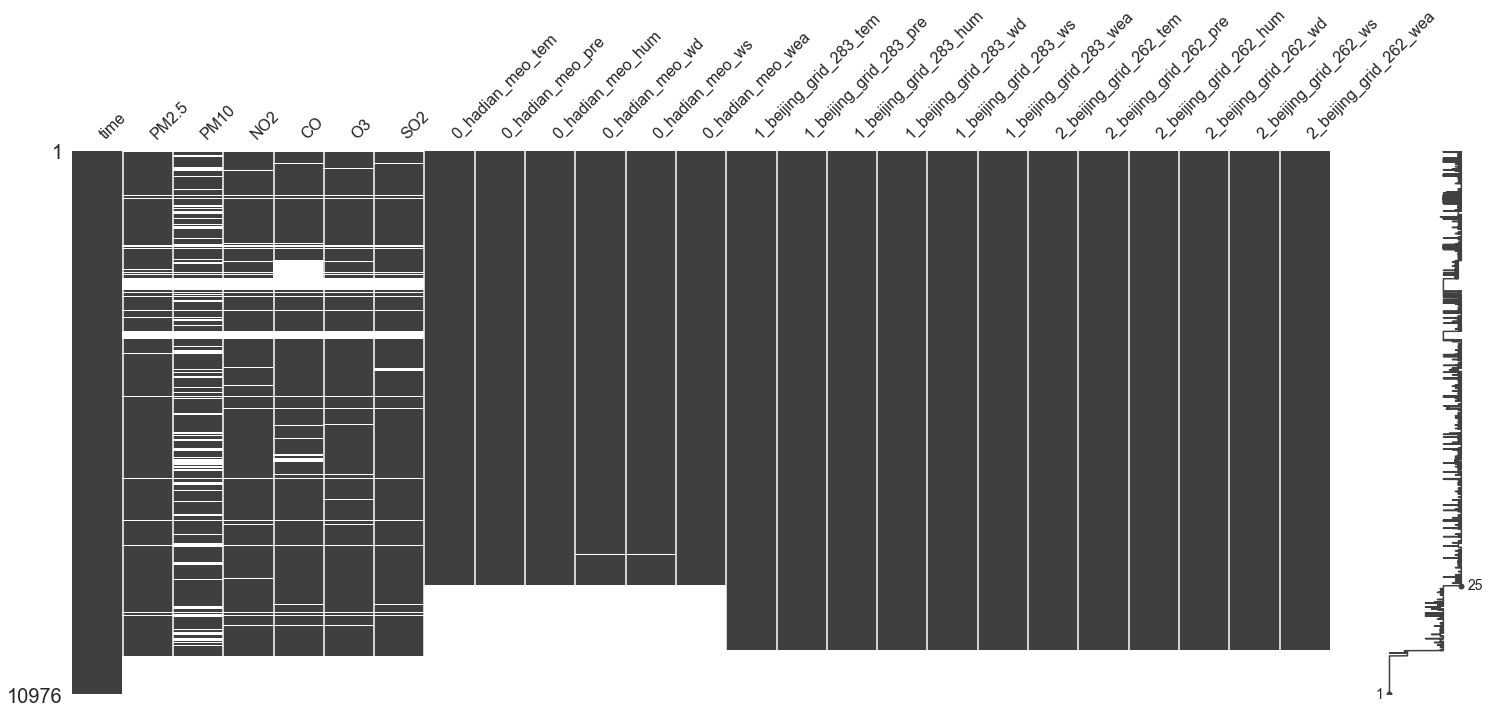

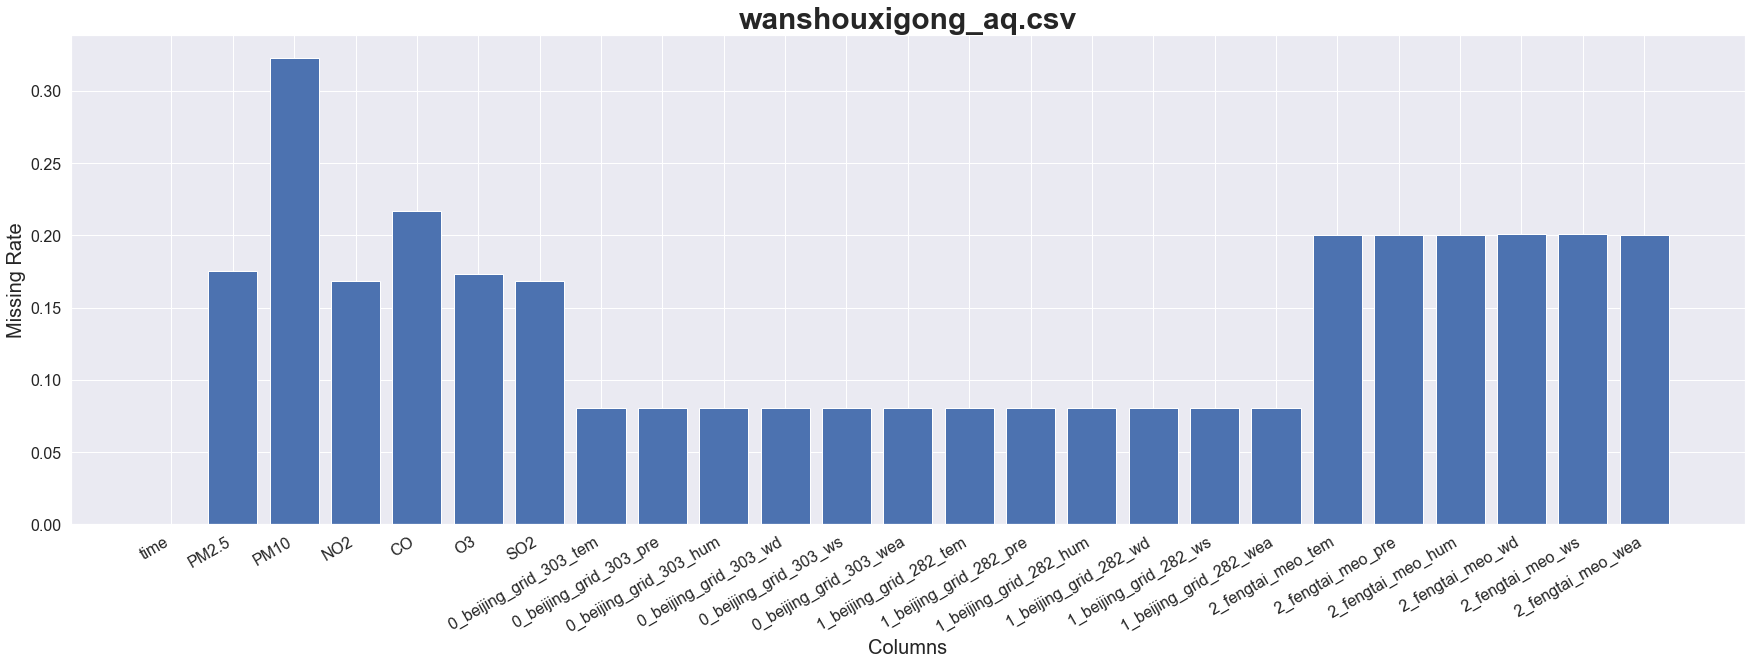

============== wanshouxigong_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_beijing_grid_282_tem     True
1_beijing_grid_282_pre     True
1_beijing_grid_282_hum     True
1_beijing_grid_282_wd      True
1_beijing_grid_282_ws      True
1_beijing_grid_282_wea     True
2_fengtai_meo_tem          True
2_fengtai_meo_pre          True
2_fengtai_meo_hum          True
2_fengtai_meo_wd           True
2_fengtai_meo_ws           True
2_fengtai_meo_wea          True
dtype: bool


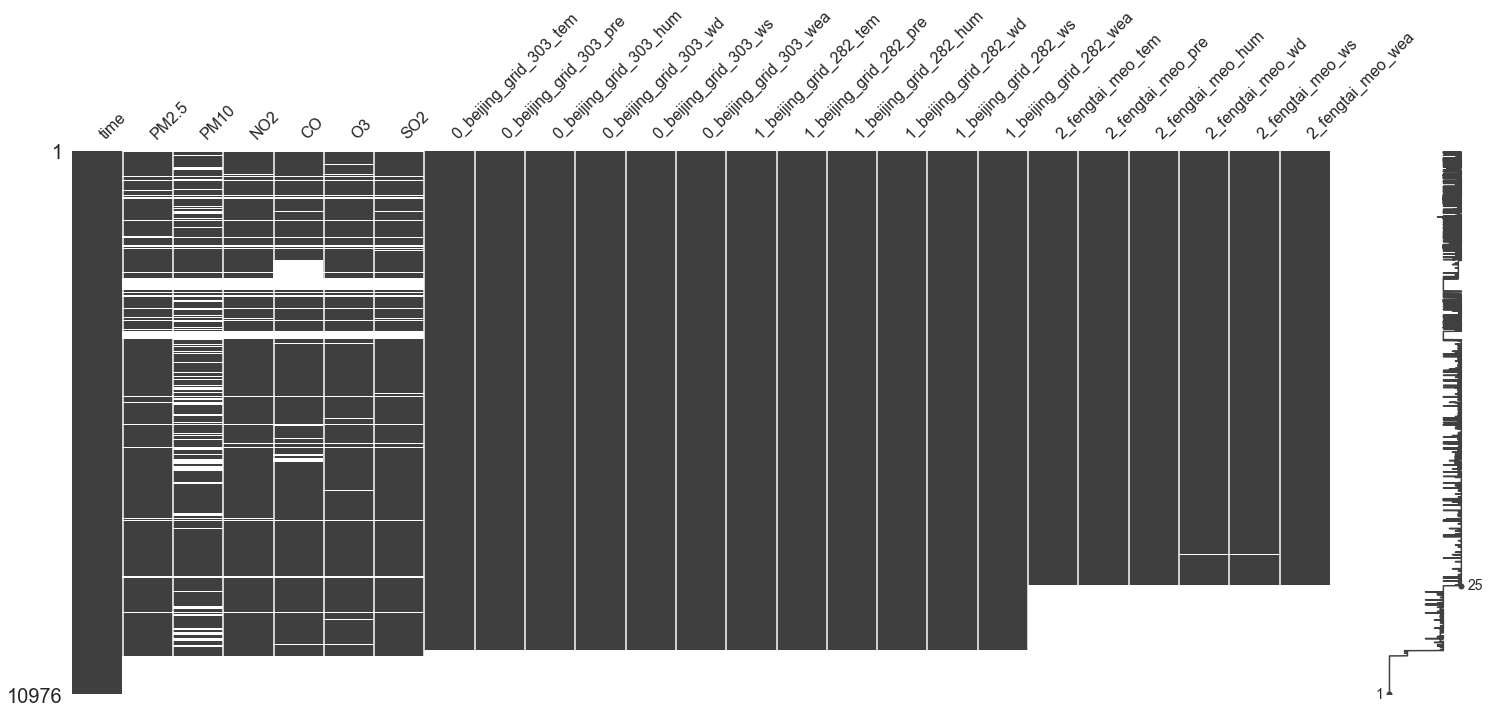

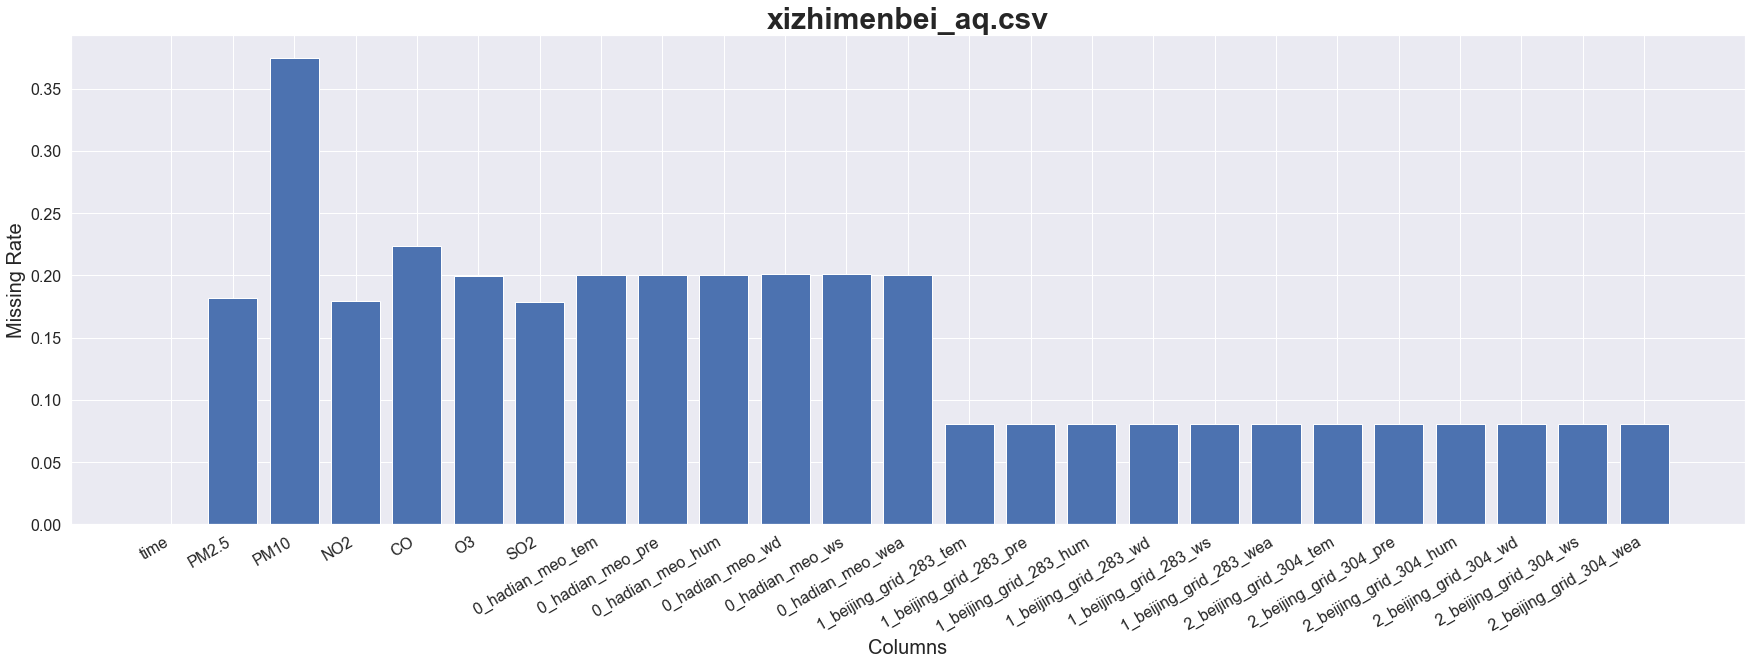

============== xizhimenbei_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_hadian_meo_tem           True
0_hadian_meo_pre           True
0_hadian_meo_hum           True
0_hadian_meo_wd            True
0_hadian_meo_ws            True
0_hadian_meo_wea           True
1_beijing_grid_283_tem     True
1_beijing_grid_283_pre     True
1_beijing_grid_283_hum     True
1_beijing_grid_283_wd      True
1_beijing_grid_283_ws      True
1_beijing_grid_283_wea     True
2_beijing_grid_304_tem     True
2_beijing_grid_304_pre     True
2_beijing_grid_304_hum     True
2_beijing_grid_304_wd      True
2_beijing_grid_304_ws      True
2_beijing_grid_304_wea     True
dtype: bool


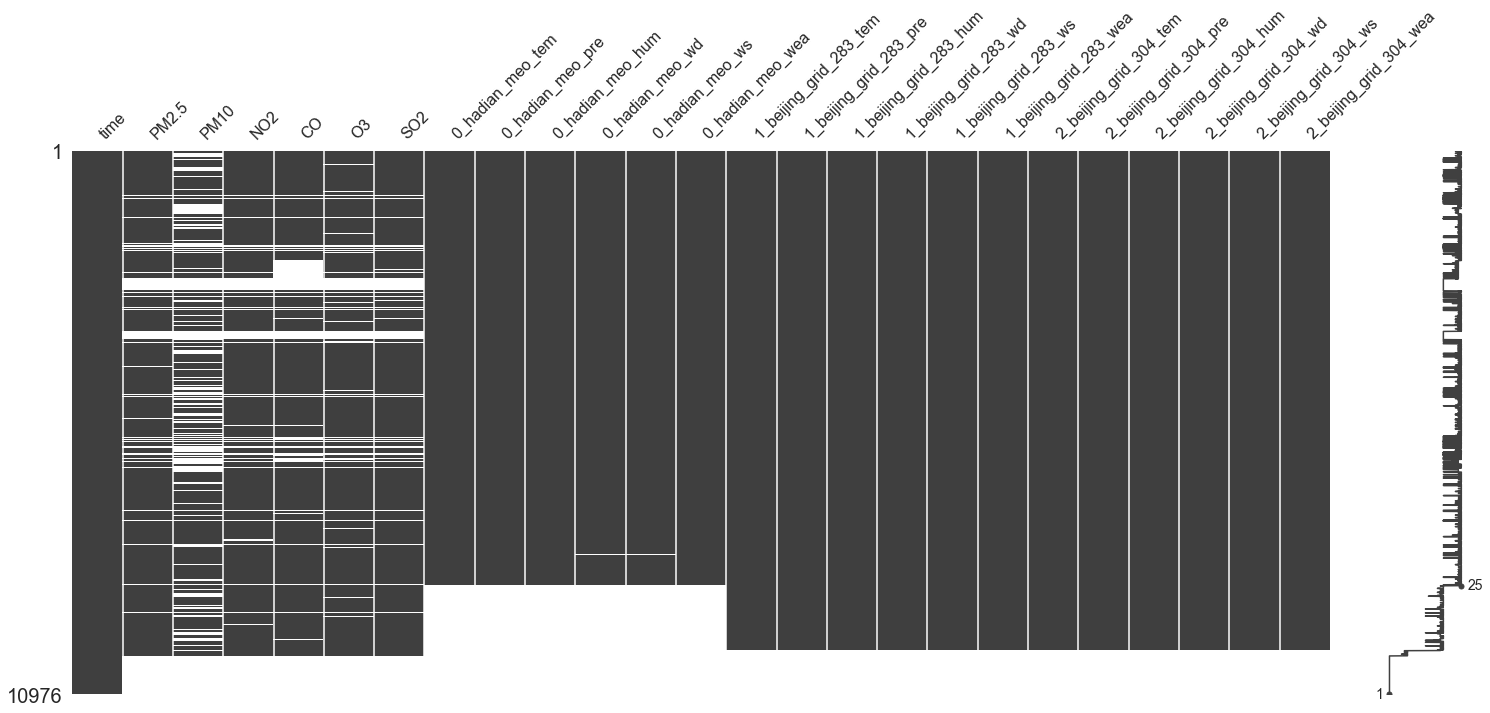

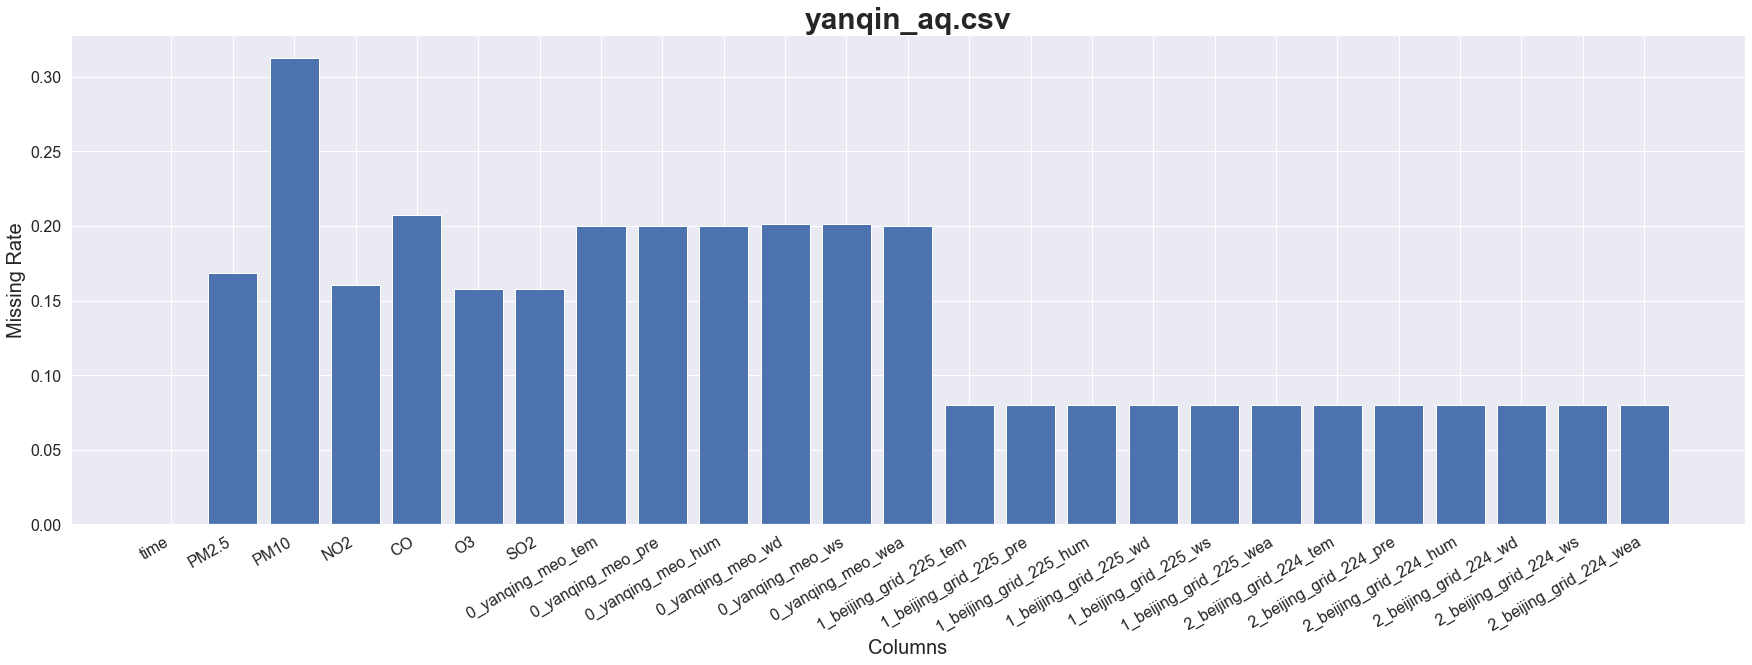

============== yanqin_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_yanqing_meo_tem          True
0_yanqing_meo_pre          True
0_yanqing_meo_hum          True
0_yanqing_meo_wd           True
0_yanqing_meo_ws           True
0_yanqing_meo_wea          True
1_beijing_grid_225_tem     True
1_beijing_grid_225_pre     True
1_beijing_grid_225_hum     True
1_beijing_grid_225_wd      True
1_beijing_grid_225_ws      True
1_beijing_grid_225_wea     True
2_beijing_grid_224_tem     True
2_beijing_grid_224_pre     True
2_beijing_grid_224_hum     True
2_beijing_grid_224_wd      True
2_beijing_grid_224_ws      True
2_beijing_grid_224_wea     True
dtype: bool


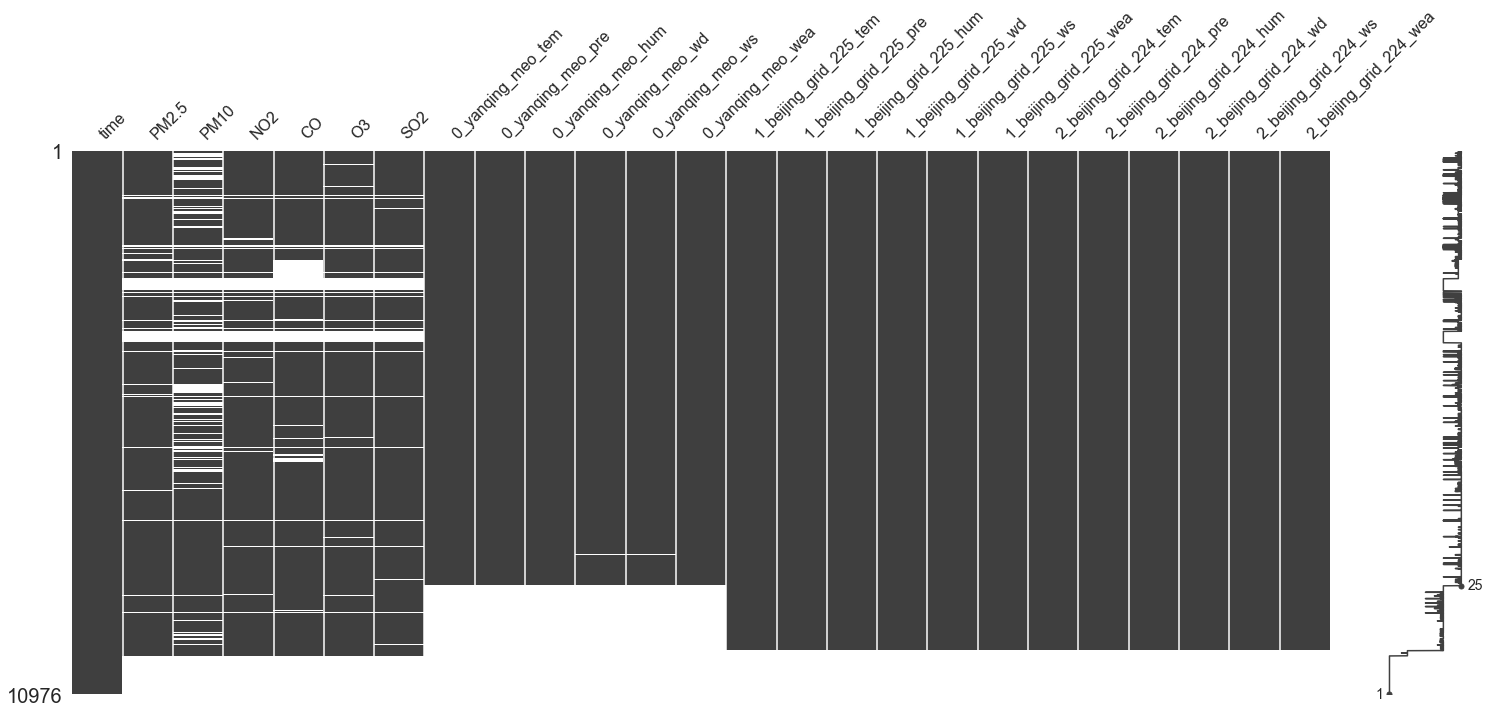

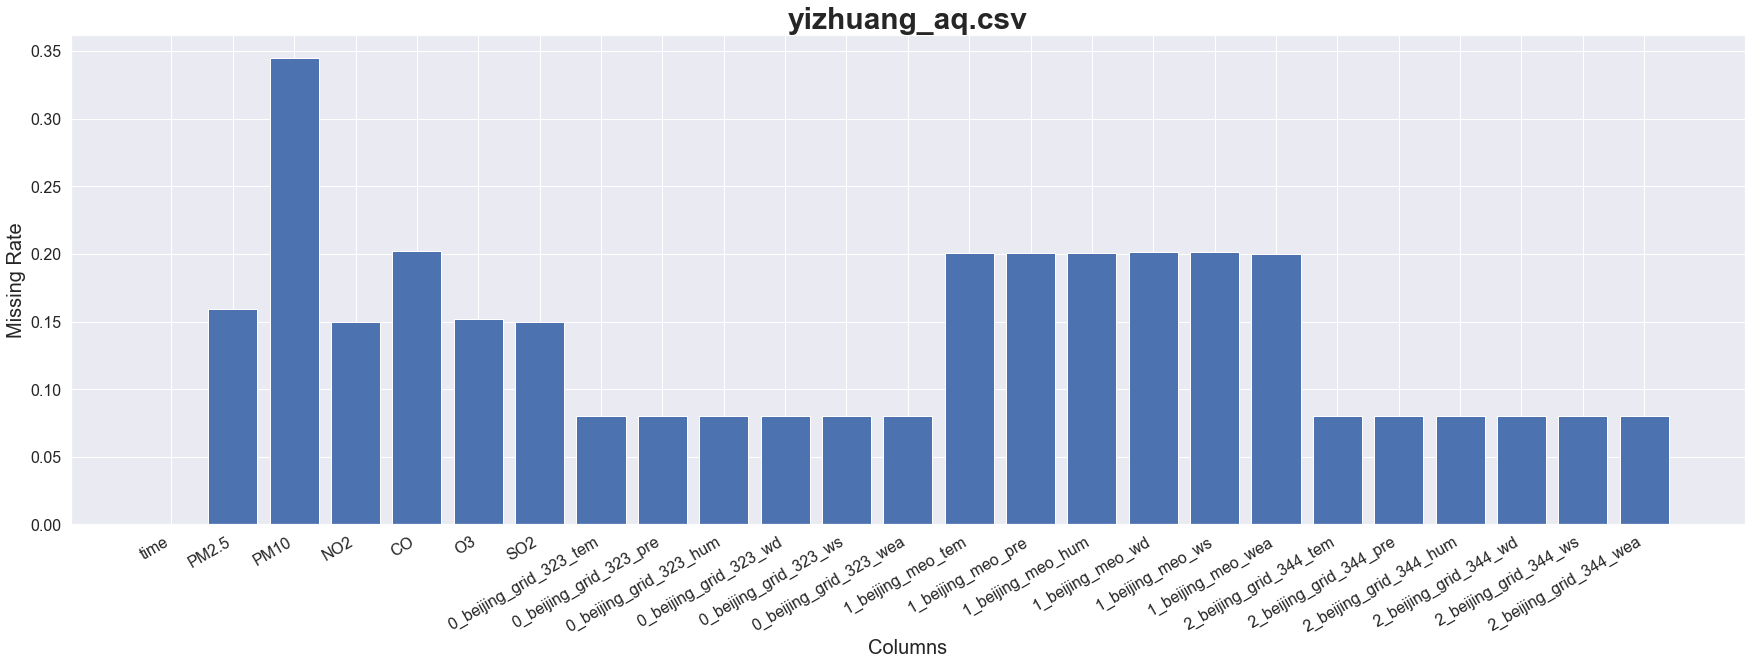

============== yizhuang_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_323_tem     True
0_beijing_grid_323_pre     True
0_beijing_grid_323_hum     True
0_beijing_grid_323_wd      True
0_beijing_grid_323_ws      True
0_beijing_grid_323_wea     True
1_beijing_meo_tem          True
1_beijing_meo_pre          True
1_beijing_meo_hum          True
1_beijing_meo_wd           True
1_beijing_meo_ws           True
1_beijing_meo_wea          True
2_beijing_grid_344_tem     True
2_beijing_grid_344_pre     True
2_beijing_grid_344_hum     True
2_beijing_grid_344_wd      True
2_beijing_grid_344_ws      True
2_beijing_grid_344_wea     True
dtype: bool


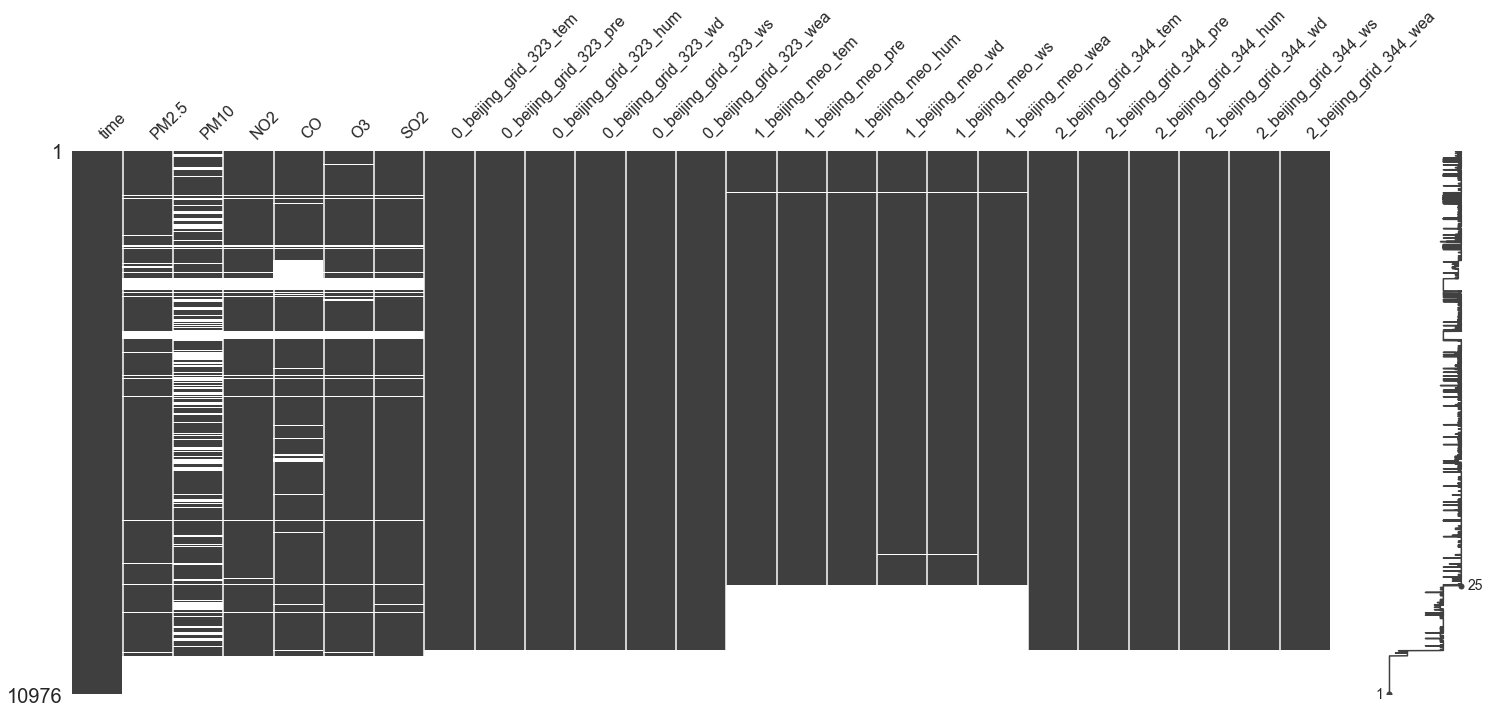

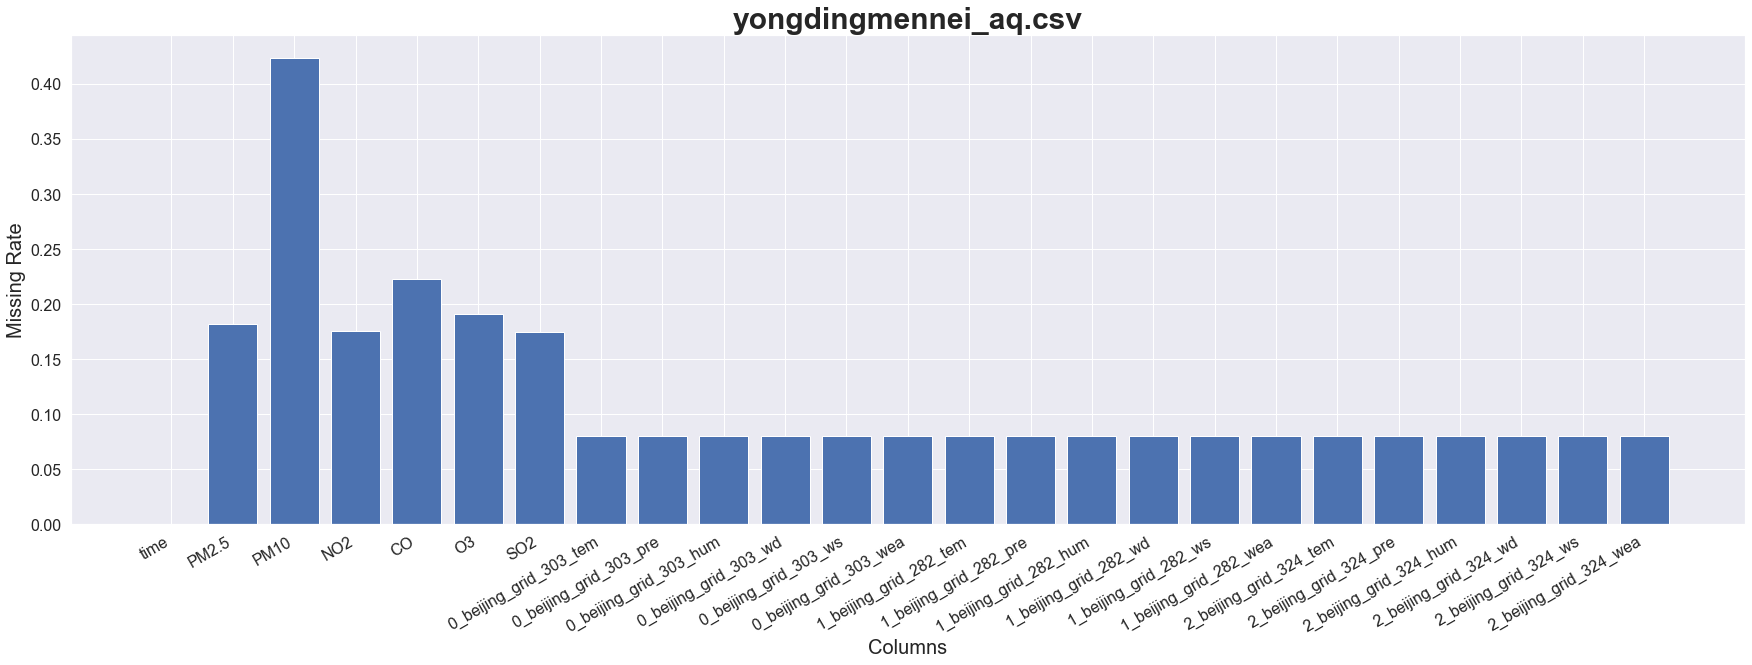

============== yongdingmennei_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_303_tem     True
0_beijing_grid_303_pre     True
0_beijing_grid_303_hum     True
0_beijing_grid_303_wd      True
0_beijing_grid_303_ws      True
0_beijing_grid_303_wea     True
1_beijing_grid_282_tem     True
1_beijing_grid_282_pre     True
1_beijing_grid_282_hum     True
1_beijing_grid_282_wd      True
1_beijing_grid_282_ws      True
1_beijing_grid_282_wea     True
2_beijing_grid_324_tem     True
2_beijing_grid_324_pre     True
2_beijing_grid_324_hum     True
2_beijing_grid_324_wd      True
2_beijing_grid_324_ws      True
2_beijing_grid_324_wea     True
dtype: bool


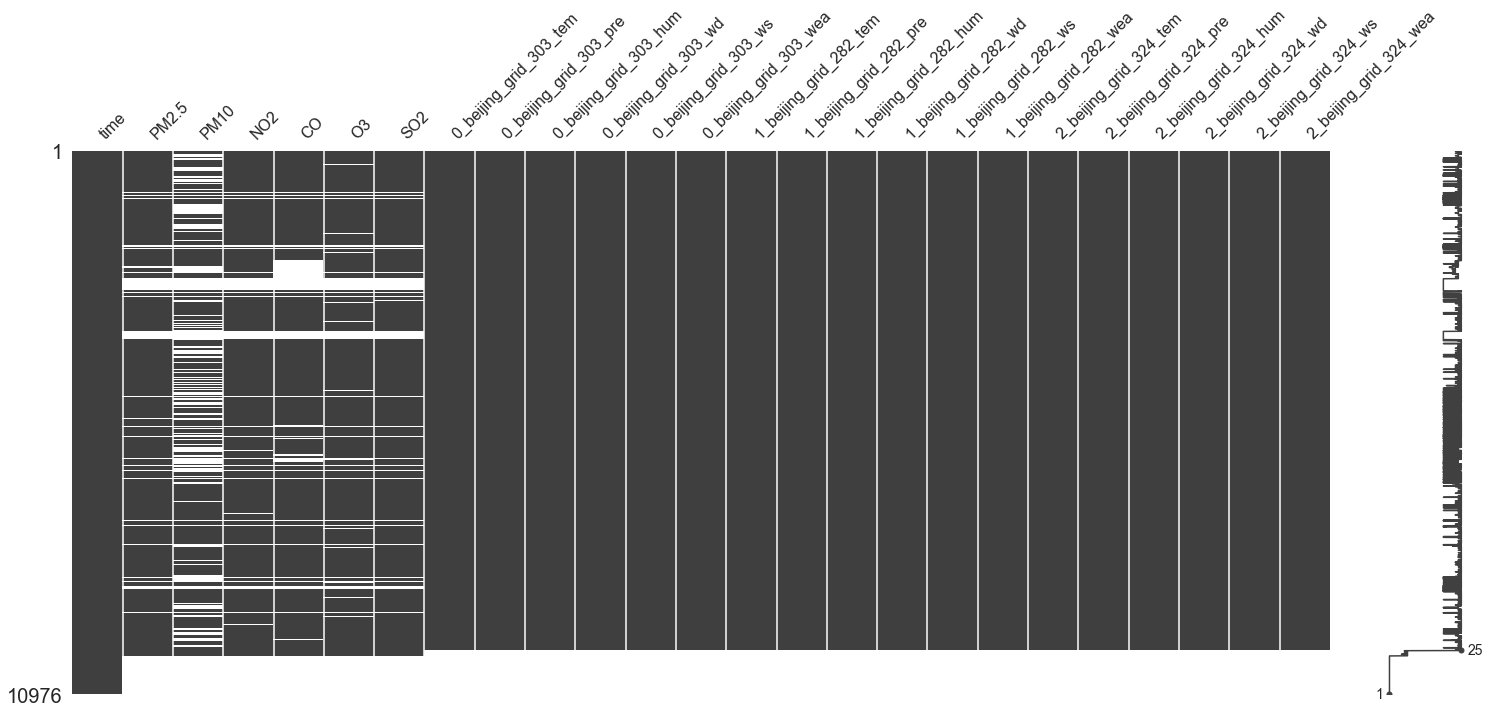

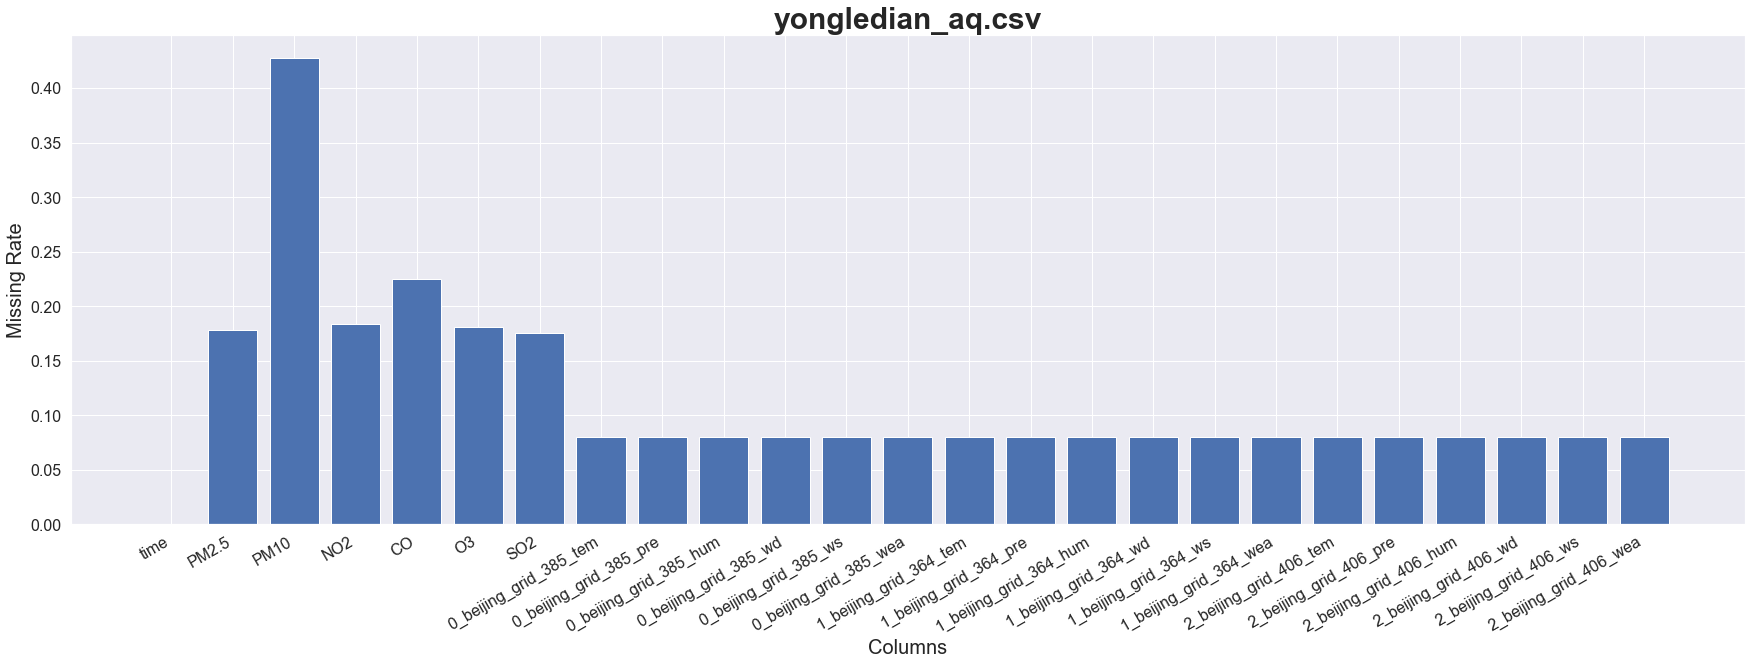

============== yongledian_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_385_tem     True
0_beijing_grid_385_pre     True
0_beijing_grid_385_hum     True
0_beijing_grid_385_wd      True
0_beijing_grid_385_ws      True
0_beijing_grid_385_wea     True
1_beijing_grid_364_tem     True
1_beijing_grid_364_pre     True
1_beijing_grid_364_hum     True
1_beijing_grid_364_wd      True
1_beijing_grid_364_ws      True
1_beijing_grid_364_wea     True
2_beijing_grid_406_tem     True
2_beijing_grid_406_pre     True
2_beijing_grid_406_hum     True
2_beijing_grid_406_wd      True
2_beijing_grid_406_ws      True
2_beijing_grid_406_wea     True
dtype: bool


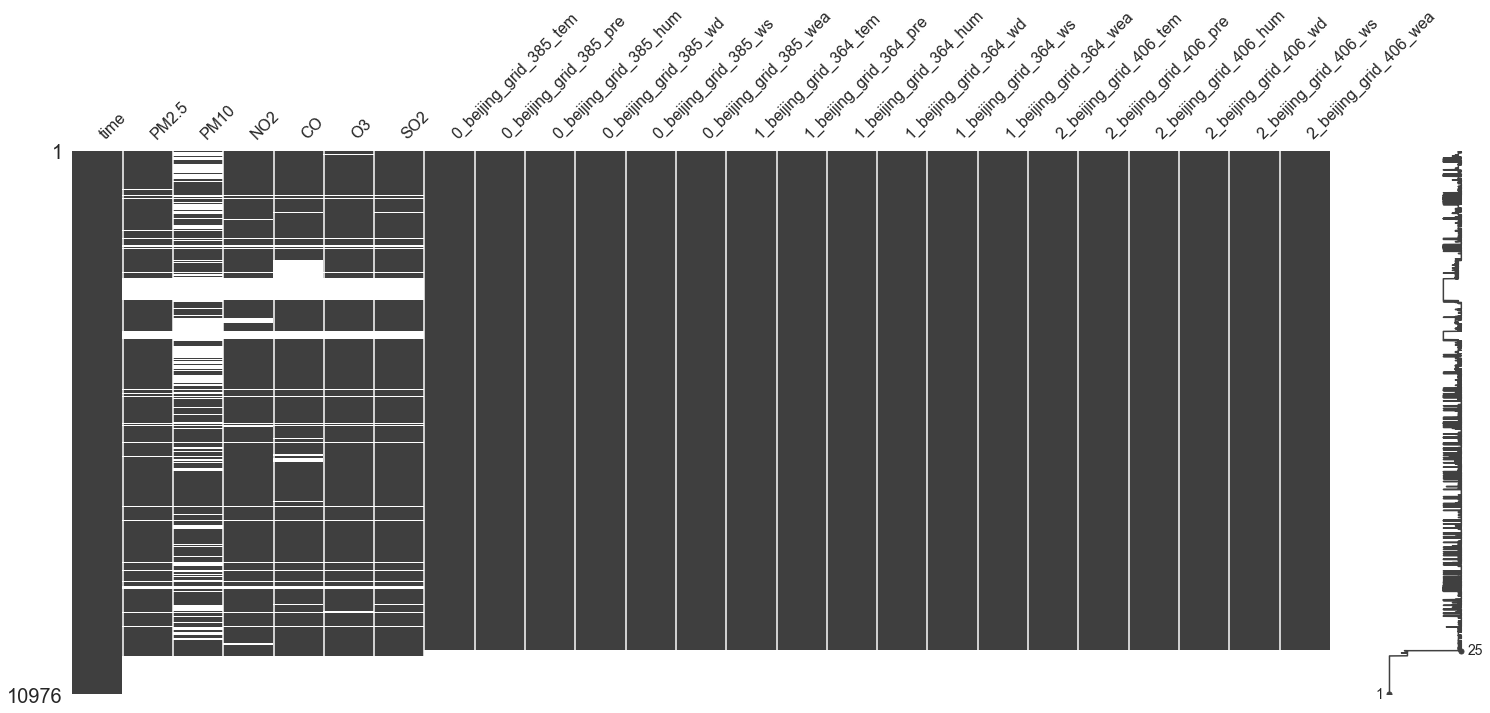

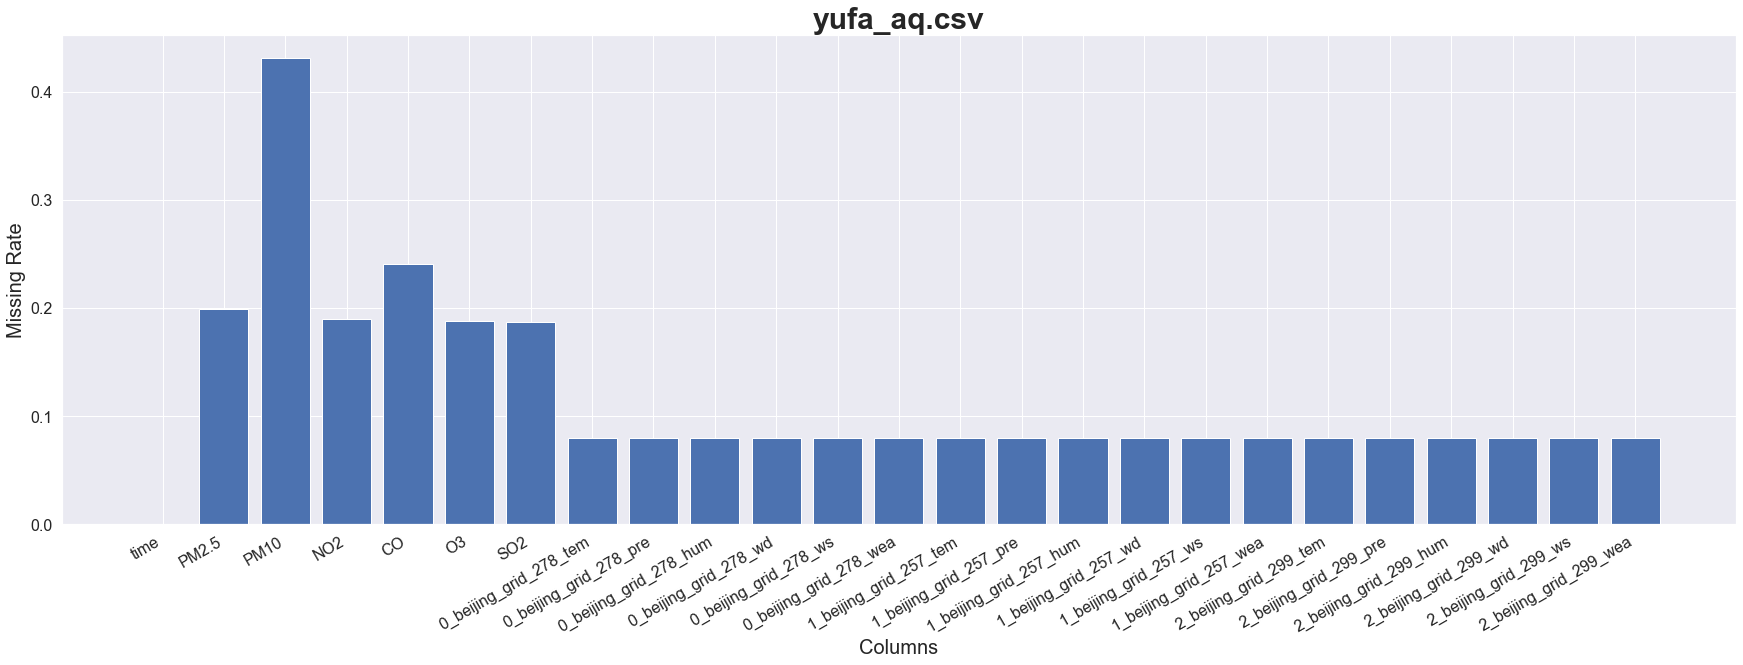

============== yufa_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_278_tem     True
0_beijing_grid_278_pre     True
0_beijing_grid_278_hum     True
0_beijing_grid_278_wd      True
0_beijing_grid_278_ws      True
0_beijing_grid_278_wea     True
1_beijing_grid_257_tem     True
1_beijing_grid_257_pre     True
1_beijing_grid_257_hum     True
1_beijing_grid_257_wd      True
1_beijing_grid_257_ws      True
1_beijing_grid_257_wea     True
2_beijing_grid_299_tem     True
2_beijing_grid_299_pre     True
2_beijing_grid_299_hum     True
2_beijing_grid_299_wd      True
2_beijing_grid_299_ws      True
2_beijing_grid_299_wea     True
dtype: bool


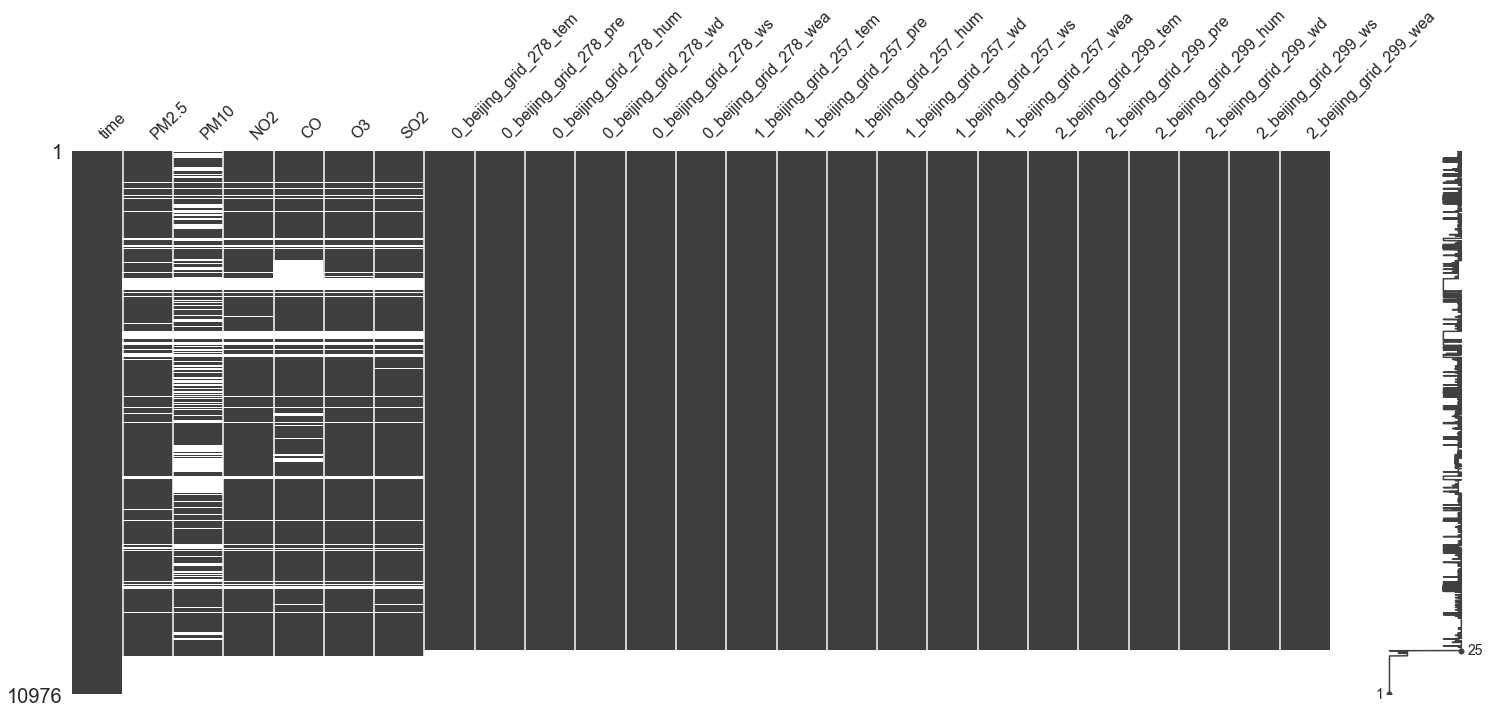

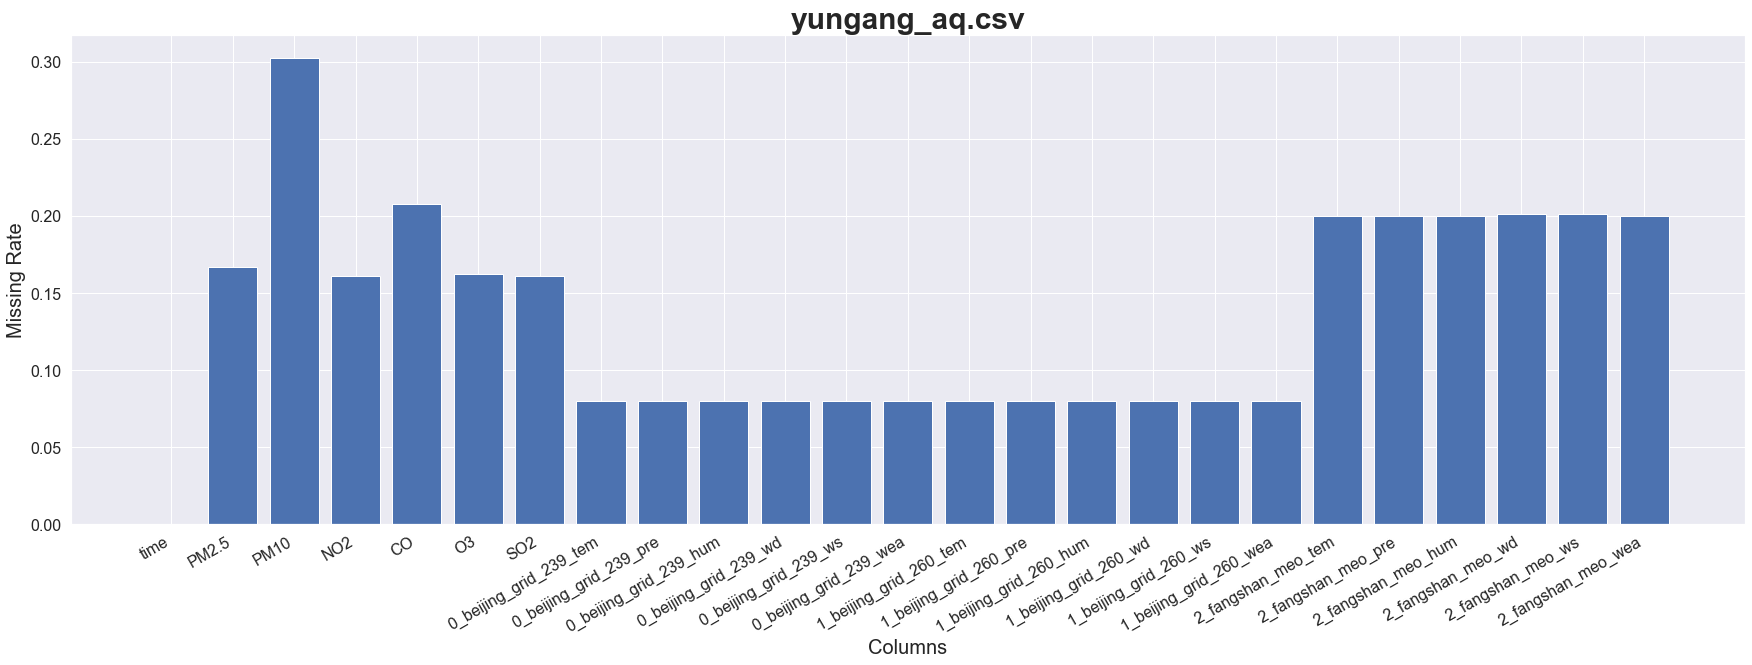

============== yungang_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_239_tem     True
0_beijing_grid_239_pre     True
0_beijing_grid_239_hum     True
0_beijing_grid_239_wd      True
0_beijing_grid_239_ws      True
0_beijing_grid_239_wea     True
1_beijing_grid_260_tem     True
1_beijing_grid_260_pre     True
1_beijing_grid_260_hum     True
1_beijing_grid_260_wd      True
1_beijing_grid_260_ws      True
1_beijing_grid_260_wea     True
2_fangshan_meo_tem         True
2_fangshan_meo_pre         True
2_fangshan_meo_hum         True
2_fangshan_meo_wd          True
2_fangshan_meo_ws          True
2_fangshan_meo_wea         True
dtype: bool


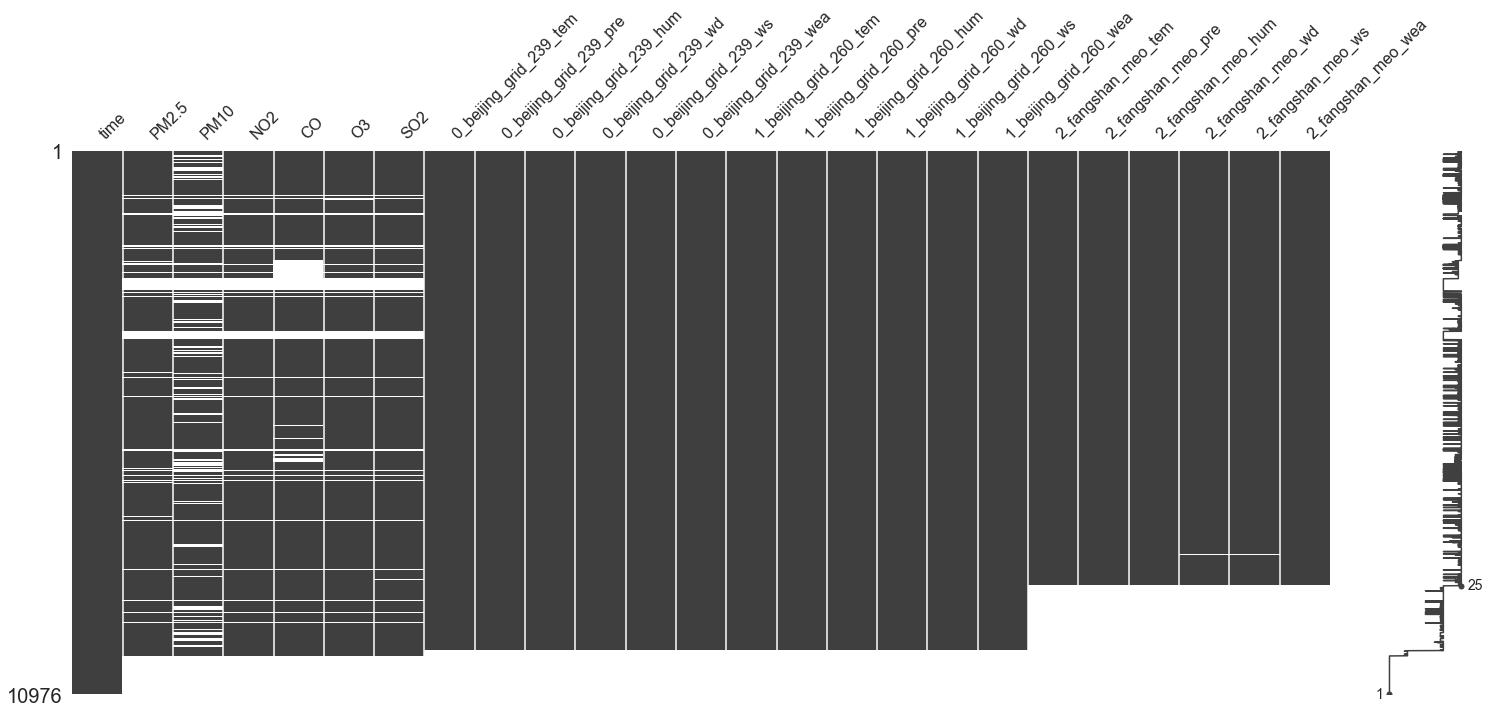

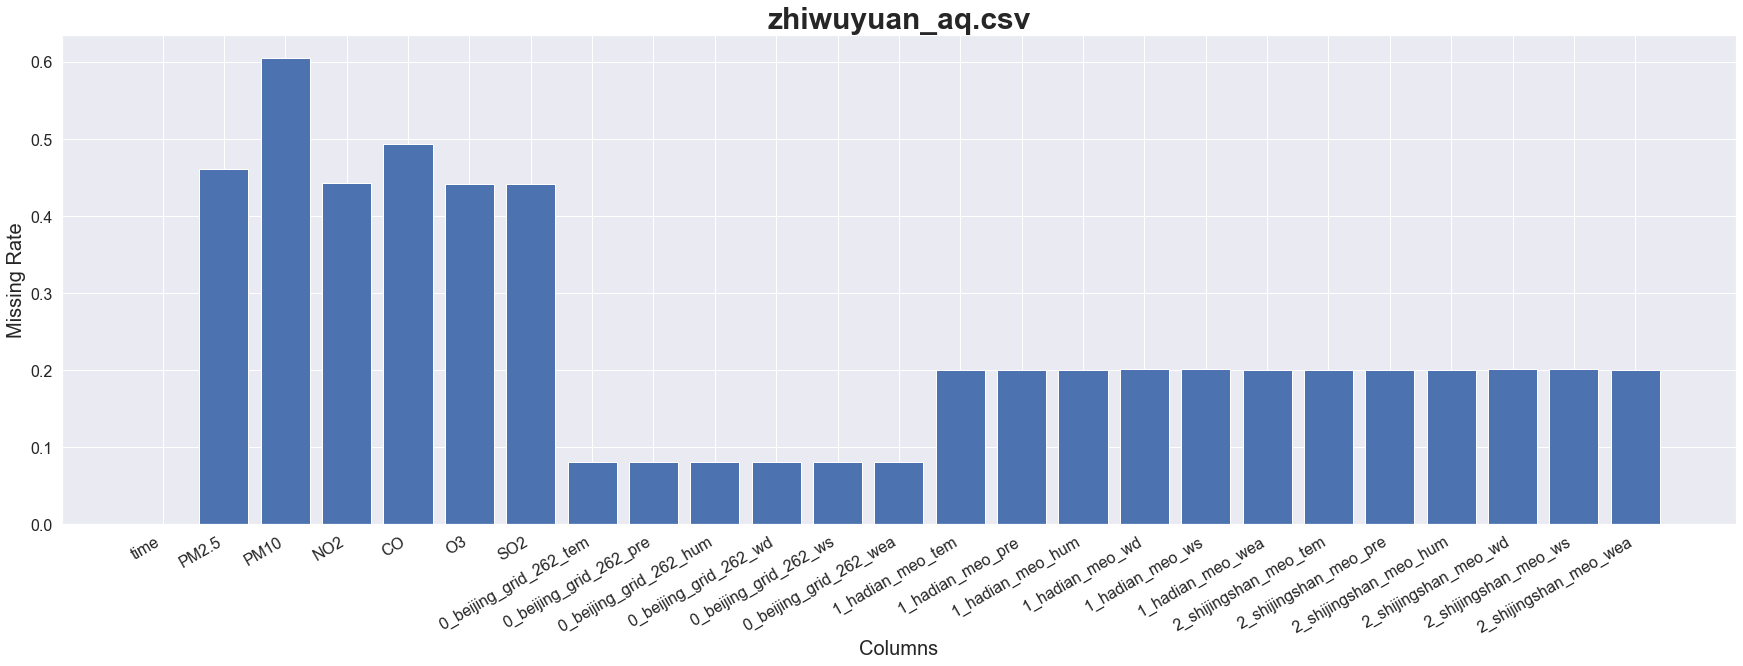

============== zhiwuyuan_aq.csv ================
time                      False
PM2.5                      True
PM10                       True
NO2                        True
CO                         True
O3                         True
SO2                        True
0_beijing_grid_262_tem     True
0_beijing_grid_262_pre     True
0_beijing_grid_262_hum     True
0_beijing_grid_262_wd      True
0_beijing_grid_262_ws      True
0_beijing_grid_262_wea     True
1_hadian_meo_tem           True
1_hadian_meo_pre           True
1_hadian_meo_hum           True
1_hadian_meo_wd            True
1_hadian_meo_ws            True
1_hadian_meo_wea           True
2_shijingshan_meo_tem      True
2_shijingshan_meo_pre      True
2_shijingshan_meo_hum      True
2_shijingshan_meo_wd       True
2_shijingshan_meo_ws       True
2_shijingshan_meo_wea      True
dtype: bool


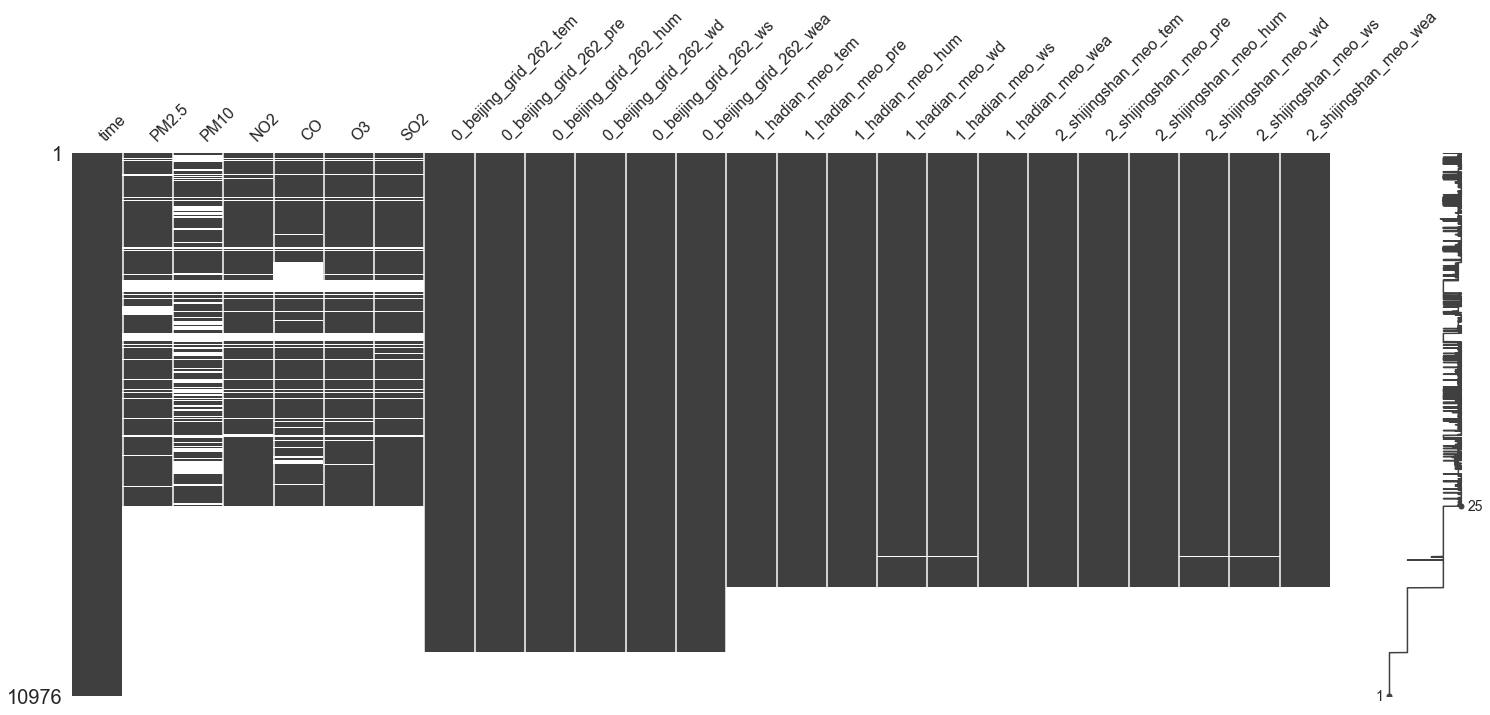

In [42]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib

import os

# read files from directory
cleaned_data_path = 'D:/Akhila/Air pollution data set/cleaned_data/'
aq_file_list = []
airQ_data_dict = {}

# read the file names into list
for aq_file in os.listdir(cleaned_data_path):
    if '.csv' in aq_file:
        aq_file_list.append(aq_file)
        airQ_data_dict[aq_file] = pd.read_csv(cleaned_data_path+aq_file, index_col=0)
        
# analyze the missing value
for key, value in airQ_data_dict.items():
    missing_data_analysis(value, key)
    msno_analysis(value, key)
    

#### Imputation

In [43]:
#use the imputation algorithm to fill missing values
from sklearn.impute import KNNImputer
#import ipdb

def imputeWeatherData(data_df):
    '''
    Impute the weather data & Ignore the Air quality data
    '''
    # get all the columns
    data_cols = data_df.columns
    
    # air data columns
    air_cols = ['time', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
    data_df['PM10'].fillna(data_df['PM10'].median(), inplace=True)
    data_df['PM2.5'].fillna(data_df['PM2.5'].median(), inplace=True)
    data_df['SO2'].fillna(data_df['SO2'].median(), inplace=True)
    data_df['NO2'].fillna(data_df['NO2'].mean(), inplace=True)
    data_df['CO'].fillna(data_df['CO'].median(), inplace=True)
    data_df['O3'].fillna(data_df['O3'].median(), inplace=True)
    
    # categorical weather features columns with 'time'
    wea_cate_cols = [x for x in data_cols if '_wea' in x]
    wea_cate_cols.append('time')
    
    # weather columns without 'time'
    wea_cols = list(set(data_cols) - set(air_cols) - set(wea_cate_cols) - set('time'))
    
    # air quality & weather dataframe
    air_quality_df = data_df[air_cols]
    weather_cate_df = data_df[wea_cate_cols]
    
    # result dataframe
    result_df = air_quality_df.copy()
    
    # impute the data by each KNN station
    for i in range(k_nn):
        impute_cols = [x for x in wea_cols if '{}_'.format(i) in x]
        impute_cols.append('time')
        impute_df = data_df[impute_cols]
        impute_df.time = impute_df.time.reset_index()
        imputer = KNNImputer(n_neighbors=3)
        data_filled = imputer.fit_transform(impute_df)
        data_filled_df = pd.DataFrame(data_filled, columns=impute_cols)
        data_filled_df.time = pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00', freq="H")
        
        # merge into the result dataframe
        result_df = result_df.merge(data_filled_df, on='time', how='left')
        
    
     # one-hot encoding of the categorical weather dataframe & drop '%wea_None' columns

    wea_cate_dummies = pd.get_dummies(weather_cate_df)
    wea_none_cols = [x for x in wea_cate_dummies.columns if 'wea_None' in x]
    wea_cate_dummies = wea_cate_dummies.drop(columns=wea_none_cols)
    
    # concat the weather categorical features
    result_df = result_df.merge(wea_cate_dummies, on='time', how='left')
        
    return result_df
    
atzx_impute = imputeWeatherData(atzx)
atzx_impute

time  PM2.5  PM10        NO2   CO    O3   SO2  \
0     2017-01-30 16:00:00   70.0  75.0  36.000000  0.9  79.0  34.0   
1     2017-01-30 17:00:00   78.0  86.0  36.000000  0.1  78.0  38.0   
2     2017-01-30 18:00:00   86.0  92.0  39.000000  1.1  74.0  35.0   
3     2017-01-30 19:00:00   95.0  66.0  46.000000  1.2  65.0  34.0   
4     2017-01-30 20:00:00   98.0  66.0  42.000000  1.2  50.0  32.0   
...                   ...    ...   ...        ...  ...   ...   ...   
10971 2018-05-02 19:00:00   37.0  66.0  50.596548  0.7  50.0   4.0   
10972 2018-05-02 20:00:00   37.0  66.0  50.596548  0.7  50.0   4.0   
10973 2018-05-02 21:00:00   37.0  66.0  50.596548  0.7  50.0   4.0   
10974 2018-05-02 22:00:00   37.0  66.0  50.596548  0.7  50.0   4.0   
10975 2018-05-02 23:00:00   37.0  66.0  50.596548  0.7  50.0   4.0   

       0_beijing_grid_304_tem  0_beijing_grid_304_ws  0_beijing_grid_304_pre  \
0                       -5.89               7.130000                 1026.03   
1                       -6.16               6.020000                 1025.68   
2                       -6.44               4.960000                 1025.32   
3                       -7.02               4.550000                 1024.89   
4                       -7.61               4.170000                 1024.46   
...                       ...                    ...                     ...   
10971                   23.15               6.733333                  998.73   
10972                   23.15               6.733333                  998.73   
10973                   23.15               6.733333                  998.73   
10974                   23.15               6.733333                  998.73   
10975                   23.15               6.733333                  998.73   

       ...  2_hadian_meo_ws  2_hadian_meo_pre  2_hadian_meo_wd  \
0      ...              2.5            1026.1            231.0   
1      ...              1.9            1025.9            234.0   
2      ...              1.2            1025.6            242.0   
3      ...              1.1            1025.2            254.0   
4      ...              0.0            1024.3              0.5   
...    ...              ...               ...              ...   
10971  ...              0.9            1022.1            204.0   
10972  ...              0.9            1022.1            204.0   
10973  ...              0.9            1022.1            204.0   
10974  ...              0.9            1022.1            204.0   
10975  ...              0.9            1022.1            204.0   

       2_hadian_meo_wea_Dust  2_hadian_meo_wea_Fog  2_hadian_meo_wea_Haze  \
0                          0                     0                      0   
1                          0                     0                      0   
2                          0                     0                      0   
3                          0                     0                      0   
4                          0                     0                      0   
...                      ...                   ...                    ...   
10971                      0                     0                      0   
10972                      0                     0                      0   
10973                      0                     0                      0   
10974                      0                     0                      0   
10975                      0                     0                      0   

       2_hadian_meo_wea_Rain  2_hadian_meo_wea_Sand  2_hadian_meo_wea_Snow  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...     

In [44]:
atzx_impute.isnull().any()

time                            False
PM2.5                           False
PM10                            False
NO2                             False
CO                              False
O3                              False
SO2                             False
0_beijing_grid_304_tem          False
0_beijing_grid_304_ws           False
0_beijing_grid_304_pre          False
0_beijing_grid_304_hum          False
0_beijing_grid_304_wd           False
1_beijing_grid_283_pre          False
1_beijing_grid_283_ws           False
1_beijing_grid_283_wd           False
1_beijing_grid_283_hum          False
1_beijing_grid_283_tem          False
2_hadian_meo_tem                False
2_hadian_meo_hum                False
2_hadian_meo_ws                 False
2_hadian_meo_pre                False
2_hadian_meo_wd                 False
2_hadian_meo_wea_Dust           False
2_hadian_meo_wea_Fog            False
2_hadian_meo_wea_Haze           False
2_hadian_meo_wea_Rain           False
2_hadian_meo

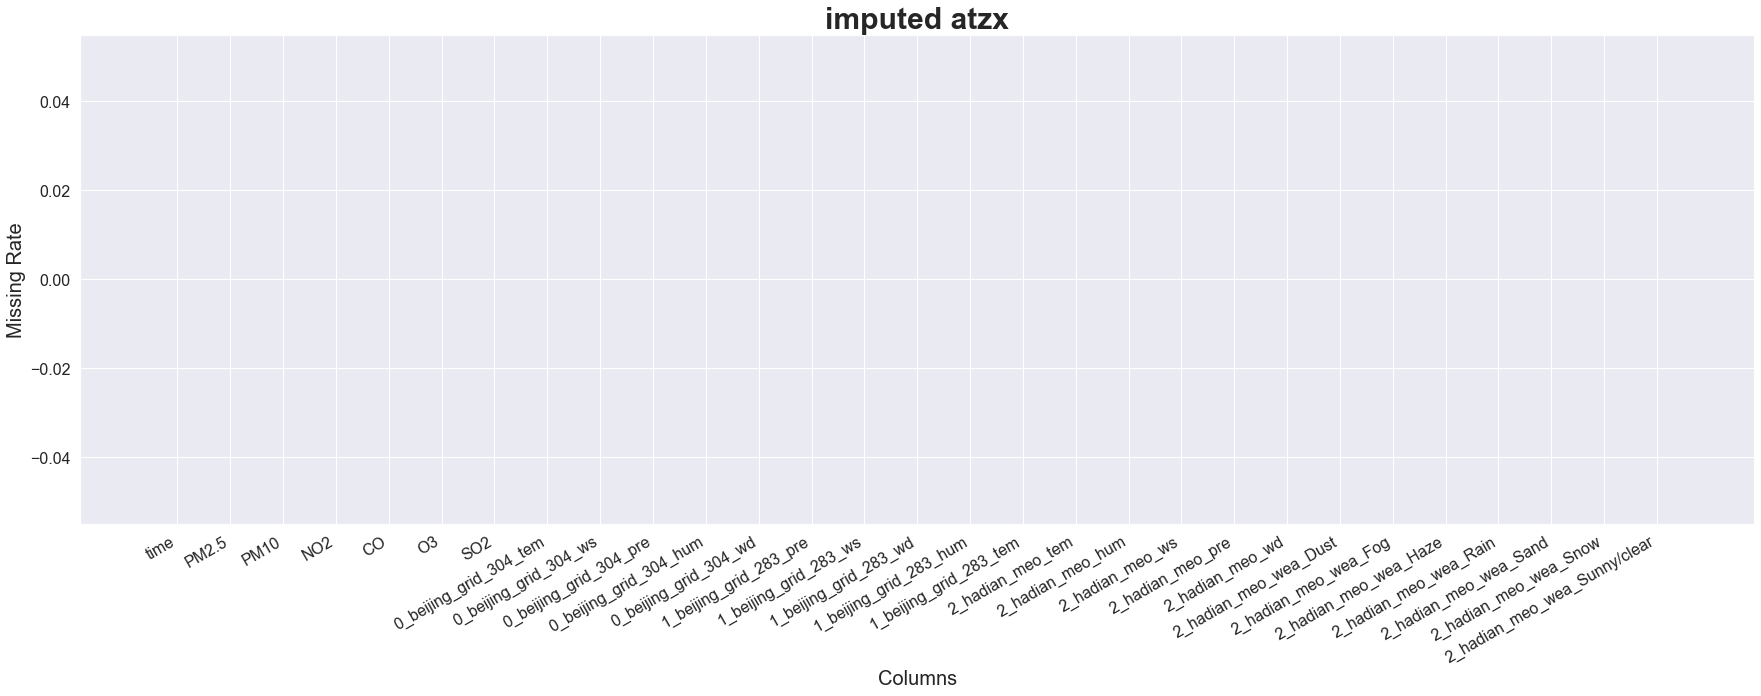

<AxesSubplot:>

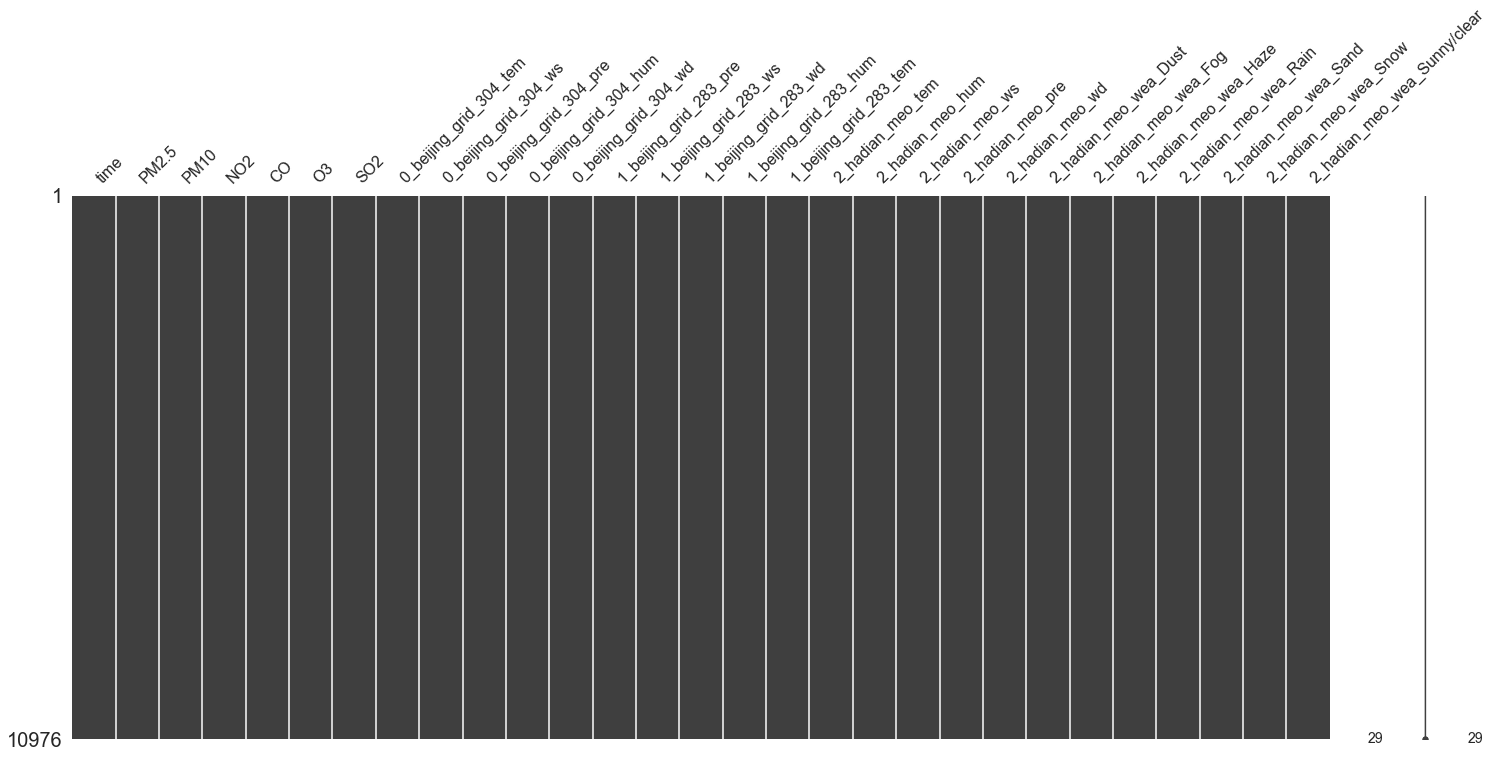

In [45]:
missing_data_analysis(atzx_impute, 'imputed atzx')
msno.matrix(atzx_impute)


In [46]:
airQ_data_dict['donggaocun_aq.csv'].dtypes


time                       object
PM2.5                     float64
PM10                      float64
NO2                       float64
CO                        float64
O3                        float64
SO2                       float64
0_beijing_grid_452_tem    float64
0_beijing_grid_452_pre    float64
0_beijing_grid_452_hum    float64
0_beijing_grid_452_wd     float64
0_beijing_grid_452_ws     float64
0_beijing_grid_452_wea     object
1_beijing_grid_473_tem    float64
1_beijing_grid_473_pre    float64
1_beijing_grid_473_hum    float64
1_beijing_grid_473_wd     float64
1_beijing_grid_473_ws     float64
1_beijing_grid_473_wea     object
2_pinggu_meo_tem          float64
2_pinggu_meo_pre          float64
2_pinggu_meo_hum          float64
2_pinggu_meo_wd           float64
2_pinggu_meo_ws           float64
2_pinggu_meo_wea           object
dtype: object

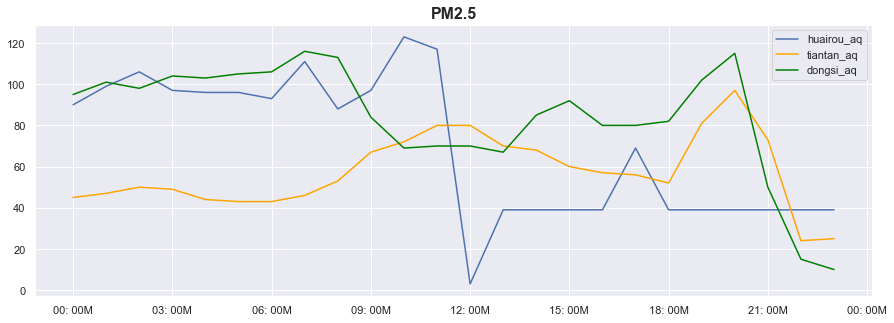

In [47]:
import datetime
from matplotlib.dates import DateFormatter
index1=pd.date_range(start='2017-05-01 00:00:00', end=' 2017-05-01 23:00:00',freq="H")
df =pd.read_csv("D:/Akhila/Air pollution data set/imputed_data/tiantan_aq_imputed.csv")
df1=pd.read_csv("D:/Akhila/Air pollution data set/imputed_data/dongsi_aq_imputed.csv")
df2=pd.read_csv("D:/Akhila/Air pollution data set/imputed_data/huairou_aq_imputed.csv")
fig,ax = plt.subplots(figsize=(15, 5))
ax.plot(index1,df["PM2.5"].iloc[0:24], color='b', label='huairou_aq')
ax.plot(index1,df2["PM2.5"].iloc[0:24], color='orange', label='tiantan_aq')
ax.plot(index1,df1["PM2.5"].iloc[0:24], color='green', label='dongsi_aq')
ax.set_title("PM2.5", fontweight="bold", size=16)
ax.legend(loc="upper right")
myFmt = DateFormatter("%H: %MM")
ax.xaxis.set_major_formatter(myFmt)

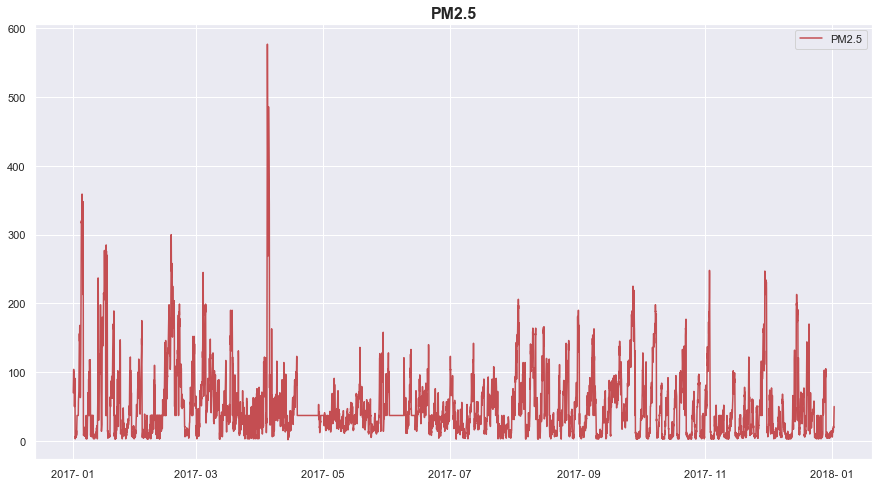

In [48]:
df =pd.read_csv("D:/Akhila/Air pollution data set/imputed_data/aotizhongxin_aq_imputed.csv")
index1=pd.date_range(start='2017-01-01 00:00:00', end=' 2018-01-01 23:00:00',freq="H")
fig,ax = plt.subplots(figsize=(15, 8))
ax.plot(index1,df["PM2.5"].iloc[0:8784],color='r',label="PM2.5")
ax.set_title("PM2.5", fontweight="bold", size=16)
ax.legend(loc="upper right")
myFmt = DateFormatter("%Y- %m")
ax.xaxis.set_major_formatter(myFmt)

## Training data & Testing data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

lat = 'latitude'
lng = 'longitude'
sid = 'station_id'
k_nn = 3

In [50]:
train_data_dict = {}
test_data_dict = {}

In [51]:
# return the dictionary dataframes according to the air quality type for further training & testing
# drop the NaN 
def airQualTypesDataDict(data_df):
    # dictionary for storing dataframes
    data_dict = {}
    
    # air quality types list
    air_types = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
    
    # features columns containing 'time' label
    feature_cols = list(set(data_df.columns) - set(air_types))
    
    for air in air_types:
        # get all the columns
        data_cols = feature_cols.copy()
        data_cols.append(air)
        
        # get the dataframe with the specific air type
        air_data_df = data_df[data_cols]
        
        # drop NaN rows
        print("{} rows before dropping NaN: {}".format(air, len(air_data_df)))
        air_data_df = air_data_df.dropna()
        print("{} rows after dropping NaN: {}".format(air, len(air_data_df)))
        
        # choose the 'time' as the index
        air_data_df.time = air_data_df.time.apply(lambda x: pd.Timestamp(x))
       # air_data_df = air_data_df.set_index('time')
        data_dict[air] = air_data_df
        
    
    return data_dict

# return training & validation data
def splitTrainValData(data_df, label, val_size):
    label_col = [label]
    feature_col = list(set(data_df.columns) - set([label]))
    
    features_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
    labels_scaler = PowerTransformer(copy=True, method='box-cox', standardize=True)

    
    # scale features
    features = data_df[feature_col]
    features_scaled = features_scaler.fit_transform(features)
    features_scaled_df = pd.DataFrame(features_scaled, index=features.index, columns=features.columns)
    
    # scale labels
    labels = data_df[label_col]
    labels_scaled = labels_scaler.fit_transform(labels)
    labels_scaled_df = pd.DataFrame(labels_scaled, index=labels.index, columns=labels.columns)
    
    # split features
    X_val = features_scaled_df[-val_size:]
    X_train = features_scaled_df[:-val_size]
    
    # split labels
    y_val = labels_scaled_df[-val_size:]
    y_train = labels_scaled_df[:-val_size]
    
    val_df = data_df[-val_size:]
    X_val = val_df[feature_col]
    y_val = val_df[label_col]

    # train set
    train_df = data_df[:-val_size]
    X_train = train_df[feature_col]
    y_train = train_df[label_col]
    
    return X_train, X_val, y_train, y_val, labels_scaler
    
    
# drop the NaN in the concated air types table
def getTrainTestDataDropna(data_df):
    # dropna
    #print ('Total rows before dropna: {}'.format(len(data_df)))
    data_df = data_df.dropna()
    data_df = data_df.set_index('time')
   # print ('Total rows after dropna: {}'.format(len(data_df)))

    # labels columns
    label_cols = ['PM2.5']
    feature_cols = list(set(data_df.columns) - set(label_cols))
    
    # validation set
    val_df = data_df[:]
    X_val = val_df[feature_cols]
    y_val = val_df[label_cols]

    # train set
    train_df = data_df[:]
    X_train = train_df[feature_cols]
    y_train = train_df[label_cols]
    
    return X_train, X_val, y_train, y_val


In [52]:
X_train, X_val, y_train, y_test = getTrainTestDataDropna(atzx_impute)


In [53]:
X_val
X_val.shape
X_val.iloc[0:1]

2_hadian_meo_wea_Fog  0_beijing_grid_304_tem  \
time                                                                
2017-01-30 16:00:00                     0                   -5.89   

                     1_beijing_grid_283_ws  2_hadian_meo_wea_Dust   NO2  \
time                                                                      
2017-01-30 16:00:00                   6.24                      0  36.0   

                     2_hadian_meo_wea_Sand    O3  2_hadian_meo_wea_Snow  \
time                                                                      
2017-01-30 16:00:00                      0  79.0                      0   

                     2_hadian_meo_hum  2_hadian_meo_ws  ...  \
time                                                    ...   
2017-01-30 16:00:00              14.0              2.5  ...   

                     0_beijing_grid_304_hum  2_hadian_meo_wea_Haze  \
time                                                                 
2017-01-30 16:00:00                   14.58                      0   

                     2_hadian_meo_wea_Sunny/clear  0_beijing_grid_304_wd  \
time                                                                       
2017-01-30 16:00:00                             1                 195.46   

                     1_beijing_grid_283_hum  1_beijing_grid_283_tem  PM10  \
time                                                                        
2017-01-30 16:00:00                   14.07                   -5.98  75.0   

                     2_hadian_meo_wea_Rain   CO  2_hadian_meo_wd  
time                                                              
2017-01-30 16:00:00                      0  0.9            231.0  

[1 rows x 27 columns]

<AxesSubplot:>

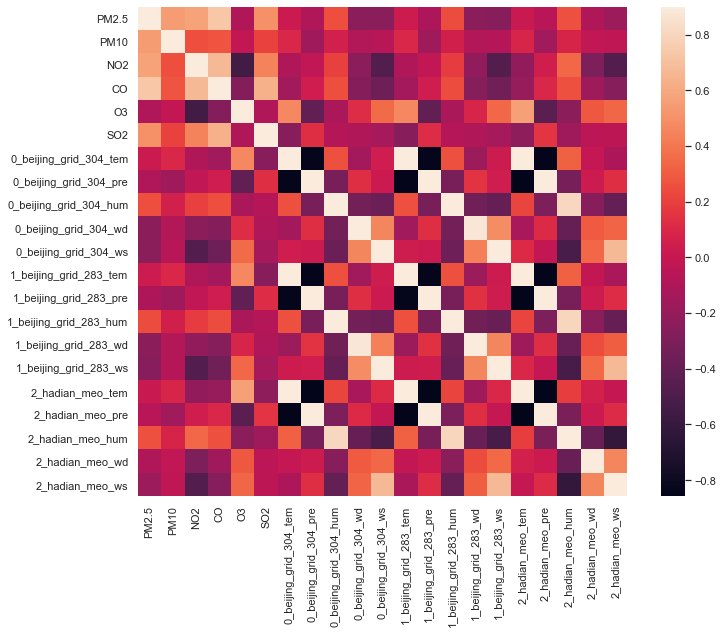

In [54]:
#Correlation map to see how features are correlated 

corrmat = atzx.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### import cleaned data

In [55]:
import os

# read files from directory
cleaned_data_path = 'D:/Akhila/Air pollution data set/imputed_data/'
aq_file_list = []

# read the file names into list
for aq_file in os.listdir(cleaned_data_path):
    if '.csv' in aq_file:
        aq_file_list.append(aq_file)

atzx_path = "D:/Akhila/Air pollution data set/imputed_data/aotizhongxin_aq_imputed.csv"
atzx_impute = pd.read_csv(atzx_path, index_col=0)
atzx_impute.head()

time  PM2.5  PM10   NO2   CO    O3   SO2  \
0  2017-01-30 16:00:00   70.0  75.0  36.0  0.9  79.0  34.0   
1  2017-01-30 17:00:00   78.0  86.0  36.0  0.1  78.0  38.0   
2  2017-01-30 18:00:00   86.0  92.0  39.0  1.1  74.0  35.0   
3  2017-01-30 19:00:00   95.0  66.0  46.0  1.2  65.0  34.0   
4  2017-01-30 20:00:00   98.0  66.0  42.0  1.2  50.0  32.0   

   0_beijing_grid_304_hum  0_beijing_grid_304_ws  0_beijing_grid_304_wd  ...  \
0                   14.58                   7.13                 195.46  ...   
1                   15.11                   6.02                 191.22  ...   
2                   15.64                   4.96                 185.11  ...   
3                   16.59                   4.55                 181.28  ...   
4                   17.55                   4.17                 176.73  ...   

   2_hadian_meo_pre  2_hadian_meo_ws  2_hadian_meo_hum  2_hadian_meo_wea_Dust  \
0            1026.1              2.5              14.0                      0   
1            1025.9              1.9              16.0                      0   
2            1025.6              1.2              18.0                      0   
3            1025.2              1.1              20.0                      0   
4            1024.3              0.0              23.0                      0   

   2_hadian_meo_wea_Fog  2_hadian_meo_wea_Haze  2_hadian_meo_wea_Rain  \
0                     0                      0                      0   
1                     0                      0                      0   
2                     0                      0                      0   
3                     0                      0                      0   
4                     0                      0                      0   

   2_hadian_meo_wea_Sand  2_hadian_meo_wea_Snow  2_hadian_meo_wea_Sunny/clear  
0                      0                      0                             1  
1                      0                      0                             1  
2                      0                      0                             1  
3                      0                      0                             1  
4                      0                      0                             1  

[5 rows x 29 columns]

In [56]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


def showLineChart(data_df, air_type, start, end):
    data_df['time'] = pd.to_datetime(data_df['time'])
    mask = (data_df['time'] > start) & (data_df['time'] <= end)
    period_data = data_df.loc[mask]
    period_data.head()

    fig, ax = plt.subplots(figsize=(30,7))
    ax.plot(period_data['time'], period_data[air_type])

    myFmt = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(myFmt)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.show()

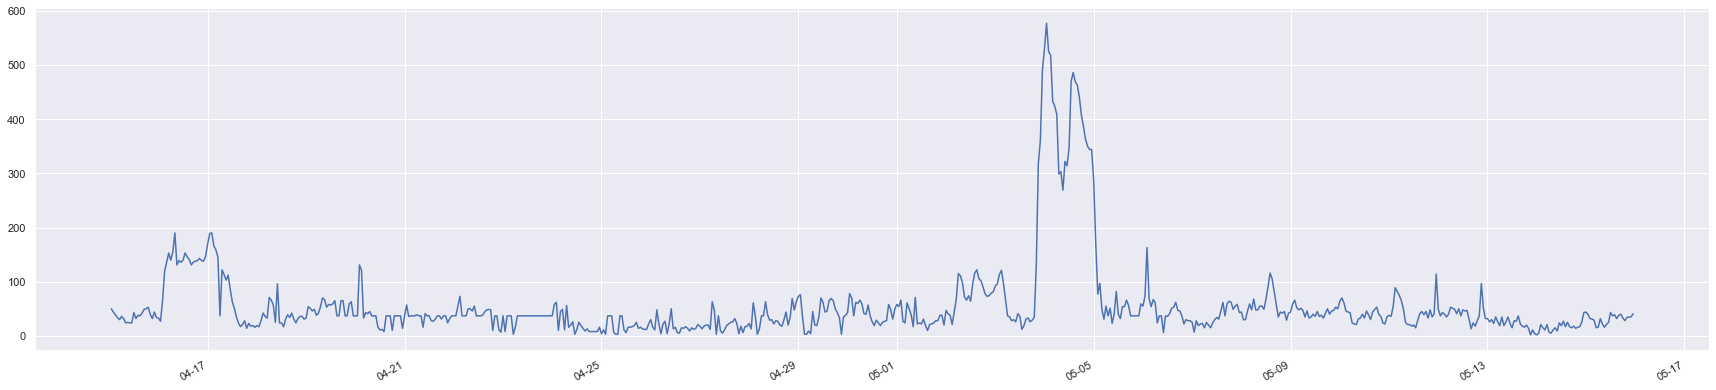

In [57]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

start = pd.Timestamp(2017, 4, 15, 0)
end = pd.Timestamp(2017, 5, 15, 23)
showLineChart(atzx_impute, 'PM2.5', start, end)


In [58]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_test, reference=lgb_train)
params = {    'boosting_type': 'gbdt',    'objective': 'regression',    'metric': {'l2', 'l1'},
    'num_leaves': 40,    'learning_rate': 0.07,    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,    'bagging_freq': 5,    'verbose': 0}
# train
print("Starting training...")
gbm = lgb.train(params,  lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
# eval
print('The rmse:', mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 33.6234	valid_0's l2: 2365.65
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.6615	valid_0's l2: 2102.08
[3]	valid_0's l1: 29.9605	valid_0's l2: 1884.82
[4]	valid_0's l1: 28.4055	valid_0's l2: 1699.69
[5]	valid_0's l1: 26.8533	valid_0's l2: 1522.36
[6]	valid_0's l1: 25.4231	valid_0's l2: 1367.26
[7]	valid_0's l1: 24.1092	valid_0's l2: 1232.29
[8]	valid_0's l1: 22.9289	valid_0's l2: 1118
[9]	valid_0's l1: 21.8066	valid_0's l2: 1013.7
[10]	valid_0's l1: 20.7719	valid_0's l2: 922.107
[11]	valid_0's l1: 19.8149	valid_0's l2: 840.537
[12]	valid_0's l1: 18.9469	valid_0's l2: 769.653
[13]	valid_0's l1: 18.1105	valid_0's l2: 706.767
[14]	valid_0's l1: 17.3777	valid_0's l2: 653.401
[15]	valid_0's l1

In [59]:
import datetime
index=pd.date_range(start='2017-01-30 16:00:00', end='2018-05-02 23:00:00',freq="H")

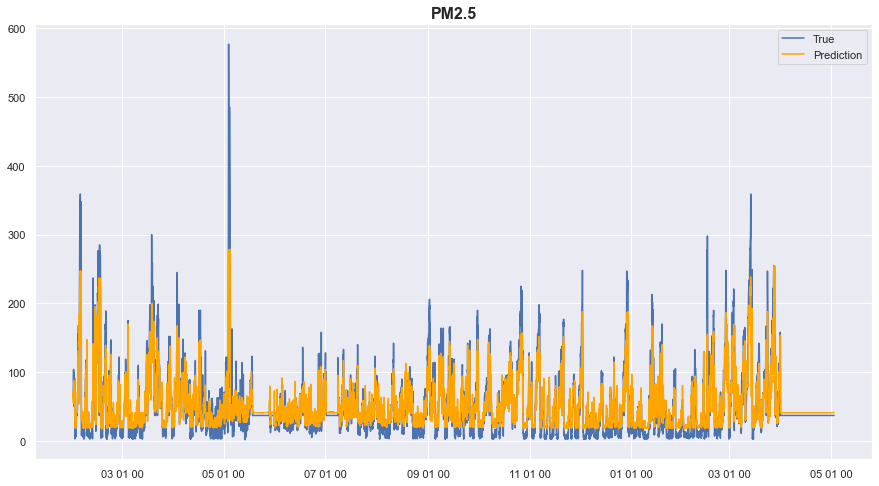

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(index, y_test, color='b', label='True')
ax.plot(index,y_pred, color='orange', label='Prediction')
ax.set_title("PM2.5", fontweight="bold", size=16)
ax.legend(loc="upper right")
myFmt = DateFormatter("%m %d %H")
ax.xaxis.set_major_formatter(myFmt)

In [61]:
import xgboost as xgb
from xgboost import XGBRegressor
model = xgb.XGBRegressor(learning_rate = 0.013)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
print('The rmse:', mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

The rmse: 26.149523342983592
Mean absolute error = 16.3
Mean squared error = 683.8
Median absolute error = 8.2
R2 score = 0.74


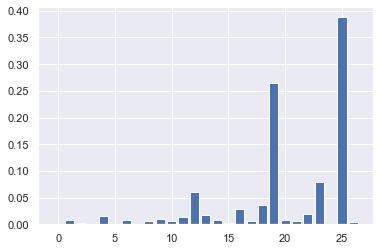

In [63]:

importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

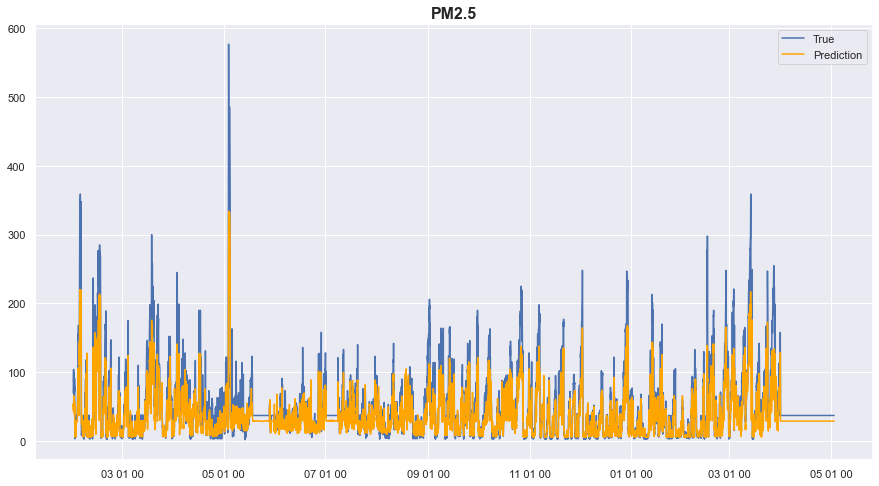

In [64]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(index, y_test, color='b', label='True')
ax.plot(index,y_pred, color='orange', label='Prediction')
ax.set_title("PM2.5", fontweight="bold", size=16)
ax.legend(loc="upper right")
myFmt = DateFormatter("%m %d %H")
ax.xaxis.set_major_formatter(myFmt)


In [65]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(learning_rate=0.005)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
print('The rmse:', mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

The rmse: 27.01269081833319
Mean absolute error = 18.46
Mean squared error = 729.69
Median absolute error = 10.43
R2 score = 0.72


In [66]:
y_prediction=model.predict([[2017-1-30,0.9,0,-5.98,1026.1,-1.6,2.5,14.58,-5.89,14.07,7.13,195.46,195.46,195.46,195.46,195.46,195.46,195.46,195.46,
231.0,0,14.0,79.0,6.24,195.46,201.74,0]])
y_prediction

array([65.25116279])

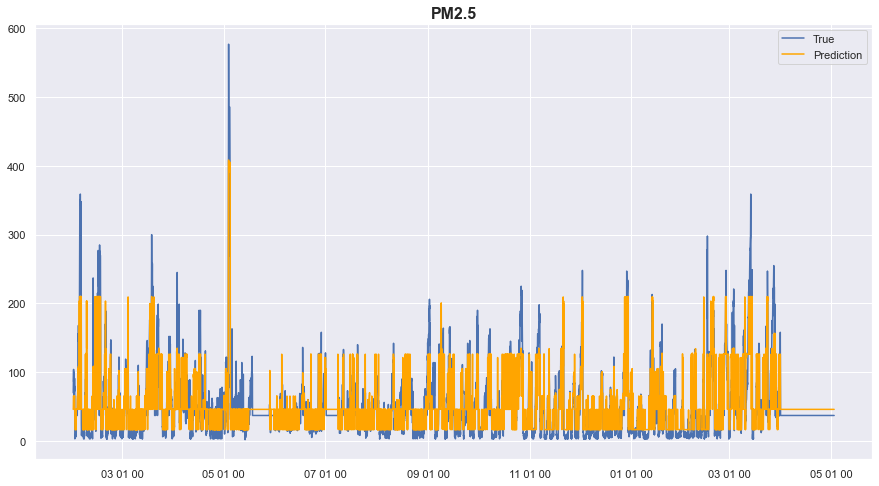

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(index, y_test, color='b', label='True')
ax.plot(index,y_pred, color='orange', label='Prediction')
ax.set_title("PM2.5", fontweight="bold", size=16)
ax.legend(loc="upper right")
myFmt = DateFormatter("%m %d %H")
ax.xaxis.set_major_formatter(myFmt)